In [1]:
#### Configure environment (Colab vs Local)
import os
import sys
#@title Configuration Settings { run: "auto" }
RUNNING_ON_COLAB = False #@param {type:"boolean"}
LOCAL_DATA_DIR = "./data" #@param {type:"string"}
USE_CUSTOM_VXM = True #@param {type:"boolean"}
CUSTOM_VXM_PATH = './data/voxelmorph' #@param {type:"string"}  # Full Colab path

#### Installing neccassary libraries

In [2]:
#### Install necessary libraries
if RUNNING_ON_COLAB:

    # Uninstall original if needed
    !pip uninstall -y voxelmorph

    # Mount Drive first to access custom code
    from google.colab import drive
    drive.mount('/content/drive')
    # Always install neurite
    !pip install git+https://github.com/adalca/neurite.git

    if USE_CUSTOM_VXM:
        # Install custom Voxelmorph
        %cd {CUSTOM_VXM_PATH}

        # Add explicit path
        sys.path.insert(0, CUSTOM_VXM_PATH)
        import voxelmorph as vxm
    else:
        !pip install git+https://github.com/voxelmorph/voxelmorph.git
        import voxelmorph as vxm


else:
    # Install local packages using system Python
    import sys
    import subprocess
    import importlib.util

    # Local setup enhancements
    sys.path.insert(0, os.path.abspath(LOCAL_DATA_DIR))  # Add local data dir to path
    if USE_CUSTOM_VXM:
        from data.voxelmorph import voxelmorph as vxm
    else:
        import voxelmorph as vxm



# Final verification
try:
    os.environ['NEURITE_BACKEND'] = 'tensorflow'  # Add this BEFORE importing neurite/voxelmorph
    import tensorflow, neurite, cv2, skimage, matplotlib, tqdm, scipy
    print("\nVerified package versions:")
    print(f"- TensorFlow {tensorflow.__version__}")
    print(f"- VoxelMorph {vxm.__version__}")
    print(f"- Neurite {neurite.__version__}")
    print(f"- OpenCV {cv2.__version__}")
    print(f"- scikit-image {skimage.__version__}")
    print(f"- Matplotlib {matplotlib.__version__}")
    print(f"- tqdm {tqdm.__version__}")
    print(f"- SciPy {scipy.__version__}")
except ImportError as e:
    print(f"\n❌ Missing package: {str(e)}")
    print("Try installing manually with: pip install", e.name)

d:\study\graduation_project\VXM\neurite\__init__.py:33: FutureWarning: The default backend will soon be changing to 'pytorch'. If you prefer to use TensorFlow, please set the NEURITE_BACKEND environment variable to 'tensorflow'.
  backend = py.utils.get_backend()



Verified package versions:
- TensorFlow 2.19.0
- VoxelMorph 0.2
- Neurite 0.2
- OpenCV 4.11.0
- scikit-image 0.25.2
- Matplotlib 3.10.1
- tqdm 4.67.1
- SciPy 1.15.2


#### Verifing Installation and GPU

In [3]:
import os
import sys
import neurite
import tensorflow as tf


# Conditional imports for custom VoxelMorph
if RUNNING_ON_COLAB:
    print("\nUsing custom VoxelMorph from:", CUSTOM_VXM_PATH)
    import importlib
    if not USE_CUSTOM_VXM:
        import voxelmorph as vxm
        importlib.reload(vxm)  # Force reload
        from voxelmorph.tf.networks import VxmDense
else:
    if USE_CUSTOM_VXM:
        from data.voxelmorph import voxelmorph as vxm
        from data.voxelmorph.voxelmorph.tf.networks import VxmDense
    else:
        import voxelmorph as vxm
        from voxelmorph.tf.networks import VxmDense

# Add version verification
try:
    print(f"\nVoxelMorph version: {vxm.__version__}")
    print("Loaded from:", os.path.dirname(vxm.__file__))
except AttributeError:
    print("\n⚠️ Using custom VoxelMorph without version tag")

# Rest of your existing imports and checks...
# Verification
print("\n--- Environment Summary ---")
print(f"Running on: {'Colab' if RUNNING_ON_COLAB else 'Local'}")
print(f"Python path: {sys.path}")
print(f"\nPython: {sys.version}")

print(f"TensorFlow: {tf.__version__}")
print("GPU Devices:", tf.config.list_physical_devices('GPU'))

print(f"Neurite backend: {neurite.backend}")
print(f"VoxelMorph path: {os.path.dirname(vxm.__file__)}")
print(f"VoxelMorph version: {vxm.__version__ if hasattr(vxm, '__version__') else 'custom'}")



VoxelMorph version: 0.2
Loaded from: d:\study\graduation_project\VXM\data\voxelmorph\voxelmorph

--- Environment Summary ---
Running on: Local
Python path: ['d:\\study\\graduation_project\\VXM\\data', 'c:\\Users\\AliBadran\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\AliBadran\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\AliBadran\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\AliBadran\\AppData\\Local\\Programs\\Python\\Python310', '', 'C:\\Users\\AliBadran\\AppData\\Roaming\\Python\\Python310\\site-packages', 'C:\\Users\\AliBadran\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32', 'C:\\Users\\AliBadran\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32\\lib', 'C:\\Users\\AliBadran\\AppData\\Roaming\\Python\\Python310\\site-packages\\Pythonwin', 'c:\\Users\\AliBadran\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages']

Python: 3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.

#### Configure data paths based on environment

In [4]:
if RUNNING_ON_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    BASE_DATA_PATH = '/content/drive/My Drive/GP_Data_Folder/GP_Data-Sets'
    MODELS_BASE_PATH = '/content/drive/My Drive/GP_Data_Folder/Models'

    # Colab-specific path structure
    ACDC_BASE = os.path.join('ACDC', 'database')
    SUNNYBROOK_BASE = 'SunnyBrook'
    train_data = '/content/drive/My Drive/GP_Data_Folder/data/train'
    val_data = '/content/drive/My Drive/GP_Data_Folder/data/val'
    test_data = '/content/drive/My Drive/GP_Data_Folder/data/test'
    mask_data = '/content/drive/My Drive/GP_Data_Folder/data/ACDC-Masks-1'
    MODEL_TESTING_PATH = '/content/drive/My Drive/GP_Data_Folder/data/model_testing'

    train_simulated_data = '/content/drive/My Drive/GP_Data_Folder/data/Simulated_train'
    val_simulated_data = '/content/drive/My Drive/GP_Data_Folder/data/Simulated_val'
    test_simulated_data = '/content/drive/My Drive/GP_Data_Folder/data/Simulated_test'
    mask_simulated_data = '/content/drive/My Drive/GP_Data_Folder/data/Simulated_masks'
    displacement_simulated_data = '/content/drive/My Drive/GP_Data_Folder/data/Simulated_displacements'
else:
    BASE_DATA_PATH = LOCAL_DATA_DIR
    MODELS_BASE_PATH = os.path.join(LOCAL_DATA_DIR, 'Models')

    # Local-specific path structure
    ACDC_BASE = ''
    SUNNYBROOK_BASE = ''
    train_data = os.path.join(LOCAL_DATA_DIR, 'train')
    val_data = os.path.join(LOCAL_DATA_DIR, 'val')
    test_data = os.path.join(LOCAL_DATA_DIR, 'test')
    mask_data = os.path.join(LOCAL_DATA_DIR, 'ACDC-Masks-1')
    MODEL_TESTING_PATH = os.path.join(LOCAL_DATA_DIR, 'model_testing')

    train_simulated_data = os.path.join(LOCAL_DATA_DIR, 'Simulated_train')
    val_simulated_data = os.path.join(LOCAL_DATA_DIR, 'Simulated_val')
    test_simulated_data = os.path.join(LOCAL_DATA_DIR, 'Simulated_test')
    mask_simulated_data = os.path.join(LOCAL_DATA_DIR, 'Simulated_masks')
    displacement_simulated_data = os.path.join(LOCAL_DATA_DIR, 'Simulated_displacements')

# Simulated data paths (already updated in your script)
SIMULATED_DATA_PATH = test_simulated_data  # ./data/Simulated_test
SIMULATED_MASK_PATH = mask_simulated_data  # ./data/Simulated_masks
SIMULATED_DISP_PATH = displacement_simulated_data  # ./data/Simulated_displacements

In [5]:
def check_paths(paths):
    """Verify existence of required paths with enhanced feedback"""
    missing_paths = []
    existing_paths = []

    print("\nChecking data paths:")
    for name, path in paths.items():
        exists = os.path.exists(path)
        status = "✓" if exists else "✗"
        print(f"  {status} {name}: {path}")

        if exists:
            existing_paths.append(path)
        else:
            missing_paths.append(path)

    return existing_paths, missing_paths

# Check all critical paths
paths_to_check = {
    'Simulated Training': train_simulated_data,
    'Simulated Validation': val_simulated_data,
    'Simulated Testing': test_simulated_data,
    'Simulated Masks': mask_simulated_data,
    'Simulated Displacements': displacement_simulated_data,
    'train data': train_data,
    'val data': val_data,
    'test data': test_data,
    'mask data': mask_data, 
}

existing, missing = check_paths(paths_to_check)

if missing:
    print("\n⚠️ Missing paths detected!")
    if RUNNING_ON_COLAB:
        print("Ensure Google Drive is mounted correctly and data is in the expected locations.")
    else:
        print(f"Please ensure your local data directory ({LOCAL_DATA_DIR}) contains:")
        print("- Simulated Training/Validation/Testing folders")
        print("- Simulated Masks folder")
        print("- Simulated Displacements folder")
        print("- ACDC-Masks-1 folder")
        print("- model_testing")
        print("- train/val/test folders")
        raise FileNotFoundError("Missing required data paths")  # Uncomment to enforce strict checking


Checking data paths:
  ✓ Simulated Training: ./data\Simulated_train
  ✓ Simulated Validation: ./data\Simulated_val
  ✓ Simulated Testing: ./data\Simulated_test
  ✓ Simulated Masks: ./data\Simulated_masks
  ✓ Simulated Displacements: ./data\Simulated_displacements
  ✓ train data: ./data\train
  ✓ val data: ./data\val
  ✓ test data: ./data\test
  ✓ mask data: ./data\ACDC-Masks-1


#### Configure Models paths based on environment

In [6]:
#### Model configuration
MODEL_CONFIG = {
    # 1. No Mask (Baseline)
    'no_mask': {
        'name': 'voxelmorph_no_mask',
        'use_mask': False,
        'use_mse_mask': False,
        'use_smoothness_mask': False
    },
    # 2. New MSE Mask only
    # 'mse_mask': {
    #     'name': 'voxelmorph_mse_mask',
    #     'use_mask': True,
    #     'use_mse_mask': True,
    #     'use_smoothness_mask': False
    # },
    # # 3. New Smoothness Mask only
    # 'smoothness_mask': {
    #     'name': 'voxelmorph_smoothness_mask',
    #     'use_mask': True,
    #     'use_mse_mask': False,
    #     'use_smoothness_mask': True
    # },
    # # 4. Both Masks
    # 'both_masks': {
    #     'name': 'voxelmorph_both_masks',
    #     'use_mask': True,
    #     'use_mse_mask': True,
    #     'use_smoothness_mask': True
    # }
}

# Lambda values to test (0.1 to 1.0)
LAMBDAS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# LAMBDAS = [0.016, 0.033, 0.066, 0.1]
# LAMBDAS = [0.1]

# kernel configrations
KERNEL_CONFIGS = {
    'default': {
        'encoder': [[3], [3], [3], [3]],
        'decoder': [[3], [3], [3], [3]],
        'final' : [3, 3, 3]
    },
    'first5': {
        'encoder': [[5], [3], [3], [3]], # first layer 5 rest is 3
        'decoder': [[3], [3], [3], [3]],
        'final' : [3, 3, 3]
    },
    'first7_second5': {
        'encoder': [[7], [5], [3], [3]],
        'decoder': [[3], [3], [3], [3]],
        'final' : [3, 3, 3]
    }
}

KERNEL_KEYS = list(KERNEL_CONFIGS.keys())  # ['default', 'first5', ...]

In [7]:
# Generate variable names and folder paths for all models
MODEL_VAR_MAP = {}
for model_key in MODEL_CONFIG:
    for kernel_key in KERNEL_KEYS:
        for lambda_val in LAMBDAS:
            # Unique variable name including kernel config
            # Use :.3f to match the actual directory naming (e.g., lambda_0.100)
            var_name = f"vm_model_{model_key}_kernel_{kernel_key}_lambda_{lambda_val:.3f}".replace('.', '_')
            MODEL_VAR_MAP[f"{model_key}_kernel_{kernel_key}_lambda_{lambda_val:.3f}"] = var_name

            MODEL_CONFIG[model_key][f'kernel_{kernel_key}_lambda_{lambda_val:.3f}'] = {
                'folder': os.path.join(MODELS_BASE_PATH,
                                       f"{MODEL_CONFIG[model_key]['name']}_kernel_{kernel_key}_lambda_{lambda_val:.3f}")
            }

# Create directories for each model configuration
for model_key in MODEL_CONFIG:
    for lambda_val in LAMBDAS:
        for kernel_key in KERNEL_KEYS:
            model_folder = MODEL_CONFIG[model_key][f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder']
            os.makedirs(os.path.join(model_folder, 'weights'), exist_ok=True)
            os.makedirs(os.path.join(model_folder, 'results'), exist_ok=True)
            os.makedirs(os.path.join(model_folder, 'logs'), exist_ok=True)

#### Importing neccassry libraries

In [8]:
import os
import sys
import re
import gc
import glob
import time
import math
import random
import logging
import warnings
import traceback

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Generator
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from tqdm import tqdm
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.ndimage import distance_transform_edt, gaussian_filter

import neurite as ne
import tensorflow.keras.backend as K
from tensorflow.keras.losses import Loss
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import (
  ModelCheckpoint,
  EarlyStopping,
  CSVLogger,
  ReduceLROnPlateau,
  TensorBoard,
)

from docx import Document
from docx.oxml.ns import qn

#### **Data Loaders**

##### Loading analyziz data

In [9]:
def load_debug_data(data_path):
    """
    Load debugging data (inputs, outputs, and displacements) from .npy files.

    Parameters:
        data_path (str): Path to the directory containing the .npy files.

    Returns:
        dict: A dictionary containing:
            - 'moving': Moving images (numpy array).
            - 'fixed': Fixed images (numpy array).
            - 'warped': Warped images (numpy array).
            - 'displacements': Displacement fields (numpy array).
    """
    return {
        'moving': np.load(os.path.join(data_path, 'inputs_moving.npy')),  # Load moving images
        'fixed': np.load(os.path.join(data_path, 'inputs_fixed.npy')),    # Load fixed images
        # 'warped': np.load(os.path.join(data_path, 'outputs_warped.npy')), # Load warped images
        # 'displacements': np.load(os.path.join(data_path, 'displacements.npy'))  # Load displacement fields (X, y)
    }

In [10]:
# Load debug data once (should be after your data path configuration)
# Define the output path for the new reference debug data
NEW_DEBUG_DATA_PATH = os.path.join(MODEL_TESTING_PATH, 'reference_debug_data')
debug_data = load_debug_data(NEW_DEBUG_DATA_PATH)

In [11]:
# Load debugging data from the specified directory
debug_data = load_debug_data(NEW_DEBUG_DATA_PATH)

# Print the keys of the loaded data dictionary
print("Loaded data keys:", list(debug_data.keys()))

# Print the shape and details of each array in the loaded data
print("\nData Shapes and Details:")
print(f"Moving Images: {debug_data['moving'].shape} (Batch, Height, Width, Channels)")
print(f"Fixed Images:  {debug_data['fixed'].shape} (Batch, Height, Width, Channels)")
# print(f"Warped Images: {debug_data['warped'].shape} (Batch, Height, Width, Channels)")
# print(f"Displacements: {debug_data['displacements'].shape} (Batch, Height, Width, 2 [dx, dy])")

# Print additional metadata for clarity
print("\nAdditional Metadata:")
print(f"Number of samples: {debug_data['moving'].shape[0]}")
print(f"Image resolution:  {debug_data['moving'].shape[1]}x{debug_data['moving'].shape[2]}")

Loaded data keys: ['moving', 'fixed']

Data Shapes and Details:
Moving Images: (4, 128, 128, 1) (Batch, Height, Width, Channels)
Fixed Images:  (4, 128, 128, 3) (Batch, Height, Width, Channels)

Additional Metadata:
Number of samples: 4
Image resolution:  128x128


##### Weighting the mask

###### old mask weighting

In [12]:
def create_weighted_mask(mask, dilation_extent=5, sigma=2):
    """
    Generate a weighted mask with:
    - Myocardium (label 1) = weight 2.0
    - Smoothly decaying weights outward from the myocardium (controlled by `dilation_extent`).

    Args:
        mask (np.ndarray): Input mask with labels {0, 1, 2}.
        dilation_extent (int): Number of dilation iterations (higher = wider decay).
        sigma (float): Smoothness of the decay (Gaussian blur).

    Returns:
        weighted_mask (np.ndarray): Weighted mask with values ≥1.0.
    """
    # Ensure mask is 2D by squeezing singleton dimensions
    mask = mask.squeeze()

    # Extract myocardium (label 1)
    myocardium = (mask == 1).astype(np.float32)

    # Initialize dilated mask and process mask
    dilated_mask = myocardium.copy()
    process_mask = myocardium.copy()

    # Kernel for dilation (7x7 ellipse)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

    # Gradually reduce the added weight per iteration
    initial_value = 0.9
    step_size = initial_value / dilation_extent  # Controls decay per iteration

    for i in range(dilation_extent):
        old_process_mask = process_mask.copy()
        process_mask = cv2.dilate(process_mask, kernel)

        # Identify newly added pixels (boundary of the dilated region)
        added_region = (process_mask - old_process_mask).astype(np.float32)

        # Ensure added_region has the same number of dimensions as dilated_mask
        added_region = added_region[..., np.newaxis] if added_region.ndim < dilated_mask.ndim else added_region


        # Compute weight for this iteration (decays linearly with iterations)
        current_weight = initial_value - i * step_size

        # Update dilated mask with decaying weights
        dilated_mask += added_region * current_weight

    # Smooth the dilation
    smoothed_mask = gaussian_filter(dilated_mask, sigma=sigma)

    # Make sure the myocardium part is exactly 1 and has no dilation
    smoothed_mask[myocardium.astype(bool)] = 1.0

     # Add 1 to the mask
    smoothed_mask += 1.0

    mask_sum = tf.reduce_sum(smoothed_mask)  # Scalar

    # Compute the number of pixels in the mask
    num_pixels = tf.reduce_sum(tf.ones_like(smoothed_mask))  # Scalar

    # Compute the normalization factor
    normalization_factor = num_pixels / (mask_sum + 1e-6)

    smoothed_mask = smoothed_mask * normalization_factor


    return (smoothed_mask[..., np.newaxis])

###### New BG to myocarduim mask weighting

In [13]:
def create_weighted_mask_bg(mask, dilation_extent=5, sigma=2, myocardium_weight_factor=1):
    """
    Generate a weighted mask with:
    - Myocardium (label 1) = weight 2.0
    - Smoothly decaying weights outward from the myocardium (controlled by `dilation_extent`).
    - Multiplied by the ratio of background pixels to myocardium pixels for increased myocardium influence.

    Args:
        mask (np.ndarray): Input mask with labels {0, 1, 2}.
        dilation_extent (int): Number of dilation iterations (higher = wider decay).
        sigma (float): Smoothness of the decay (Gaussian blur).
        myocardium_weight_factor (float): Additional factor to control the myocardium weight (default = 1).

    Returns:
        weighted_mask (np.ndarray): Weighted mask with values ≥1.0.
    """
    # Ensure mask is 2D by squeezing singleton dimensions
    mask = mask.squeeze()

    # Extract myocardium (label 1) and background (label 0)
    myocardium = (mask == 1).astype(np.float32)
    background = (mask == 0).astype(np.float32)

    # Compute the ratio of background pixels to myocardium pixels
    num_background_pixels = np.sum(background)
    num_myocardium_pixels = np.sum(myocardium)
    ratio = num_background_pixels / (num_myocardium_pixels + 1e-6)  # Add epsilon to avoid division by zero

    # Initialize dilated mask and process mask
    dilated_mask = myocardium.copy()
    process_mask = myocardium.copy()

    # Kernel for dilation (7x7 ellipse)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

    # Gradually reduce the added weight per iteration
    initial_value = 0.9
    step_size = initial_value / dilation_extent  # Controls decay per iteration

    for i in range(dilation_extent):
        old_process_mask = process_mask.copy()
        process_mask = cv2.dilate(process_mask, kernel)

        # Identify newly added pixels (boundary of the dilated region)
        added_region = (process_mask - old_process_mask).astype(np.float32)

        # Ensure added_region has the same number of dimensions as dilated_mask
        added_region = added_region[..., np.newaxis] if added_region.ndim < dilated_mask.ndim else added_region

        # Compute weight for this iteration (decays linearly with iterations)
        current_weight = initial_value - i * step_size

        # Update dilated mask with decaying weights
        dilated_mask += added_region * current_weight

    # Smooth the dilation
    dilated_mask[myocardium.astype(bool)] = 1.0
    smoothed_mask = gaussian_filter(dilated_mask, sigma=sigma)
    # smoothed_mask = (1 - np.exp(1.2 * dilated_mask)) / (1 - np.exp(1.2))

    # Multiply by the ratio of background to myocardium pixels
    smoothed_mask *= ratio

    # Apply the myocardium weight factor
    smoothed_mask *= myocardium_weight_factor

    # Add 1 to the mask
    smoothed_mask += 1.0

    mask_sum = tf.reduce_sum(smoothed_mask)  # Scalar

    # Compute the number of pixels in the mask
    num_pixels = tf.reduce_sum(tf.ones_like(smoothed_mask))  # Scalar

    # Compute the normalization factor
    normalization_factor = num_pixels / (mask_sum + 1e-6)

    smoothed_mask = smoothed_mask * normalization_factor

    return smoothed_mask[..., np.newaxis]

###### New Inverted mask for smoothing

In [14]:
def create_weighted_mask_inverted(mask, dilation_extent=5, sigma=2):
    """
    Generate a weighted mask with INVERTED weights (background prioritized):
    - Background (label 0) = weight 2.0
    - Smoothly decaying weights inward from the background (controlled by `dilation_extent`).
    - Same calculations as original, but with (1 - mask) applied before +1.0.

    Args:
        mask (np.ndarray): Input mask with labels {0, 1, 2}.
        dilation_extent (int): Number of dilation iterations (higher = wider decay).
        sigma (float): Smoothness of the decay (Gaussian blur).

    Returns:
        weighted_mask (np.ndarray): Weighted mask with values ≥1.0.
    """
    # Ensure mask is 2D by squeezing singleton dimensions
    mask = mask.squeeze()

    # Extract myocardium (label 1) - we'll still dilate from myocardium as in original
    myocardium = (mask == 1).astype(np.float32)

    # Initialize dilated mask and process mask (same as original)
    dilated_mask = myocardium.copy()
    process_mask = myocardium.copy()

    # Kernel for dilation (7x7 ellipse)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

    # Gradually reduce the added weight per iteration (same as original)
    initial_value = 0.9
    step_size = initial_value / dilation_extent

    for i in range(dilation_extent):
        old_process_mask = process_mask.copy()
        process_mask = cv2.dilate(process_mask, kernel)

        # Identify newly added pixels (boundary of the dilated region)
        added_region = (process_mask - old_process_mask).astype(np.float32)
        added_region = added_region[..., np.newaxis] if added_region.ndim < dilated_mask.ndim else added_region

        # Compute weight for this iteration (decays linearly with iterations)
        current_weight = initial_value - i * step_size

        # Update dilated mask with decaying weights
        dilated_mask += added_region * current_weight

    # Smooth the dilation
    dilated_mask[myocardium.astype(bool)] = 1.0
    smoothed_mask = gaussian_filter(dilated_mask, sigma=sigma)
    # smoothed_mask = (1 - np.exp(1.2 * dilated_mask)) / (1 - np.exp(1.2))

    ##### KEY MODIFICATION: Invert weights here (before +1.0) #####
    smoothed_mask = 1.0 - smoothed_mask

    # Add 1 to the mask (now background will be ~2.0, myocardium ~1.0)
    smoothed_mask += 1.0

    # Normalization (same as original, but using smoothed_mask)
    mask_sum = tf.reduce_sum(smoothed_mask)  # Scalar
    num_pixels = tf.reduce_sum(tf.ones_like(smoothed_mask))  # Scalar
    normalization_factor = num_pixels / (mask_sum + 1e-6)

    return smoothed_mask[..., np.newaxis] * normalization_factor

##### Data generators

##### ACDC & SunnyBrook

In [48]:
class DataGenerator:
    """
    A data generator class that lazily loads and preprocesses data for training,
    validation, and testing. Combines real and simulated data randomly without fixed ratios.
    Implements frame skipping for real data during initialization.
    """

    def __init__(
            self,
            real_data_paths,  # Dict: {'train': [], 'val': [], 'test': []}
            simulated_data_paths=None,  # Dict: {'train': [], 'val': [], 'test': []}
            mask_root_path=None,
            simulated_mask_root_path=None,
            batch_size=8,
            max_frame_skip=7,
            min_frame_skip=3,  # New parameter for minimum frame skip (for real data)
            shuffle=True,
            seed=42,
            use_mask=False
    ):
        self.real_data_paths = real_data_paths
        self.simulated_data_paths = simulated_data_paths or {'train': [], 'val': [], 'test': []}
        self.mask_root = mask_root_path
        self.simulated_mask_root = simulated_mask_root_path
        self.batch_size = batch_size
        self.max_frame_skip = max_frame_skip
        self.min_frame_skip = min_frame_skip  # Store the minimum frame skip
        self.shuffle = shuffle
        self.seed = seed
        self.use_mask = use_mask
        self.rng = random.Random(seed)

        self.train_patients = []
        self.val_patients = []
        self.test_patients = []

        if self.use_mask and (not self.mask_root or not self.simulated_mask_root):
            raise ValueError("Mask paths required when use_mask=True")

        self._organize_patients()

        self.train_patient_numbers = len(self.train_patients)
        self.val_patient_numbers = len(self.val_patients)
        self.test_patient_numbers = len(self.test_patients)

        # Precompute valid pairs for all splits with frame skip constraints applied
        self.valid_pairs = {
            'train': self._precompute_pairs(self.train_patients),
            'val': self._precompute_pairs(self.val_patients),
            'test': self._precompute_pairs(self.test_patients)
        }

        # After precomputing pairs, counts reflect only the valid pairs within skip range
        self.train_pairs_count = self._count_pairs('train')
        self.val_pairs_count = self._count_pairs('val')
        self.test_pairs_count = self._count_pairs('test')

        logging.info(f"Pair counts after frame skip filtering - Train: {self.train_pairs_count}, Val: {self.val_pairs_count}, Test: {self.test_pairs_count}")

        # self._prevalidate_files()

    def _organize_patients(self):
        for data_source in ['real', 'simulated']:
            paths_dict = self.real_data_paths if data_source == 'real' else self.simulated_data_paths
            for split in ['train', 'val', 'test']:
                self._add_patients(
                    paths_dict.get(split, []),
                    split,
                    source=data_source
                )
        if self.shuffle:
            self.rng.shuffle(self.train_patients)
            self.rng.shuffle(self.val_patients)
            self.rng.shuffle(self.test_patients)

    def _add_patients(self, paths, split, source):
        for path in paths:
            if not os.path.isdir(path):
                continue
            patients = [
                (os.path.join(path, f), source)
                for f in os.listdir(path)
                if f.startswith("patient") and os.path.isdir(os.path.join(path, f))
            ]
            getattr(self, f"{split}_patients").extend(patients)

    def _precompute_pairs(self, patient_list):
        pair_dict = {}
        for patient_path, source in patient_list:
            if source == 'real':
                pairs = self._extract_real_pairs(patient_path)
            else:
                pairs = self._extract_simulated_pairs(patient_path)
            if pairs:
                pair_dict[patient_path] = pairs
        return pair_dict

    def _extract_real_pairs(self, patient_folder):
        slice_times = {}
        for fname in os.listdir(patient_folder):
            if not fname.endswith('.npy'):
                continue
            try:
                parts = fname.split('_')
                t_part = parts[1].lstrip('t')
                z_part = parts[2].split('.')[0].lstrip('z')
                t, z = int(t_part), int(z_part)
                if z <= 1 or z >= 6:
                    continue
                slice_times.setdefault(z, []).append(t)
            except (ValueError, IndexError):
                continue
        valid = []
        for z, times in slice_times.items():
            sorted_times = sorted(times)
            for i in range(len(sorted_times)):
                current_t = sorted_times[i]
                for j in range(i + 1, len(sorted_times)):
                    next_t = sorted_times[j]
                    frame_diff = next_t - current_t
                    # Apply both min and max frame skip constraints
                    if self.min_frame_skip <= frame_diff <= self.max_frame_skip:
                        valid.append((current_t, z, frame_diff, next_t, current_t))
        return valid

    def _extract_simulated_pairs(self, patient_folder):
        files = os.listdir(patient_folder)
        slice_times = {}
        actual_frames = set()
        for fname in files:
            if not fname.endswith('.npy'):
                continue
            try:
                base_part, frame_part = fname.rsplit('#', 1)
                frame = frame_part.split('.')[0]
                actual_frames.add(frame)
                parts = base_part.split('_')
                t_str, z_str = parts[-2].lstrip('t'), parts[-1].lstrip('z')
                t, z = int(t_str), int(z_str)
                slice_times.setdefault((z, t), []).append(frame)
            except (ValueError, IndexError) as e:
                print(f"Failed to parse {fname}: {str(e)}")
                continue
        valid = self._generate_pairs(slice_times)
        valid_filtered = []
        for pair in valid:
            current, z, frame_diff, next_frame, t = pair
            if current in actual_frames and next_frame in actual_frames:
                valid_filtered.append(pair)
            else:
                print(f"Filtered out pair ({current}, {next_frame}) for {patient_folder}")
        return valid_filtered

    def _generate_pairs(self, slice_times):
        valid = []
        for (z, t), frames in slice_times.items():
            sorted_frames = sorted(frames, key=lambda x: int(x))
            first_frame = next((frame for frame in sorted_frames if frame[-2:] == '_1'), None)
            frame_to_index = {frame: idx for idx, frame in enumerate(sorted_frames)}
            for i in range(len(sorted_frames)):
                current_frame = sorted_frames[i]
                if current_frame[-2:] != '_1':
                    frame_diff = int(current_frame) - 1
                    valid.append((first_frame, z, frame_diff, current_frame, t))
        return valid

    def _count_pairs(self, split):
        return sum(len(pairs) for pairs in self.valid_pairs[split].values())

    def _validate_pair_files(self, patient_path, pair, source):
        try:
            patient_id = os.path.basename(patient_path)
            current, z, _, next_frame, t = pair
            
            if source == 'real':
                file1 = f"{patient_id}_t{current:02d}_z{z:02d}.npy"
                file2 = f"{patient_id}_t{next_frame:02d}_z{z:02d}.npy"
                data_files = [os.path.join(patient_path, f) for f in [file1, file2]]
                mask_files = [f"{patient_id}_t{current:02d}_z{z:02d}_mask.npy", f"{patient_id}_t{next_frame:02d}_z{z:02d}_mask.npy"] if self.use_mask else []
                mask_dir = os.path.join(self.mask_root, patient_id)
            else:
                z_str, t_str = f"{z:02d}", f"{t:02d}"
                base = patient_id.split('_')[0] if '_t' in patient_id else patient_id
                file1 = f"{base}_t{t_str}_z{z_str}#{next_frame}_1.npy"
                file2 = f"{base}_t{t_str}_z{z_str}#{next_frame}.npy"
                data_files = [os.path.join(patient_path, f) for f in [file1, file2]]
                mask_files = [f"{base}_t{t_str}_z{z_str}#{next_frame}_1.npy", f"{base}_t{t_str}_z{z_str}#{next_frame}.npy"] if self.use_mask else []
                mask_dir = os.path.join(self.simulated_mask_root, patient_id)

            all_files = data_files + [os.path.join(mask_dir, f) for f in mask_files]

            missing_files = [f for f in data_files if not os.path.exists(f)]
            if missing_files:
                return False

            if self.use_mask:
                if not os.path.isdir(mask_dir):
                    return False
                mask_dir_contents = set(os.listdir(mask_dir))
                missing_mask_files = [f for f in mask_files if f not in mask_dir_contents]
                if missing_mask_files:
                    return False

            for f in data_files:
                data = np.load(f, mmap_mode='r')
                if data.shape[:2] != (128, 128):
                    return False
            return True
        except Exception as e:
            return False

    def _prevalidate_files(self):
        for split in ['train', 'val', 'test']:
            patient_list = getattr(self, f"{split}_patients")
            patient_sources = {path: source for path, source in patient_list}
            for patient_path, pairs in self.valid_pairs[split].items():
                valid = []
                source = patient_sources.get(patient_path, 'real')
                for p in pairs:
                    if self._validate_pair_files(patient_path, p, source):
                        valid.append(p)
                self.valid_pairs[split][patient_path] = valid

    def get_generator(self, mode: str = "train") -> Generator:
        patients = {
            'train': self.train_patients,
            'val': self.val_patients,
            'test': self.test_patients
        }[mode]

        total_pairs = sum(len(pairs) for pairs in self.valid_pairs[mode].values())
        if total_pairs == 0:
            logging.error(f"No valid pairs found for {mode} split.")
            return

        while True:
            all_pairs = []
            for patient_path, source in patients:
                pairs = self.valid_pairs[mode].get(patient_path, [])
                all_pairs.extend([(patient_path, p, source) for p in pairs])

            if not all_pairs:
                logging.warning(f"No pairs available for {mode}")
                break

            if self.shuffle:
                self.rng.shuffle(all_pairs)

            batch_moving, batch_fixed = [], []
            for _ in range(self.batch_size):
                if not all_pairs:
                    break
                pair_info = all_pairs.pop(self.rng.randint(0, len(all_pairs) - 1))
                patient_path, pair, source = pair_info

                try:
                    current, z, frame_diff, next_frame, t = pair
                    patient_id = os.path.basename(patient_path)
                    if source == 'real':
                        file1 = os.path.join(patient_path, f"{patient_id}_t{current:02d}_z{z:02d}.npy")
                        file2 = os.path.join(patient_path, f"{patient_id}_t{next_frame:02d}_z{z:02d}.npy")
                        mask_folder = os.path.join(self.mask_root, patient_id)
                        mask_files = [f"{patient_id}_t{current:02d}_z{z:02d}_mask.npy", f"{patient_id}_t{next_frame:02d}_z{z:02d}_mask.npy"] if self.use_mask else []
                    else:
                        z_str, t_str = f"{z:02d}", f"{t:02d}"
                        base_name = patient_id.split('_z')[0] if '_z' in patient_id else patient_id
                        file1 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")
                        file2 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")
                        mask_folder = os.path.join(self.simulated_mask_root, patient_id)
                        mask_files = [f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy", f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy"] if self.use_mask else []

                    frame1 = np.load(file1, mmap_mode='r')[..., np.newaxis].astype(np.float32)
                    frame2 = np.load(file2, mmap_mode='r')[..., np.newaxis].astype(np.float32)

                    if frame1.shape[:2] != (128, 128) or frame2.shape[:2] != (128, 128):
                        logging.warning(f"Invalid shape for {file1}: {frame1.shape[:2]}")
                        continue

                    if self.use_mask:
                        try:
                            mask_fixed = np.load(os.path.join(mask_folder, mask_files[1]))[..., np.newaxis]
                            mask_fixed = create_weighted_mask_bg(mask_fixed)
                            mask_moving = np.load(os.path.join(mask_folder, mask_files[0]))[..., np.newaxis]
                            mask_moving = create_weighted_mask_inverted(mask_moving)
                            fixed = np.concatenate([frame2, mask_fixed, mask_moving], axis=-1)
                        except FileNotFoundError as e:
                            logging.warning(f"Mask file missing for {patient_path}: {e}")
                            continue
                    else:
                        fixed = frame2

                    batch_moving.append(frame1)
                    batch_fixed.append(fixed)

                    if len(batch_moving) == self.batch_size:
                        moving = np.stack(batch_moving)
                        fixed = np.stack(batch_fixed)
                        zero_phi = np.zeros((self.batch_size, 128, 128, 2), dtype=np.float32)
                        if self.use_mask and fixed.shape[-1] == 3:
                            zero_phi[..., 1] = fixed[..., 2]
                        yield (moving, fixed), (fixed, zero_phi)
                        batch_moving, batch_fixed = [], []

                except Exception as e:
                    logging.warning(f"Skipping pair {patient_path}: {str(e)}")
                    continue

            if len(batch_moving) > 0:
                last_moving = batch_moving[-1]
                last_fixed = batch_fixed[-1]
                original_batch_size = len(batch_moving)
                while len(batch_moving) < self.batch_size:
                    batch_moving.append(last_moving.copy())
                    batch_fixed.append(last_fixed.copy())
                    logging.info(f"Duplicated last pair to fill batch: {original_batch_size} to {self.batch_size}")
                moving = np.stack(batch_moving)
                fixed = np.stack(batch_fixed)
                zero_phi = np.zeros((self.batch_size, 128, 128, 2), dtype=np.float32)
                if self.use_mask and fixed.shape[-1] == 3:
                    zero_phi[..., 1] = fixed[..., 2]
                yield (moving, fixed), (fixed, zero_phi)
                batch_moving, batch_fixed = [], []

    def get_generator_with_skip_range(self, mode: str = "train", min_skip: int = 1, max_skip: int = 7) -> Generator:
        # This method remains unchanged but can be used if additional filtering is needed
        patients = {
            'train': self.train_patients,
            'val': self.val_patients,
            'test': self.test_patients
        }[mode]

        total_pairs = sum(len(pairs) for pairs in self.valid_pairs[mode].values())
        if total_pairs == 0:
            logging.error(f"No valid pairs found for {mode} split.")
            return

        while True:
            all_pairs = []
            for patient_path, source in patients:
                pairs = self.valid_pairs[mode].get(patient_path, [])
                filtered_pairs = [p for p in pairs if min_skip <= p[2] <= max_skip]
                all_pairs.extend([(patient_path, p, source) for p in filtered_pairs])

            if not all_pairs:
                logging.warning(f"No pairs available for {mode} with skip range [{min_skip}, {max_skip}]")
                break

            if self.shuffle:
                self.rng.shuffle(all_pairs)

            batch_moving, batch_fixed = [], []
            for _ in range(self.batch_size):
                if not all_pairs:
                    break
                pair_info = all_pairs.pop(self.rng.randint(0, len(all_pairs) - 1))
                patient_path, pair, source = pair_info

                try:
                    current, z, frame_diff, next_frame, t = pair
                    patient_id = os.path.basename(patient_path)
                    if source == 'real':
                        file1 = os.path.join(patient_path, f"{patient_id}_t{current:02d}_z{z:02d}.npy")
                        file2 = os.path.join(patient_path, f"{patient_id}_t{next_frame:02d}_z{z:02d}.npy")
                        mask_folder = os.path.join(self.mask_root, patient_id)
                        mask_files = [f"{patient_id}_t{current:02d}_z{z:02d}_mask.npy", f"{patient_id}_t{next_frame:02d}_z{z:02d}_mask.npy"] if self.use_mask else []
                    else:
                        z_str, t_str = f"{z:02d}", f"{t:02d}"
                        base_name = patient_id.split('_z')[0] if '_z' in patient_id else patient_id
                        file1 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")
                        file2 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")
                        mask_folder = os.path.join(self.simulated_mask_root, patient_id)
                        mask_files = [f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy", f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy"] if self.use_mask else []

                    frame1 = np.load(file1, mmap_mode='r')[..., np.newaxis].astype(np.float32)
                    frame2 = np.load(file2, mmap_mode='r')[..., np.newaxis].astype(np.float32)

                    if frame1.shape[:2] != (128, 128) or frame2.shape[:2] != (128, 128):
                        logging.warning(f"Invalid shape for {file1}: {frame1.shape[:2]}")
                        continue

                    if self.use_mask:
                        try:
                            mask_fixed = np.load(os.path.join(mask_folder, mask_files[1]))[..., np.newaxis]
                            mask_fixed = create_weighted_mask_bg(mask_fixed)
                            mask_moving = np.load(os.path.join(mask_folder, mask_files[0]))[..., np.newaxis]
                            mask_moving = create_weighted_mask_inverted(mask_moving)
                            fixed = np.concatenate([frame2, mask_fixed, mask_moving], axis=-1)
                        except FileNotFoundError as e:
                            logging.warning(f"Mask file missing for {patient_path}: {e}")
                            continue
                    else:
                        fixed = frame2

                    batch_moving.append(frame1)
                    batch_fixed.append(fixed)

                    if len(batch_moving) == self.batch_size:
                        moving = np.stack(batch_moving)
                        fixed = np.stack(batch_fixed)
                        zero_phi = np.zeros((self.batch_size, 128, 128, 2), dtype=np.float32)
                        if self.use_mask and fixed.shape[-1] == 3:
                            zero_phi[..., 1] = fixed[..., 2]
                        yield (moving, fixed), (fixed, zero_phi)
                        batch_moving, batch_fixed = [], []

                except Exception as e:
                    logging.warning(f"Skipping pair {patient_path}: {str(e)}")
                    continue

            if len(batch_moving) > 0:
                last_moving = batch_moving[-1]
                last_fixed = batch_fixed[-1]
                original_batch_size = len(batch_moving)
                while len(batch_moving) < self.batch_size:
                    batch_moving.append(last_moving.copy())
                    batch_fixed.append(last_fixed.copy())
                    logging.info(f"Duplicated last pair to fill batch: {original_batch_size} to {self.batch_size}")
                moving = np.stack(batch_moving)
                fixed = np.stack(batch_fixed)
                zero_phi = np.zeros((self.batch_size, 128, 128, 2), dtype=np.float32)
                if self.use_mask and fixed.shape[-1] == 3:
                    zero_phi[..., 1] = fixed[..., 2]
                yield (moving, fixed), (fixed, zero_phi)
                batch_moving, batch_fixed = [], []

    def get_generator_with_specific_skip(self, mode: str = "train", specific_skip: int = 1) -> Generator:
        return self.get_generator_with_skip_range(mode, specific_skip, specific_skip)


In [ ]:
import os
import numpy as np
import tensorflow as tf
import logging
from typing import Dict, List, Tuple, Optional
import random
from dataclasses import dataclass

@dataclass
class DataSample:
    """Simple container for a data sample"""
    moving: np.ndarray
    fixed: np.ndarray
    masks: Optional[Tuple[np.ndarray, np.ndarray]] = None
    patient_id: str = ""
    source: str = "real"

class SimpleHybridDataLoader:
    """
    Simple hybrid data loader: preload train/val, lazy-load test.
    Ensures consistent batch shapes by skipping invalid samples.
    """
    
    def __init__(
        self,
        real_data_paths: Dict[str, List[str]],
        simulated_data_paths: Optional[Dict[str, List[str]]] = None,
        mask_root_path: Optional[str] = None,
        simulated_mask_root_path: Optional[str] = None,
        batch_size: int = 8,
        max_frame_skip: int = 7,
        min_frame_skip: int = 3,
        shuffle: bool = True,
        seed: int = 42,
        use_mask: bool = False
    ):
        self.real_data_paths = real_data_paths
        self.simulated_data_paths = simulated_data_paths or {'train': [], 'val': [], 'test': []}
        self.mask_root = mask_root_path
        self.simulated_mask_root = simulated_mask_root_path
        self.batch_size = batch_size
        self.max_frame_skip = max_frame_skip
        self.min_frame_skip = min_frame_skip
        self.shuffle = shuffle
        self.use_mask = use_mask
        
        # Set random seed for reproducibility
        np.random.seed(seed)
        random.seed(seed)
        tf.random.set_seed(seed)
        
        # Storage for preloaded data (train/val only)
        self.data_samples = {'train': [], 'val': []}
        
        # Storage for test file paths (lazy loading)
        self.test_file_paths = []
        
        if self.use_mask and (not self.mask_root or not self.simulated_mask_root):
            raise ValueError("Mask paths required when use_mask=True")
        
        # Preload train and val data, filtering out invalid samples
        self._preload_train_val_data()
        
        # Scan test file paths (don't preload)
        self._scan_test_file_paths()
        
        logging.info(f"Data loaded - Train: {len(self.data_samples['train'])}, "
                    f"Val: {len(self.data_samples['val'])}, Test: {len(self.test_file_paths)} (lazy)")
        # # Validate all data before finishing initialization
        # if not self.validate_all_splits():
        #     raise ValueError("Dataset validation failed during initialization")
        
        logging.info("Dataset initialization and validation completed successfully")
    
    def _preload_train_val_data(self):
        """Preload only train and val data, skipping invalid samples"""
        logging.info("Preloading train and val data...")
        
        for split in ['train', 'val']:
            logging.info(f"Loading {split} data...")
            
            # Load real data
            for data_path in self.real_data_paths.get(split, []):
                self._load_real_data(data_path, split)
            
            # Load simulated data
            for data_path in self.simulated_data_paths.get(split, []):
                self._load_simulated_data(data_path, split)
            
            if self.shuffle:
                random.shuffle(self.data_samples[split])
            
            logging.info(f"Loaded {len(self.data_samples[split])} valid samples for {split}")
    
    def _scan_test_file_paths(self):
        """Scan test file paths without loading data"""
        logging.info("Scanning test file paths...")
        
        # Scan real test data
        for data_path in self.real_data_paths.get('test', []):
            self._scan_real_test_paths(data_path)
        
        # Scan simulated test data
        for data_path in self.simulated_data_paths.get('test', []):
            self._scan_simulated_test_paths(data_path)
        
        if self.shuffle:
            random.shuffle(self.test_file_paths)
        
        logging.info(f"Found {len(self.test_file_paths)} test sample paths")
    
    def _scan_real_test_paths(self, data_path: str):
        """Scan real test data paths"""
        if not os.path.isdir(data_path):
            logging.warning(f"Directory not found: {data_path}")
            return
        
        patient_folders = [f for f in os.listdir(data_path) 
                          if f.startswith("patient") and os.path.isdir(os.path.join(data_path, f))]
        
        for patient_folder in patient_folders:
            patient_path = os.path.join(data_path, patient_folder)
            pairs = self._extract_real_pairs(patient_path)
            
            for pair in pairs:
                path_info = {
                    'type': 'real',
                    'patient_path': patient_path,
                    'pair': pair,
                    'patient_id': patient_folder
                }
                self.test_file_paths.append(path_info)
    
    def _scan_simulated_test_paths(self, data_path: str):
        """Scan simulated test data paths"""
        if not os.path.isdir(data_path):
            logging.warning(f"Directory not found: {data_path}")
            return
        
        patient_folders = [f for f in os.listdir(data_path) 
                          if f.startswith("patient") and os.path.isdir(os.path.join(data_path, f))]
        
        for patient_folder in patient_folders:
            patient_path = os.path.join(data_path, patient_folder)
            pairs = self._extract_simulated_pairs(patient_path)
            
            for pair in pairs:
                path_info = {
                    'type': 'simulated',
                    'patient_path': patient_path,
                    'pair': pair,
                    'patient_id': patient_folder
                }
                self.test_file_paths.append(path_info)
    
    def _load_real_data(self, data_path: str, split: str):
        """Load real data from a directory, skipping invalid samples"""
        if not os.path.isdir(data_path):
            logging.warning(f"Directory not found: {data_path}")
            return
        
        patient_folders = [f for f in os.listdir(data_path) 
                          if f.startswith("patient") and os.path.isdir(os.path.join(data_path, f))]
        
        for patient_folder in patient_folders:
            patient_path = os.path.join(data_path, patient_folder)
            pairs = self._extract_real_pairs(patient_path)
            
            for pair in pairs:
                sample = self._load_real_sample(patient_path, pair, patient_folder)
                if sample:
                    self.data_samples[split].append(sample)
                else:
                    logging.warning(f"Skipped invalid real sample: {patient_folder}")
    
    def _load_simulated_data(self, data_path: str, split: str):
        """Load simulated data from a directory, skipping invalid samples"""
        if not os.path.isdir(data_path):
            logging.warning(f"Directory not found: {data_path}")
            return
        
        patient_folders = [f for f in os.listdir(data_path) 
                          if f.startswith("patient") and os.path.isdir(os.path.join(data_path, f))]
        
        for patient_folder in patient_folders:
            patient_path = os.path.join(data_path, patient_folder)
            pairs = self._extract_simulated_pairs(patient_path)
            
            for pair in pairs:
                sample = self._load_simulated_sample(patient_path, pair, patient_folder)
                if sample:
                    self.data_samples[split].append(sample)
                else:
                    logging.warning(f"Skipped invalid simulated sample: {patient_folder}")
    
    def get_dataset(self, mode: str = "train") -> tf.data.Dataset:
        """
        Create TensorFlow dataset with validation
        
        Args:
            mode: 'train', 'val', or 'test'
            
        Returns:
            tf.data.Dataset ready for training
        """
        # Validate dataset before creating
        if not self._validate_dataset_split(mode):
            raise ValueError(f"Dataset validation failed for {mode} split")
        
        if mode in ['train', 'val']:
            return self._get_preloaded_dataset(mode)
        elif mode == 'test':
            return self._get_lazy_test_dataset()
        else:
            raise ValueError(f"Unknown mode: {mode}")
    
    def _get_preloaded_dataset(self, mode: str) -> tf.data.Dataset:
        """Create dataset from preloaded data (train/val)"""
        samples = self.data_samples[mode]
        
        if not samples:
            raise ValueError(f"No samples found for {mode} split")
        # Add this check
        if len(samples) < self.batch_size:
            logging.warning(f"Not enough samples ({len(samples)}) for batch size {self.batch_size}")
            # Either reduce batch size or pad samples
            self.batch_size = min(self.batch_size, len(samples))

        def data_generator():
            indices = list(range(len(samples)))
            
            if self.shuffle and mode == 'train':
                random.shuffle(indices)
            
            batch_moving = []
            batch_fixed = []
            
            for idx in indices:
                sample = samples[idx]
                moving = sample.moving.copy()
                
                if self.use_mask:
                    mask_moving, mask_fixed = sample.masks
                    mask_fixed_weighted = create_weighted_mask_bg(mask_fixed)
                    mask_moving_weighted = create_weighted_mask_inverted(mask_moving)
                    
                    fixed = np.concatenate([
                        sample.fixed,
                        mask_fixed_weighted,
                        mask_moving_weighted
                    ], axis=-1)
                else:
                    fixed = sample.fixed.copy()

                batch_moving.append(moving)
                batch_fixed.append(fixed)
                
                if len(batch_moving) == self.batch_size:
                    batch_moving_np = np.stack(batch_moving)
                    batch_fixed_np = np.stack(batch_fixed)
                    
                    zero_phi = np.zeros((self.batch_size, 128, 128, 2), dtype=np.float32)

                    if self.use_mask and batch_fixed_np.shape[-1] == 3:
                            zero_phi[..., 1] = batch_fixed_np[..., 2]
                    
                    yield ((batch_moving_np, batch_fixed_np),
                            (batch_fixed_np, zero_phi))
                    
                    batch_moving = []
                    batch_fixed = []

            # Handle any remaining samples in the last batch
            if len(batch_moving) > 0:
                last_moving = batch_moving[-1]
                last_fixed = batch_fixed[-1]
                original_batch_size = len(batch_moving)
                while len(batch_moving) < self.batch_size:
                    batch_moving.append(last_moving.copy())
                    batch_fixed.append(last_fixed.copy())
                    logging.info(f"Duplicated last pair to fill batch: {original_batch_size} to {self.batch_size}")
                moving = np.stack(batch_moving)
                fixed = np.stack(batch_fixed)
                zero_phi = np.zeros((self.batch_size, 128, 128, 2), dtype=np.float32)
                if self.use_mask and fixed.shape[-1] == 3:
                    zero_phi[..., 1] = fixed[..., 2]
                yield ((moving, fixed), (fixed, zero_phi))


        fixed_channels = 3 if self.use_mask else 1
        zero_phi_channels = 2
        
        output_signature = (
            (
                tf.TensorSpec(shape=(self.batch_size, 128, 128, 1), dtype=tf.float32),
                tf.TensorSpec(shape=(self.batch_size, 128, 128, fixed_channels), dtype=tf.float32),
            ),
            (
                tf.TensorSpec(shape=(self.batch_size, 128, 128, fixed_channels), dtype=tf.float32),
                tf.TensorSpec(shape=(self.batch_size, 128, 128, zero_phi_channels), dtype=tf.float32),
            )
        )
        
        dataset = tf.data.Dataset.from_generator(
            data_generator, 
            output_signature=output_signature
        )
        
        return dataset.prefetch(tf.data.AUTOTUNE)
    
    def _get_lazy_test_dataset(self) -> tf.data.Dataset:
        """Create dataset with lazy loading for test data"""
        if not self.test_file_paths:
            raise ValueError("No test paths found")
        
        def data_generator():
            indices = list(range(len(self.test_file_paths)))
            if self.shuffle:
                random.shuffle(indices)
            
            batch_moving = []
            batch_fixed = []
            
            for idx in indices:
                path_info = self.test_file_paths[idx]
                sample = self._load_sample_from_path(path_info)
                
                if sample is None:
                    continue
                
                moving = sample.moving.copy()
                
                if self.use_mask:
                    mask_moving, mask_fixed = sample.masks
                    mask_fixed_weighted = create_weighted_mask_bg(mask_fixed)
                    mask_moving_weighted = create_weighted_mask_inverted(mask_moving)
                    
                    fixed = np.concatenate([
                        sample.fixed,
                        mask_fixed_weighted,
                        mask_moving_weighted
                    ], axis=-1)
                else:
                    fixed = sample.fixed.copy()
                
                batch_moving.append(moving)
                batch_fixed.append(fixed)
                
                if len(batch_moving) == self.batch_size:
                    batch_moving_np = np.stack(batch_moving)
                    batch_fixed_np = np.stack(batch_fixed)
                    
                    zero_phi = np.zeros((self.batch_size, 128, 128, 2), dtype=np.float32)

                    if self.use_mask and batch_fixed_np.shape[-1] == 3:
                        zero_phi[..., 1] = batch_fixed_np[..., 2]
                    
                    yield ((batch_moving_np, batch_fixed_np),
                            (batch_fixed_np, zero_phi))
                    
                    batch_moving = []
                    batch_fixed = []

            # Handle any remaining samples in the last batch
            if len(batch_moving) > 0:
                last_moving = batch_moving[-1]
                last_fixed = batch_fixed[-1]
                original_batch_size = len(batch_moving)
                while len(batch_moving) < self.batch_size:
                    batch_moving.append(last_moving.copy())
                    batch_fixed.append(last_fixed.copy())
                    logging.info(f"Duplicated last pair to fill batch: {original_batch_size} to {self.batch_size}")
                moving = np.stack(batch_moving)
                fixed = np.stack(batch_fixed)
                zero_phi = np.zeros((self.batch_size, 128, 128, 2), dtype=np.float32)
                if self.use_mask and fixed.shape[-1] == 3:
                    zero_phi[..., 1] = fixed[..., 2]
                yield ((moving, fixed), (fixed, zero_phi))

        fixed_channels = 3 if self.use_mask else 1
        zero_phi_channels = 2
        
        output_signature = (
            (
                tf.TensorSpec(shape=(self.batch_size, 128, 128, 1), dtype=tf.float32),
                tf.TensorSpec(shape=(self.batch_size, 128, 128, fixed_channels), dtype=tf.float32),
            ),
            (
                tf.TensorSpec(shape=(self.batch_size, 128, 128, fixed_channels), dtype=tf.float32),
                tf.TensorSpec(shape=(self.batch_size, 128, 128, zero_phi_channels), dtype=tf.float32),
            )
        )
        
        dataset = tf.data.Dataset.from_generator(
            data_generator, 
            output_signature=output_signature
        )
        
        return dataset.prefetch(tf.data.AUTOTUNE)
    
    def _load_sample_from_path(self, path_info: dict) -> Optional[DataSample]:
        try:
            if path_info['type'] == 'real':
                sample = self._load_real_sample(
                    path_info['patient_path'], 
                    path_info['pair'], 
                    path_info['patient_id']
                )
            else:
                sample = self._load_simulated_sample(
                    path_info['patient_path'], 
                    path_info['pair'], 
                    path_info['patient_id']
                )
            
            # Add validation
            if sample is None:
                return None
                
            # Validate shapes
            if (sample.moving.shape != (128, 128, 1) or 
                sample.fixed.shape != (128, 128, 1)):
                return None
                
            return sample
            
        except Exception as e:
            logging.warning(f"Failed to load test sample {path_info['patient_id']}: {e}")
            return None
    
    def get_sample_count(self, mode: str) -> int:
        """Get number of valid samples for a split"""
        if mode in ['train', 'val']:
            return len(self.data_samples[mode])
        elif mode == 'test':
            return len(self.test_file_paths)  # Note: actual valid samples may be fewer due to lazy loading
        else:
            raise ValueError(f"Unknown mode: {mode}")
    
    def get_steps_per_epoch(self, mode: str) -> int:
        """Calculate steps per epoch for a split based on valid samples"""
        return max(1, self.get_sample_count(mode) // self.batch_size)
    
    def _extract_real_pairs(self, patient_folder: str) -> List[Tuple]:
        """Extract valid frame pairs from real data"""
        slice_times = {}
        
        for fname in os.listdir(patient_folder):
            if not fname.endswith('.npy'):
                continue
            try:
                parts = fname.split('_')
                t_part = parts[1].lstrip('t')
                z_part = parts[2].split('.')[0].lstrip('z')
                t, z = int(t_part), int(z_part)
                if z <= 1 or z >= 6:
                    continue
                slice_times.setdefault(z, []).append(t)
            except (ValueError, IndexError):
                continue
        
        valid_pairs = []
        for z, times in slice_times.items():
            sorted_times = sorted(times)
            for i in range(len(sorted_times)):
                current_t = sorted_times[i]
                for j in range(i + 1, len(sorted_times)):
                    next_t = sorted_times[j]
                    frame_diff = next_t - current_t
                    if self.min_frame_skip <= frame_diff <= self.max_frame_skip:
                        valid_pairs.append((current_t, z, frame_diff, next_t, current_t))
        
        return valid_pairs
    
    def _extract_simulated_pairs(self, patient_folder: str) -> List[Tuple]:
        """Extract valid frame pairs from simulated data"""
        files = os.listdir(patient_folder)
        slice_times = {}
        actual_frames = set()
        
        for fname in files:
            if not fname.endswith('.npy'):
                continue
            try:
                base_part, frame_part = fname.rsplit('#', 1)
                frame = frame_part.split('.')[0]
                actual_frames.add(frame)
                parts = base_part.split('_')
                t_str, z_str = parts[-2].lstrip('t'), parts[-1].lstrip('z')
                t, z = int(t_str), int(z_str)
                slice_times.setdefault((z, t), []).append(frame)
            except (ValueError, IndexError):
                continue
        
        valid_pairs = []
        for (z, t), frames in slice_times.items():
            sorted_frames = sorted(frames, key=lambda x: int(x))
            first_frame = next((frame for frame in sorted_frames if frame[-2:] == '_1'), None)
            
            for frame in sorted_frames:
                if frame[-2:] != '_1' and first_frame in actual_frames and frame in actual_frames:
                    frame_diff = int(frame) - 1
                    valid_pairs.append((first_frame, z, frame_diff, frame, t))
        
        return valid_pairs
    
    def _load_real_sample(self, patient_path: str, pair: Tuple, patient_id: str) -> Optional[DataSample]:
        """Load a real data sample, returning None if invalid"""
        current, z, frame_diff, next_frame, t = pair
        
        file1 = os.path.join(patient_path, f"{patient_id}_t{current:02d}_z{z:02d}.npy")
        file2 = os.path.join(patient_path, f"{patient_id}_t{next_frame:02d}_z{z:02d}.npy")
        
        if not (os.path.exists(file1) and os.path.exists(file2)):
            logging.warning(f"Files missing for {patient_id}: {file1} or {file2}")
            return None
        
        try:
            moving = np.load(file1).astype(np.float32)
            fixed = np.load(file2).astype(np.float32)
            
            if len(moving.shape) == 2:
                moving = moving[..., np.newaxis]
            if len(fixed.shape) == 2:
                fixed = fixed[..., np.newaxis]
            
            if moving.shape != (128, 128, 1) or fixed.shape != (128, 128, 1):
                logging.warning(f"Invalid image shape for {patient_id}: moving={moving.shape}, fixed={fixed.shape}")
                return None
            
            masks = None
            if self.use_mask:
                mask_folder = os.path.join(self.mask_root, patient_id)
                mask_file1 = f"{patient_id}_t{current:02d}_z{z:02d}_mask.npy"
                mask_file2 = f"{patient_id}_t{next_frame:02d}_z{z:02d}_mask.npy"
                
                mask_path1 = os.path.join(mask_folder, mask_file1)
                mask_path2 = os.path.join(mask_folder, mask_file2)
                
                if not (os.path.exists(mask_path1) and os.path.exists(mask_path2)):
                    logging.warning(f"Missing masks for {patient_id}")
                    return None
                
                mask_moving = np.load(mask_path1).astype(np.float32)
                mask_fixed = np.load(mask_path2).astype(np.float32)
                
                if len(mask_moving.shape) == 2:
                    mask_moving = mask_moving[..., np.newaxis]
                if len(mask_fixed.shape) == 2:
                    mask_fixed = mask_fixed[..., np.newaxis]
                
                if mask_moving.shape != (128, 128, 1) or mask_fixed.shape != (128, 128, 1):
                    logging.warning(f"Invalid mask shape for {patient_id}: mask_moving={mask_moving.shape}, mask_fixed={mask_fixed.shape}")
                    return None
                
                masks = (mask_moving, mask_fixed)
            
            try:
                # Create DataSample instance                
                sample = DataSample(
                    moving=moving,
                    fixed=fixed,
                    masks=masks,
                    patient_id=patient_id,
                    source="real"
                )
                
                # # Add validation before returning
                # if not self._validate_sample_shapes(sample):
                #     return None
                
                # if not self._validate_sample_data(sample):
                #     return None
                
                return sample
                
            except Exception as e:
                logging.warning(f"Error loading real sample {file1}: {e}")
                return None
            
        except Exception as e:
            logging.warning(f"Error loading real sample {file1}: {e}")
            return None
    
    def _load_simulated_sample(self, patient_path: str, pair: Tuple, patient_id: str) -> Optional[DataSample]:
        """Load a simulated data sample, returning None if invalid"""
        current, z, frame_diff, next_frame, t = pair
        
        z_str, t_str = f"{z:02d}", f"{t:02d}"
        base_name = patient_id.split('_z')[0] if '_z' in patient_id else patient_id
        
        file1 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")
        file2 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")
        
        if not (os.path.exists(file1) and os.path.exists(file2)):
            logging.warning(f"Files missing for {patient_id}: {file1} or {file2}")
            return None
        
        try:
            moving = np.load(file1).astype(np.float32)
            fixed = np.load(file2).astype(np.float32)
            
            if len(moving.shape) == 2:
                moving = moving[..., np.newaxis]
            if len(fixed.shape) == 2:
                fixed = fixed[..., np.newaxis]
            
            if moving.shape != (128, 128, 1) or fixed.shape != (128, 128, 1):
                logging.warning(f"Invalid image shape for {patient_id}: moving={moving.shape}, fixed={fixed.shape}")
                return None
            
            masks = None
            if self.use_mask:
                mask_folder = os.path.join(self.simulated_mask_root, patient_id)
                mask_file1 = f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy"
                mask_file2 = f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy"
                
                mask_path1 = os.path.join(mask_folder, mask_file1)
                mask_path2 = os.path.join(mask_folder, mask_file2)
                
                if not (os.path.exists(mask_path1) and os.path.exists(mask_path2)):
                    logging.warning(f"Missing masks for {patient_id}")
                    return None
                
                mask_moving = np.load(mask_path1).astype(np.float32)
                mask_fixed = np.load(mask_path2).astype(np.float32)
                
                if len(mask_moving.shape) == 2:
                    mask_moving = mask_moving[..., np.newaxis]
                if len(mask_fixed.shape) == 2:
                    mask_fixed = mask_fixed[..., np.newaxis]
                
                if mask_moving.shape != (128, 128, 1) or mask_fixed.shape != (128, 128, 1):
                    logging.warning(f"Invalid mask shape for {patient_id}: mask_moving={mask_moving.shape}, mask_fixed={mask_fixed.shape}")
                    return None
                
                masks = (mask_moving, mask_fixed)
            
            sample = DataSample(
                moving=moving,
                fixed=fixed,
                masks=masks,
                patient_id=patient_id,
                source="simulated"
            )
            
            # # Add validation before returning
            # if not self._validate_sample_shapes(sample):
            #     return None
            
            # if not self._validate_sample_data(sample):
            #     return None
            
            return sample
            
        except Exception as e:
            logging.warning(f"Error loading simulated sample {file1}: {e}")
            return None
   
    def _validate_sample_shapes(self, sample: DataSample) -> bool:
        """Validate that a sample has correct shapes"""
        if sample.moving.shape != (128, 128, 1):
            logging.warning(f"Invalid moving shape: {sample.moving.shape} for {sample.patient_id}")
            return False
        
        if sample.fixed.shape != (128, 128, 1):
            logging.warning(f"Invalid fixed shape: {sample.fixed.shape} for {sample.patient_id}")
            return False
        
        if self.use_mask and sample.masks:
            mask_moving, mask_fixed = sample.masks
            if mask_moving.shape != (128, 128, 1):
                logging.warning(f"Invalid mask_moving shape: {mask_moving.shape} for {sample.patient_id}")
                return False
            if mask_fixed.shape != (128, 128, 1):
                logging.warning(f"Invalid mask_fixed shape: {mask_fixed.shape} for {sample.patient_id}")
                return False
        
        return True

    def _validate_sample_data(self, sample: DataSample) -> bool:
        """Validate sample data quality"""
        # Check for NaN or infinite values
        if np.isnan(sample.moving).any() or np.isinf(sample.moving).any():
            logging.warning(f"Invalid moving data (NaN/Inf) for {sample.patient_id}")
            return False
        
        if np.isnan(sample.fixed).any() or np.isinf(sample.fixed).any():
            logging.warning(f"Invalid fixed data (NaN/Inf) for {sample.patient_id}")
            return False
        
        # Check data range (assuming normalized 0-1 or similar)
        if sample.moving.min() < -10 or sample.moving.max() > 10:
            logging.warning(f"Moving data out of expected range: [{sample.moving.min()}, {sample.moving.max()}] for {sample.patient_id}")
            return False
        
        if sample.fixed.min() < -10 or sample.fixed.max() > 10:
            logging.warning(f"Fixed data out of expected range: [{sample.fixed.min()}, {sample.fixed.max()}] for {sample.patient_id}")
            return False
        
        return True

    def _validate_dataset_split(self, mode: str) -> bool:
        """Validate entire dataset split before training"""
        logging.info(f"Validating {mode} dataset...")
        
        if mode in ['train', 'val']:
            samples = self.data_samples[mode]
            if not samples:
                logging.error(f"No samples found for {mode} split")
                return False
            
            if len(samples) < self.batch_size:
                logging.error(f"Not enough samples ({len(samples)}) for batch size {self.batch_size} in {mode} split")
                return False
            
            # Validate each sample
            valid_count = 0
            for i, sample in enumerate(samples):
                if self._validate_sample_shapes(sample) and self._validate_sample_data(sample):
                    valid_count += 1
                else:
                    logging.warning(f"Invalid sample at index {i} in {mode} split")
            
            if valid_count < self.batch_size:
                logging.error(f"Only {valid_count} valid samples, need at least {self.batch_size} for {mode} split")
                return False
            
            logging.info(f"{mode} dataset validation passed: {valid_count}/{len(samples)} valid samples")
            
        elif mode == 'test':
            if not self.test_file_paths:
                logging.error("No test file paths found")
                return False
            
            if len(self.test_file_paths) < self.batch_size:
                logging.error(f"Not enough test paths ({len(self.test_file_paths)}) for batch size {self.batch_size}")
                return False
            
            # Sample a few test files to validate they can be loaded
            sample_indices = random.sample(range(len(self.test_file_paths)), min(10, len(self.test_file_paths)))
            valid_count = 0
            
            for idx in sample_indices:
                path_info = self.test_file_paths[idx]
                sample = self._load_sample_from_path(path_info)
                if sample and self._validate_sample_shapes(sample) and self._validate_sample_data(sample):
                    valid_count += 1
            
            if valid_count == 0:
                logging.error("No valid samples found in test dataset sample")
                return False
            
            logging.info(f"Test dataset validation passed: {valid_count}/{len(sample_indices)} sample files valid")
        
        return True
    
    def validate_all_splits(self) -> bool:
        """Validate all dataset splits"""
        logging.info("Starting comprehensive dataset validation...")
        
        splits_to_validate = ['train', 'val']
        if self.test_file_paths:
            splits_to_validate.append('test')
        
        all_valid = True
        for split in splits_to_validate:
            if not self._validate_dataset_split(split):
                all_valid = False
                logging.error(f"Validation failed for {split} split")
        
        if all_valid:
            logging.info("All dataset splits validation passed!")
        else:
            logging.error("Dataset validation failed!")
        
        return all_valid

##### Create a TensorFlow dataset from a generator function

In [50]:
def get_tf_dataset(generator_func, batch_size=8, use_mask=False):
    """
    Creates a TensorFlow dataset from a generator function with mask support.

    Updated to handle:
    - Fixed image with 3 channels when use_mask=True (image, fixed_mask, moving_mask)
    - zero_phi with 3 channels when use_mask=True (zeros, zeros, fixed_mask)

    Parameters:
    - generator_func: Generator yielding ((moving, fixed), (fixed, zero_phi))
    - batch_size: Batch size
    - use_mask: Whether masks are included

    Returns:
    - tf.data.Dataset with proper output signatures
    """
    # Channel configurations
    fixed_channels = 3 if use_mask else 1
    zero_phi_channels = 2

    output_signature = (
        (
            # Inputs
            tf.TensorSpec(shape=(batch_size, 128, 128, 1), dtype=tf.float32),  # Moving image
            tf.TensorSpec(shape=(batch_size, 128, 128, fixed_channels), dtype=tf.float32),  # Fixed image
        ),
        (
            # Targets
            tf.TensorSpec(shape=(batch_size, 128, 128, fixed_channels), dtype=tf.float32),  # Fixed image
            tf.TensorSpec(shape=(batch_size, 128, 128, zero_phi_channels), dtype=tf.float32),  # Zero phi
        )
    )

    return tf.data.Dataset.from_generator(
        generator_func,
        output_signature=output_signature
    )

##### Creating data loaders

In [51]:
data_gen_masked = SimpleHybridDataLoader(
      real_data_paths={
        'train': [train_data],
        'val': [val_data],
        'test': [test_data]
    },
    simulated_data_paths={
        'train': [train_simulated_data],
        'val': [val_simulated_data],
        'test': [test_simulated_data]
    },
    mask_root_path=mask_data,
    simulated_mask_root_path=mask_simulated_data,
    batch_size=8,
    max_frame_skip=7,
    min_frame_skip=3,
    shuffle=True,
    seed=42,
    use_mask=True,
)

In [52]:
# # Initialize unmasked generator with real + simulated data
# data_gen_masked = DataGenerator(
#     real_data_paths={
#         'train': [train_data],
#         'val': [val_data],
#         'test': [test_data]
#     },
#     simulated_data_paths={
#         'train': [train_simulated_data],
#         'val': [val_simulated_data],
#         'test': [test_simulated_data]
#     },
#     mask_root_path=mask_data,
#     simulated_mask_root_path=mask_simulated_data,
#     batch_size=8,
#     max_frame_skip=7,
#     min_frame_skip=3,  # Set minimum frame skip for real data
#     shuffle=True,
#     seed=42,
#     use_mask=True
# )
# data_gen_noMask = SimpleHybridDataLoader(
#     real_data_paths={
#         'train': [train_data],
#         'val': [val_data],
#         'test': [test_data]
#     },
#     simulated_data_paths={
#         'train': [train_simulated_data],
#         'val': [val_simulated_data],
#         'test': [test_simulated_data]
#     },
#     mask_root_path=mask_data,
#     simulated_mask_root_path=mask_simulated_data,
#     batch_size=8,
#     max_frame_skip=7,
#     min_frame_skip=3,  # Set minimum frame skip for real data
#     shuffle=True,
#     seed=42,
#     use_mask=False
# )

##### Data Verification

In [53]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def verify_data_generator(data_gen, mask: bool = False):
    """
    Verify the shape of moving and fixed images from the OptimizedDataGenerator.

    Args:
        data_gen: OptimizedDataGenerator instance.
        mask: Whether the generator uses masks.
    """
    try:
        # Get the dataset for training mode
        dataset = data_gen.get_dataset(mode="train")
        # Fetch the first batch
        iterator = iter(dataset)
        (batch_moving, batch_fixed), (warped, zero_phi) = next(iterator)

        print(f"Moving Image Shape: {batch_moving.shape}")
        print(f"Fixed Image Shape: {batch_fixed.shape}")
        print(f"Warped Image Shape: {warped.shape}")
        print(f"Zero Phi Shape: {zero_phi.shape}")

        # Additional checks
        expected_fixed_channels = 3 if mask else 1
        if batch_fixed.shape[-1] != expected_fixed_channels:
            logging.warning(f"Unexpected fixed image channels: {batch_fixed.shape[-1]}, expected {expected_fixed_channels}")
        if batch_moving.shape[-1] != 1:
            logging.warning(f"Unexpected moving image channels: {batch_moving.shape[-1]}, expected 1")

    except tf.errors.OutOfRangeError:
        logging.error("Dataset exhausted: No valid batches produced. Check valid_pairs or data files.")
    except Exception as e:
        logging.error(f"Error in dataset: {str(e)}")

In [54]:
# Run verification
# print("Verifying Unmasked Data Generator:")
# verify_data_generator(data_gen_noMask, mask=False)
print("\nVerifying Masked Data Generator:")
verify_data_generator(data_gen_masked, mask=True)


Verifying Masked Data Generator:


Moving Image Shape: (8, 128, 128, 1)
Fixed Image Shape: (8, 128, 128, 3)
Warped Image Shape: (8, 128, 128, 3)
Zero Phi Shape: (8, 128, 128, 2)


In [55]:
# # Check generator stats
# for name, gen in [("Masked", data_gen_masked), ("Unmasked", data_gen_noMask)]:
#     print(f"\n=== {name} Data Generator ===")
#     print("Patients in training set:", len(gen.train_patients))
#     print("Training pairs:", gen.train_pairs_count)
#     print("Validation pairs:", gen.val_pairs_count)
#     print("Testing pairs:", gen.test_pairs_count)
#     print("Patient numbers in training set:", gen.train_patient_numbers)
#     print("Patient numbers in validation set:", gen.val_patient_numbers)
#     print("Patient numbers in testing set:", gen.test_patient_numbers)

In [56]:
# print("Masked Generator Stats:")
# print(f"Train Patients: {len(data_gen_masked.train_patients)}")
# print(f"Val Patients: {len(data_gen_masked.val_patients)}")
# print(f"Test Patients: {len(data_gen_masked.test_patients)}")
# print(f"Total Pairs: {data_gen_masked.train_pairs_count + data_gen_masked.val_pairs_count + data_gen_masked.test_pairs_count}")

# print("\nUnmasked Generator Stats:")
# print(f"Train Patients: {len(data_gen_noMask.train_patients)}")
# print(f"Val Patients: {len(data_gen_noMask.val_patients)}")
# print(f"Test Patients: {len(data_gen_noMask.test_patients)}")
# print(f"Total Pairs: {data_gen_noMask.train_pairs_count + data_gen_noMask.val_pairs_count + data_gen_noMask.test_pairs_count}")

In [ ]:
def verify_data_loader(loader: SimpleHybridDataLoader, mode: str = "train", mask: bool = False):
    """
    Verify the shape and stats of the SimpleHybridDataLoader.

    Args:
        loader: SimpleHybridDataLoader instance.
        mode: Dataset mode ('train', 'val', or 'test').
        mask: Whether the loader uses masks.
    """
    try:
        dataset = loader.get_dataset(mode)
        iterator = iter(dataset)
        (batch_moving, batch_fixed), (warped, zero_phi) = next(iterator)

        print(f"Moving Image Shape: {batch_moving.shape}")
        print(f"Fixed Image Shape: {batch_fixed.shape}")
        print(f"Warped Image Shape: {warped.shape}")
        print(f"Zero Phi Shape: {zero_phi.shape}")
        print(f"Sample count for {mode}: {loader.get_sample_count(mode)}")
        print(f"Steps per epoch for {mode}: {loader.get_steps_per_epoch(mode)}")

        expected_fixed_channels = 3 if mask else 1
        expected_zero_phi_channels = 2
        if batch_fixed.shape[-1] != expected_fixed_channels:
            logging.warning(f"Unexpected fixed image channels: {batch_fixed.shape[-1]}, expected {expected_fixed_channels}")
        if batch_moving.shape[-1] != 1:
            logging.warning(f"Unexpected moving image channels: {batch_moving.shape[-1]}, expected 1")
        if zero_phi.shape[-1] != expected_zero_phi_channels:
            logging.warning(f"Unexpected zero phi channels: {zero_phi.shape[-1]}, expected {expected_zero_phi_channels}")

        return True

    except tf.errors.OutOfRangeError:
        logging.error("Dataset exhausted: No valid batches produced. Check data samples or test file paths.")
        return False
    except Exception as e:
        logging.error(f"Error in dataset: {str(e)}")
        return False

def print_loader_stats(loader: SimpleHybridDataLoader, name: str):
    """
    Print statistics for the data loader.

    Args:
        loader: SimpleHybridDataLoader instance.
        name: Name of the loader (e.g., 'Masked' or 'Unmasked').
    """
    print(f"\n=== {name} Data Loader ===")
    for mode in ['train', 'val', 'test']:
        print(f"{mode.capitalize()} samples: {loader.get_sample_count(mode)}")
        print(f"{mode.capitalize()} steps per epoch: {loader.get_steps_per_epoch(mode)}")
    total_samples = sum(loader.get_sample_count(mode) for mode in ['train', 'val', 'test'])
    print(f"Total samples: {total_samples}")

In [58]:
if verify_data_loader(data_gen_masked, mode="train", mask=True) and print_loader_stats(data_gen_masked, name="Masked"):
    print("Masked data loader verification passed.")

Moving Image Shape: (8, 128, 128, 1)
Fixed Image Shape: (8, 128, 128, 3)
Warped Image Shape: (8, 128, 128, 3)
Zero Phi Shape: (8, 128, 128, 2)
Sample count for train: 48128
Steps per epoch for train: 6016

=== Masked Data Loader ===
Train samples: 48128
Train steps per epoch: 6016
Val samples: 10965
Val steps per epoch: 1370
Test samples: 11597
Test steps per epoch: 1449
Total samples: 70690


In [ ]:
# if verify_data_loader(data_gen_noMask, mode="train", mask=False) and print_loader_stats(data_gen_noMask, name="Unmasked"):
#     print("Unmasked data loader verification passed.")

In [ ]:
# # Create datasets for the masked models
# train_dataset_mask = get_tf_dataset(
#     lambda: data_gen_masked.get_generator("train"),
#     batch_size=data_gen_masked.batch_size,
#     use_mask=True
# )
# val_dataset_mask = get_tf_dataset(
#     lambda: data_gen_masked.get_generator("val"),
#     batch_size=data_gen_masked.batch_size,
#     use_mask=True
# )

# # Create dataset for the unmasked model
# train_dataset_no_mask = get_tf_dataset(
#     lambda: data_gen_noMask.get_generator("train"),
#     batch_size=data_gen_noMask.batch_size,
#     use_mask=False
# )

# val_dataset_no_mask = get_tf_dataset(
#     lambda: data_gen_noMask.get_generator("val"),
#     batch_size=data_gen_noMask.batch_size,
#     use_mask=False
# )

#### Visualizing the datasets

##### Pre-data visualization

In [ ]:
def visualize_batch(loader: SimpleHybridDataLoader, mode: str = "train", use_mask: bool = False, num_samples: int = 5):
    """
    Visualizes a batch of moving and fixed images, and optionally the masks.

    Parameters:
        loader: SimpleHybridDataLoader instance.
        mode: Dataset mode ('train', 'val', or 'test').
        use_mask: If True, visualizes the mask overlay.
        num_samples: Number of samples to visualize (max 5).
    """
    try:
        dataset = loader.get_dataset(mode)
        iterator = iter(dataset)
        (batch_moving, batch_fixed), (warped, _) = next(iterator)

        num_samples = min(num_samples, batch_moving.shape[0], 5)
        cols = 3 if not use_mask else 5
        fig, axes = plt.subplots(num_samples, cols, figsize=(15, 3 * num_samples))
        plt.subplots_adjust(wspace=0.1, hspace=0.2)

        for i in range(num_samples):
            moving_img = batch_moving[i].numpy().squeeze()
            fixed_img = batch_fixed[i, :, :, 0].numpy().squeeze()

            # Moving frame
            axes[i, 0].imshow(moving_img, cmap="gray")
            axes[i, 0].set_title(f"Sample {i+1}\nMoving Frame", fontsize=10)
            axes[i, 0].axis("off")

            # Fixed frame
            axes[i, 1].imshow(fixed_img, cmap="gray")
            axes[i, 1].set_title(f"Sample {i+1}\nFixed Frame", fontsize=10)
            axes[i, 1].axis("off")

            # Difference (Fixed - Moving)
            axes[i, 2].imshow(fixed_img - moving_img, cmap="jet")
            axes[i, 2].set_title(f"Sample {i+1}\nDifference", fontsize=10)
            axes[i, 2].axis("off")

            if use_mask and batch_fixed.shape[-1] == 3:
                # Fixed mask (2nd channel)
                mask_img_fixed = batch_fixed[i, :, :, 1].numpy().squeeze()
                im = axes[i, 3].imshow(mask_img_fixed, cmap="viridis")
                axes[i, 3].set_title(f"Sample {i+1}\nFixed Mask", fontsize=10)
                axes[i, 3].axis("off")
                fig.colorbar(im, ax=axes[i, 3], fraction=0.046, pad=0.04)

                # Moving mask (3rd channel)
                mask_img_moving = batch_fixed[i, :, :, 2].numpy().squeeze()
                im = axes[i, 4].imshow(mask_img_moving, cmap="viridis")
                axes[i, 4].set_title(f"Sample {i+1}\nMoving Mask", fontsize=10)
                axes[i, 4].axis("off")
                fig.colorbar(im, ax=axes[i, 4], fraction=0.046, pad=0.04)

        plt.suptitle(f"{mode.capitalize()} Data Visualization", fontsize=12, y=1.05)
        plt.show()

    except Exception as e:
        logging.error(f"Error visualizing batch: {str(e)}")

##### Unmasked data visualization

In [ ]:
# # Visualize unmasked data (VoxelMorph standard)
# print("Visualizing Unmasked Data:")
# visualize_batch(data_gen_noMask, use_mask=False)

##### Masked data visualization


Visualizing Masked Data:


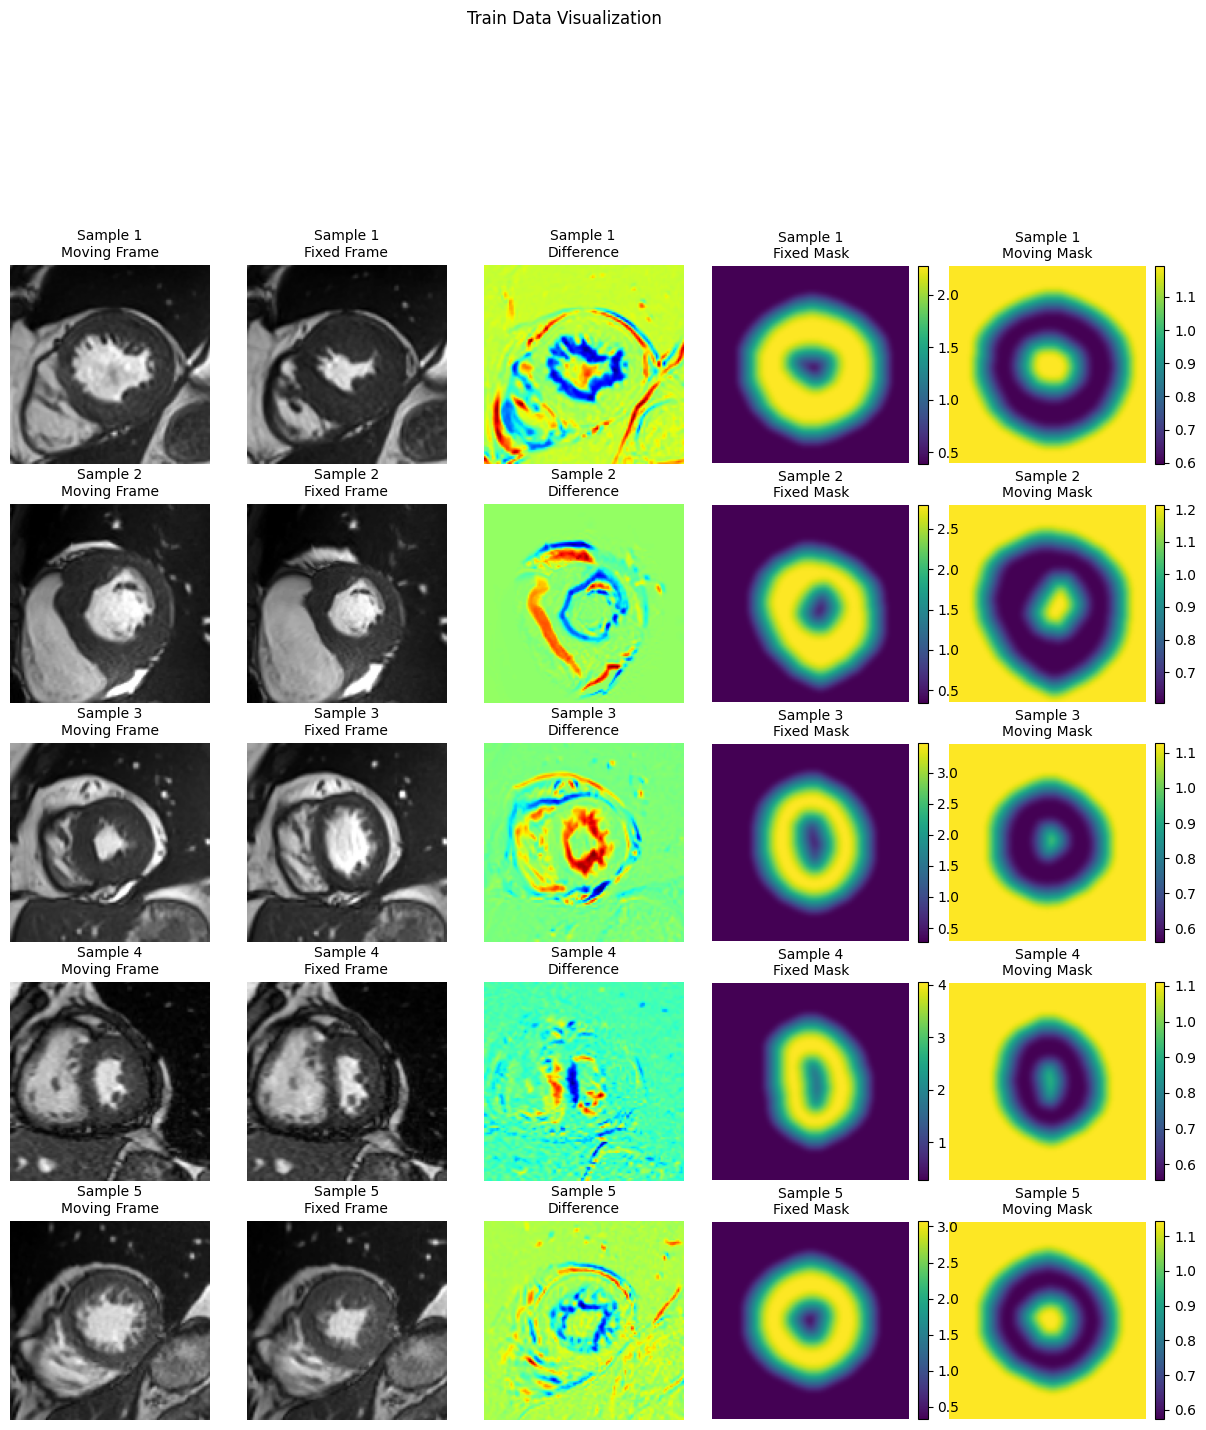

In [ ]:
# Visualize masked data (VoxelMorph with mask input)
print("\nVisualizing Masked Data:")
visualize_batch(data_gen_masked, use_mask=True)

##### Visualization functions

##### Strain calculation

In [15]:
def compute_strains(FrameDisplX, FrameDisplY, deltaX, deltaY):
    """
    Compute principal strains (Ep1, Ep2) and incompressibility strain (Ep3)
    from displacement fields.

    Args:
        FrameDisplX (np.ndarray): X displacement field (shape: H, W, T).
        FrameDisplY (np.ndarray): Y displacement field (shape: H, W, T).
        deltaX (float): Pixel spacing in the X direction (mm).
        deltaY (float): Pixel spacing in the Y direction (mm).

    Returns:
        Ep1All (np.ndarray): Principal strain 1 (shape: H, W, T).
        Ep2All (np.ndarray): Principal strain 2 (shape: H, W, T).
        Ep3All (np.ndarray): Incompressibility strain (shape: H, W, T).
    """
    # Compute spatial gradients
    UXx, UXy = np.gradient(FrameDisplX, deltaX, deltaY, axis=(0, 1))
    UYx, UYy = np.gradient(FrameDisplY, deltaX, deltaY, axis=(0, 1))

    # Compute Eulerian strain tensor components
    ExxAll = (2 * UXx - (UXx**2 + UYx**2)) / 2
    ExyAll = (UXy + UYx - (UXx * UXy + UYx * UYy)) / 2
    EyyAll = (2 * UYy - (UXy**2 + UYy**2)) / 2

    # Compute principal strains
    Ep1All = (ExxAll + EyyAll) / 2 + np.sqrt(((ExxAll - EyyAll) / 2) ** 2 + ExyAll ** 2)
    Ep2All = (ExxAll + EyyAll) / 2 - np.sqrt(((ExxAll - EyyAll) / 2) ** 2 + ExyAll ** 2)

    Ep1All, Ep2All, _ = enforce_full_principal_strain_order(Ep1All, Ep2All)

    # Compute incompressibility strain using the determinant rule
    Ep3All = 1 / ((1 + np.maximum(Ep1All, Ep2All)) * (1 + np.minimum(Ep1All, Ep2All))) - 1

    return Ep1All, Ep2All, Ep3All


def enforce_full_principal_strain_order(Ep1All, Ep2All, Ep3All=None):
    """
    Ensure Ep1All >= Ep2All >= Ep3All at every voxel (pixel) location.
    Sorts the three principal strains per point.

    Args:
        Ep1All (np.ndarray): First principal strain field.
        Ep2All (np.ndarray): Second principal strain field.
        Ep3All (np.ndarray): Third principal strain field (incompressibility strain).

    Returns:
        Ep1_sorted (np.ndarray): Largest principal strain.
        Ep2_sorted (np.ndarray): Middle principal strain.
        Ep3_sorted (np.ndarray): Smallest principal strain.
    """

    if Ep3All is not None:
        # Stack all principal strains along a new axis
        strain_stack = np.stack([Ep1All, Ep2All, Ep3All], axis=0)  # Shape (3, H, W, T)
    else:
        # Stack only the first two principal strains
        strain_stack = np.stack([Ep1All, Ep2All, Ep2All], axis=0) # Shape (2, H, W, T)
    # Sort along the new axis (axis=0) descending
    strain_sorted = np.sort(strain_stack, axis=0)[::-1, ...]  # Reverse to get descending

    Ep1_sorted = strain_sorted[0]
    Ep2_sorted = strain_sorted[1]
    Ep3_sorted = strain_sorted[2]

    return Ep1_sorted, Ep2_sorted, Ep3_sorted


##### Save Visualization

In [16]:
def save_images(moving, fixed, warped, disp, save_dir, batch_idx):
    """Save enhanced visualizations with strain analysis and consistent difference maps."""
    os.makedirs(save_dir, exist_ok=True)
    batch_size = moving.shape[0]
    # print(f"Type of moving: {type(moving)}, fixed: {type(fixed)}, warped: {type(warped)}, disp: {type(disp)}")

    # Ensure fixed has shape (batch, H, W, 1)
    if fixed.shape[-1] != 1:
        fixed = fixed[..., :1]  # Take the image channel only
    # print(f"Fixed for save_images - Shape: {fixed.shape}, Min: {fixed.min():.4f}, Max: {fixed.max():.4f}")

    for i in range(batch_size):
        # Extract images with proper dimension handling
        moving_img = moving[i, ..., 0].squeeze()
        warped_img = warped[i, ..., 0].squeeze()
        fixed_img = fixed[i, ..., 0].squeeze()

        # Extract displacement fields
        frame_displ_x = disp[i, ..., 0]
        frame_displ_y = disp[i, ..., 1]
        # print(f"Sample {i} Displacement Stats: X min={frame_displ_x.min():.4f}, max={frame_displ_x.max():.4f}, mean={frame_displ_x.mean():.4f}")
        # print(f"Sample {i} Displacement Stats: Y min={frame_displ_y.min():.4f}, max={frame_displ_y.max():.4f}, mean={frame_displ_y.mean():.4f}")

        # Calculate strain
        result = compute_strains(frame_displ_x, frame_displ_y, 1.0, 1.0)
        Ep1All, Ep2All, Ep3All = result
        final_strain = {'E1': Ep1All, 'E2': Ep2All, 'E3': Ep3All}

        # Create a figure with 3 rows and 5 columns
        fig, axes = plt.subplots(3, 5, figsize=(40, 21), constrained_layout=True)
        fig.suptitle(f"Sample {i} Analysis", fontsize=34, y=1.02)

        # --- First Row: Core Images ---
        images = [moving_img, fixed_img, warped_img]
        titles = ["Moving Image", "Fixed Image", "Warped Image"]

        Current_Row = 0

        for j, (img, title) in enumerate(zip(images, titles)):
            axes[Current_Row, j].imshow(img, cmap='gray')
            axes[Current_Row, j].set_title(title, fontsize=28)
            axes[Current_Row, j].axis('off')

        # Create RGB image: R and G from warped, B from fixed
        warped_norm = (warped_img - warped_img.min()) / (np.ptp(warped_img))
        fixed_norm = (fixed_img - fixed_img.min()) / (np.ptp(fixed_img))
        moving_norm = (moving_img - moving_img.min()) / (np.ptp(moving_img))

        rgb_wrpd_fxd = np.stack([
            warped_norm,      # Red channel
            fixed_norm,      # Green channel
            fixed_norm        # Blue channel
        ], axis=-1)

        axes[Current_Row, 3].imshow(rgb_wrpd_fxd)
        axes[Current_Row, 3].set_title("Warped (Red) over Fixed (RGB)", fontsize=28)
        axes[Current_Row, 3].axis('off')

        rgb_mvg_fxd = np.stack([
            moving_norm,      # Red channel
            fixed_norm,      # Green channel
            fixed_norm        # Blue channel
        ], axis=-1)

        axes[Current_Row, 4].imshow(rgb_mvg_fxd)
        axes[Current_Row, 4].set_title("Moving (Red) over Fixed (RGB)", fontsize=28)
        axes[Current_Row, 4].axis('off')

        # --- Second Row: Strain Analysis (Heatmaps) ---
        Current_Row = 2
        strain_min = min(np.min(final_strain['E1']), np.min(final_strain['E2']))
        strain_max = max(np.max(final_strain['E1']), np.max(final_strain['E2']))
        abs_max = max(abs(strain_min), abs(strain_max))
        vmin, vmax = -abs_max, abs_max  # Symmetric colormap
        vmin, vmax = -0.5, 0.5  # Symmetric colormap

        strain_images = [final_strain['E1'], final_strain['E2']]
        strain_titles = ["Final E1 Strain", "Final E2 Strain"]

        for j, (strain_img, title) in enumerate(zip(strain_images, strain_titles)):
            im = axes[Current_Row, j].imshow(strain_img, cmap='jet', vmin=vmin, vmax=vmax)
            axes[Current_Row, j].set_title(title, fontsize=28)
            axes[Current_Row, j].axis('off')
            if j == 0:
                add_colorbar(fig, axes[Current_Row, j], im, label='')
            else:
                add_colorbar(fig, axes[Current_Row, j], im, label="Strain (unitless)")

        diff = fixed_img - warped_img
        im6 = axes[Current_Row, 2].imshow(diff, cmap='bwr', vmin=-np.max(np.abs(diff)), vmax=np.max(np.abs(diff)))
        axes[Current_Row, 2].set_title("Warped Difference", fontsize=28)
        axes[Current_Row, 2].axis('off')
        add_colorbar(fig, axes[Current_Row, 2], im6, label="Intensity Difference")

        axes[Current_Row, 3].axis('off')
        axes[Current_Row, 4].axis('off')

        # --- Third Row: Strain Overlays on Fixed Image ---
        Current_Row = 1
        overlay_titles = ["E1 Strain Overlay", "E2 Strain Overlay"]

        for j, (strain_img, title) in enumerate(zip(strain_images, overlay_titles)):
            axes[Current_Row, j].imshow(fixed_img, cmap='gray', alpha=0.95)
            im_overlay = axes[Current_Row, j].imshow(strain_img, cmap='jet', alpha=0.5, vmin=vmin, vmax=vmax)
            axes[Current_Row, j].set_title(title, fontsize=28)
            axes[Current_Row, j].axis('off')
            if j == 0:
                add_colorbar(fig, axes[Current_Row, j], im_overlay, label='')
            else:
                add_colorbar(fig, axes[Current_Row, j], im_overlay, label="Strain (unitless)")

        error_map = np.abs(fixed_norm - warped_norm)
        vmin_error = min(np.min(np.abs(fixed_norm - warped_norm)), np.min(np.abs(fixed_norm - moving_norm)))
        vmax_error = max(np.max(np.abs(fixed_norm - warped_norm)), np.max(np.abs(fixed_norm - moving_norm)))

        im = axes[Current_Row, 3].imshow(error_map, cmap='hot', vmin=vmin_error, vmax=vmax_error)
        axes[Current_Row, 3].set_title("F-W Local Registration Error Heatmap", fontsize=28)
        axes[Current_Row, 3].axis('off')
        add_colorbar(fig, axes[Current_Row, 3], im, label="")

        error_map = np.abs(fixed_norm - moving_norm)
        im = axes[Current_Row, 4].imshow(error_map, cmap='hot', vmin=vmin_error, vmax=vmax_error)
        axes[Current_Row, 4].set_title("F-M Local Registration Error Heatmap", fontsize=28)
        axes[Current_Row, 4].axis('off')
        add_colorbar(fig, axes[Current_Row, 4], im, label="Absolute Intensity Difference")

        axes[Current_Row, 2].axis('off')
        # Print MSE for the differences
        mse_fw = np.mean((fixed_img - warped_img) ** 2)
        mse_fm = np.mean((fixed_img - moving_img) ** 2)
        axes[Current_Row, 2].set_title(f"F-W MSE: {mse_fw:.4f}", fontsize=28)
        axes[Current_Row, 4].set_title(f"F-M MSE: {mse_fm:.4f}", fontsize=28)

        # Save figure
        save_path = os.path.join(save_dir, f"sample_{i}_batch_{batch_idx}.png")
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close(fig)

def add_colorbar(fig, ax, im, label):
    """Adds a colorbar to the given axes."""
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    cbar.ax.set_ylabel(label, rotation=270, labelpad=15)

##### Visualize

In [17]:
def visualize_model(model, test_gen, save_dir, num_batches=5, use_mask=False,debug=False, debug_data=None):
    """
    Visualize and save images for a few batches, optionally handling fixed images with masks.

    This function generates visualizations for a specified number of batches of images
    using the provided model and saves the results to a designated directory. It fetches
    batches of moving and fixed images from the test generator, makes predictions with
    the model, and calls the save_images function to handle the visualization and saving.

    Parameters:
    - model (tf.keras.Model): The trained model used for making predictions on the input images.
    - test_gen (generator): A generator that yields batches of moving and fixed images. If use_mask=True,
      the fixed image is expected to have a mask as the second channel.
    - save_dir (str): The directory where visualizations will be saved.
    - delta_x (float): X-direction spatial step, used in strain calculations.
    - delta_y (float): Y-direction spatial step, used in strain calculations.
    - strain_ep_peak (float): Maximum allowable strain threshold used in strain validation.
    - num_batches (int): The number of batches to visualize (default is 5).
    - use_mask (bool): Whether the fixed image includes a mask as the second channel (default is False).

    Returns:
    None
    """
    os.makedirs(save_dir, exist_ok=True)

    for batch_idx in tqdm(range(num_batches), desc="Visualizing"):
        # Get batch of inputs from the test generator
        if debug:
            inputs = debug_data
            moving = inputs['moving']
            fixed = inputs['fixed']
        else:
            # inputs, _ = next(test_gen)
            # moving, fixed = inputs
            dataset = test_gen.get_dataset('train')
            iterator = iter(dataset)
            (moving, fixed), (warped, _) = next(iterator)
            
        # Ensure moving and fixed have the type np.ndarray
        if not isinstance(moving, np.ndarray):
            moving = moving.numpy()
        if not isinstance(fixed, np.ndarray):
            fixed = fixed.numpy()   

        # Make predictions using the model
        warped, disp = model.predict([moving, fixed], verbose=0)
        # Ensure warped and disp have the type np.ndarray
        if not isinstance(warped, np.ndarray):
            warped = warped.numpy()
        if not isinstance(disp, np.ndarray):    
            disp = disp.numpy()
        

        # Extract fixed image (and mask if applicable)
        # Handle fixed image dimensions
        if use_mask:
            fixed_img = fixed[..., 0:1]  # Keep channel dim for MSE
        else:
            fixed_img = fixed

        # Save visualizations by calling the save_images function
        save_images(moving, fixed_img, warped, disp, save_dir, batch_idx)

##### analyzing trained model function

In [18]:
def analyze_debug_data(model_config, kernel_key, lambda_val, model_folder, debug_data, data_gen, use_mask=False):
    """Run and save analysis on debug data for a trained model"""
    print(f"\n{'='*40}")
    print(f"Running debug analysis for {os.path.basename(model_folder)}")
    print(f"{'='*40}")

    # Reload the model to ensure consistent state
    model = load_model_for_eval(model_config, kernel_key, lambda_val)
    if not model:
        print(f"Failed to load model for {model_folder}. Skipping debug analysis.")
        return

    try:
        # Prepare debug data
        moving = debug_data['moving']

        # Adjust fixed image based on use_mask
        if use_mask:
            fixed = debug_data['fixed']  # Shape: (4, 128, 128, 3)
        else:
            fixed = debug_data['fixed'][..., :1]  # Shape: (4, 128, 128, 1)

        # Create a new debug_data dict with the adjusted fixed image
        adjusted_debug_data = {
            'moving': moving,
            'fixed': fixed,
            'warped': debug_data.get('warped', None),
            'displacements': debug_data.get('displacements', None)
        }

        # Create save directory
        debug_save_dir = os.path.join(model_folder, 'results', 'debug_analysis')
        os.makedirs(debug_save_dir, exist_ok=True)

        # Use visualize_model with debug=True to ensure debug_data is used
        visualize_model(
            model,
            data_gen,
            debug_save_dir,
            num_batches=1,
            use_mask=use_mask,
            debug=True,
            debug_data=adjusted_debug_data  # Use the adjusted debug_data
        )

        print(f"Debug analysis saved to: {debug_save_dir}")

    finally:
        if model:
            del model
        tf.keras.backend.clear_session()

#### Model Creation

##### MSE Loss

In [19]:
class MSE:
    """
    Sigma-weighted mean squared error for image reconstruction.
    """

    def __init__(self, image_sigma=1.0):
        self.image_sigma = image_sigma

    def mse(self, y_true, y_pred):
        return K.square(y_true - y_pred)

    def loss(self, y_true, y_pred, reduce='mean'):
        # compute mse
        mse = self.mse(y_true, y_pred)

        mask = y_true[..., 1]  # Second channel for fixed mask
        # apply mask
        mse = mse * tf.expand_dims(mask, axis=-1)

        # reduce
        if reduce == 'mean':
            mse = K.mean(mse)
        elif reduce == 'max':
            mse = K.max(mse)
        elif reduce is not None:
            raise ValueError(f'Unknown MSE reduction type: {reduce}')
        # loss
        return 1.0 / (self.image_sigma ** 2) * mse


##### Smootheness Loss

In [20]:
class Grad:
    """
    N-D gradient loss.
    loss_mult can be used to scale the loss value - this is recommended if
    the gradient is computed on a downsampled vector field (where loss_mult
    is equal to the downsample factor).
    """

    def __init__(self, penalty='l1', loss_mult=None, vox_weight=None):
        self.penalty = penalty
        self.loss_mult = loss_mult
        self.vox_weight = vox_weight

    def _diffs(self, y):
        vol_shape = y.get_shape().as_list()[1:-1]
        ndims = len(vol_shape)

        df = [None] * ndims
        for i in range(ndims):
            d = i + 1
            # permute dimensions to put the ith dimension first
            r = [d, *range(d), *range(d + 1, ndims + 2)]
            yp = K.permute_dimensions(y, r)
            dfi = yp[1:, ...] - yp[:-1, ...]

            if self.vox_weight is not None:
                w = K.permute_dimensions(self.vox_weight, r)
                # TODO: Need to add square root, since for non-0/1 weights this is bad.
                dfi = w[1:, ...] * dfi

            # permute back
            # note: this might not be necessary for this loss specifically,
            # since the results are just summed over anyway.
            r = [*range(1, d + 1), 0, *range(d + 1, ndims + 2)]
            df[i] = K.permute_dimensions(dfi, r)

        return df

    def loss(self, y_true, y_pred):
        """
        returns Tensor of size [bs]
        """
        mask = y_true[..., 1]  # [batch, H, W]
        mask = tf.expand_dims(mask, -1)  # [batch, H, W, 1]

        # Resize the mask to match the spatial dimensions of y_pred
        target_size = tf.shape(y_pred)[1:3]  # assuming y_pred shape: [batch, new_H, new_W, channels]
        # Use bilinear interpolation for continuous values
        mask = tf.image.resize(mask, size=target_size, method="bilinear")

        self.vox_weight = mask

        # Reset y_true[..., 1] to zero to restore it as zero_phi
        x_channel = y_true[..., 0:1]  # [batch, H, W, 1]
        zero_channel = tf.zeros_like(x_channel)  # [batch, H, W, 1]
        y_true = tf.concat([x_channel, zero_channel], axis=-1)  # [batch, H, W, 2]

        if self.penalty == 'l1':
            dif = [tf.abs(f) for f in self._diffs(y_pred)]
        else:
            assert self.penalty == 'l2', 'penalty can only be l1 or l2. Got: %s' % self.penalty
            dif = [f * f for f in self._diffs(y_pred)]

        df = [tf.reduce_mean(K.batch_flatten(f), axis=-1) for f in dif]
        grad = tf.add_n(df) / len(df)

        if self.loss_mult is not None:
            grad *= self.loss_mult

        return grad

    def mean_loss(self, y_true, y_pred):
        """
        returns Tensor of size ()
        """

        return K.mean(self.loss(y_true, y_pred))

##### Model params

In [21]:
def create_voxelmorph_model(use_mse_mask=False, use_smoothness_mask=False, kernel_config='default', lambda_val=0.1):
    input_shape = (128, 128)
    src_feats = 1  # Moving image has 1 channel
    trg_feats = 3 if (use_mse_mask or use_smoothness_mask) else 1  # Fixed image + mask channels

    # Input layers
    source_input = tf.keras.Input(shape=(*input_shape, src_feats), name='source_input')
    target_input = tf.keras.Input(shape=(*input_shape, trg_feats), name='target_input')

    # Build VxmDense model
    nb_features = [
        [16, 32, 32, 32],  # encoder
        [32, 32, 32, 32, 32, 16, 16]  # decoder
    ]

    # Get kernel configuration
    kernels = KERNEL_CONFIGS[kernel_config] if USE_CUSTOM_VXM else None

    # Create base VxmDense model
    vm_model = vxm.networks.VxmDense(
        inshape=input_shape,
        nb_unet_features=nb_features,
        unet_kernel_sizes=kernels,
        src_feats=src_feats,
        trg_feats=trg_feats,
        input_model=tf.keras.Model(inputs=[source_input, target_input], outputs=[source_input, target_input]),
        int_steps=5,
        reg_field = 'warp'
    )

    # Configure losses
    losses = []
    loss_weights = []

    # Loss functions
    losses = []
    loss_weights = []

    # 1. MSE Loss (with optional mask)
    if use_mse_mask:
        # Custom MSE loss with BG-to-myocardium ratio mask
        losses.append(MSE().loss)
    else:
        losses.append(vxm.losses.MSE().loss)

    loss_weights.append(1)  # Weight for similarity loss

    # 2. Smoothness Loss (with optional mask)
    if use_smoothness_mask:
        # Custom smoothness loss
        losses.append(Grad('l2').loss)
    else:
        losses.append(vxm.losses.Grad('l2').loss)

    loss_weights.append(lambda_val)  # Weight for smoothness loss

    # Compile model
    vm_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=losses,
        loss_weights=loss_weights
    )
    return vm_model

##### Callbacks

In [22]:
def get_callbacks(model_folder):
    """
    Returns a list of callbacks for training.

    Parameters:
    - model_folder (str): Path to the model directory where logs and weights will be saved.

    Returns:
    - List of Keras callbacks.
    """
    return [
        ModelCheckpoint(
            filepath=os.path.join(model_folder, 'weights', 'epoch{epoch:02d}_loss{loss:.5f}.weights.h5'),
            save_weights_only=True,
            save_freq='epoch',
            verbose=1
        ),
        ModelCheckpoint(
            filepath=os.path.join(model_folder, 'weights', 'best_model_val_loss_{val_loss:.5f}.weights.h5'),
            monitor='val_loss',
            save_weights_only=True,
            save_best_only=True,
            verbose=1
        ),
        CSVLogger(os.path.join(model_folder, 'logs', 'training_log.csv')),
        EarlyStopping(
            monitor='val_loss',
            patience=30,
            mode='min',
            verbose=1,
            restore_best_weights=True
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=10,
            verbose=1,
            min_lr=1e-6
        ),
        TensorBoard(
            log_dir=os.path.join(model_folder, 'logs'),
            histogram_freq=0,  # Keep disabled to save resources
            write_graph=True,
            write_images=True
        )
    ]

###### Optimized

In [23]:
class OptimizedLossMonitor(tf.keras.callbacks.Callback):
    """Enhanced loss monitoring with automatic NaN/Inf detection and recovery."""
    
    def __init__(self, patience: int = 3):
        super().__init__()
        self.patience = patience
        self.nan_inf_count = 0
        
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        val_loss = logs.get('val_loss')
        
        has_nan_inf = False
        if loss is not None and (tf.math.is_nan(loss) or tf.math.is_inf(loss)):
            print(f"⚠️ Training loss became NaN/Inf at epoch {epoch + 1}")
            has_nan_inf = True
            
        if val_loss is not None and (tf.math.is_nan(val_loss) or tf.math.is_inf(val_loss)):
            print(f"⚠️ Validation loss became NaN/Inf at epoch {epoch + 1}")
            has_nan_inf = True
            
        if has_nan_inf:
            self.nan_inf_count += 1
            if self.nan_inf_count >= self.patience:
                print(f"🛑 Stopping training: Loss became NaN/Inf for {self.nan_inf_count} consecutive epochs")
                self.model.stop_training = True
        else:
            self.nan_inf_count = 0  # Reset counter on good epoch

class OptimizedModelCheckpoint(tf.keras.callbacks.Callback):
    """Custom checkpoint callback with better file management and optimizer state saving."""
    
    def __init__(self, filepath: str, monitor: str = 'val_loss', save_best_only: bool = False, 
                 save_optimizer: bool = True, verbose: int = 1):
        super().__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.save_best_only = save_best_only
        self.save_optimizer = save_optimizer
        self.verbose = verbose
        self.best_value = float('inf')
        
    def on_epoch_end(self, epoch, logs=None):
        current_value = logs.get(self.monitor)
        
        if current_value is None:
            print(f"⚠️ Warning: {self.monitor} not found in logs")
            return
            
        save_model = False
        if self.save_best_only:
            if current_value < self.best_value:
                self.best_value = current_value
                save_model = True
        else:
            save_model = True
            
        if save_model:
            # Format filepath with epoch and metric value
            filepath = self.filepath.format(epoch=epoch+1, **logs)
            
            try:
                # Save model weights
                self.model.save_weights(filepath)
                
                # Save optimizer state and training metadata
                if self.save_optimizer:
                    metadata = {
                        'epoch': epoch + 1,
                        'optimizer_state': self.model.optimizer.get_config(),
                        'metrics': logs,
                        'best_value': self.best_value
                    }
                    
                    metadata_path = filepath.replace('.weights.h5', '_metadata.json')
                    with open(metadata_path, 'w') as f:
                        json.dump(metadata, f, indent=2, default=str)
                
                if self.verbose:
                    print(f"💾 Saved checkpoint: {filepath}")
                    
            except Exception as e:
                print(f"❌ Error saving checkpoint: {e}")

def get_optimized_callbacks(model_folder: str) -> List[tf.keras.callbacks.Callback]:
    """Get optimized callbacks for training."""
    weights_dir = os.path.join(model_folder, 'weights')
    logs_dir = os.path.join(model_folder, 'logs')
    
    os.makedirs(weights_dir, exist_ok=True)
    os.makedirs(logs_dir, exist_ok=True)
    
    return [
        # Save every epoch with metadata
        OptimizedModelCheckpoint(
            filepath=os.path.join(weights_dir, 'epoch_{epoch:03d}_loss_{loss:.6f}.weights.h5'),
            save_best_only=False,
            save_optimizer=True,
            verbose=1
        ),
        # Save best model
        OptimizedModelCheckpoint(
            filepath=os.path.join(weights_dir, 'best_model_val_loss_{val_loss:.6f}.weights.h5'),
            monitor='val_loss',
            save_best_only=True,
            save_optimizer=True,
            verbose=1
        ),
        # Enhanced loss monitoring
        OptimizedLossMonitor(patience=3),
        # Standard callbacks with optimized settings
        CSVLogger(os.path.join(logs_dir, 'training_log.csv'), append=True),
        EarlyStopping(
            monitor='val_loss',
            patience=25,  # Reduced from 30 for faster convergence detection
            mode='min',
            verbose=1,
            restore_best_weights=True
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,  # Less aggressive reduction
            patience=8,   # Reduced from 10
            verbose=1,
            min_lr=1e-7,
            cooldown=2
        ),
        TensorBoard(
            log_dir=logs_dir,
            histogram_freq=0,
            write_graph=False,  # Disable to save memory
            write_images=False,  # Disable to save memory
            update_freq='epoch'
        )
    ]

#### Model Loading

In [24]:
def load_model_with_resume(config: Dict, kernel_key: str, lambda_val: float, 
                          epoch: Optional[int] = None) -> Tuple[tf.keras.Model, int]:
    """
    Load model with robust resume capability.
    
    Returns:
        Tuple of (model, starting_epoch)
    """
    model_dir = os.path.join(
        config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
        'weights'
    )
    
    # Create fresh model
    model = create_voxelmorph_model(
        use_mse_mask=config['use_mse_mask'],
        use_smoothness_mask=config['use_smoothness_mask'],
        kernel_config=kernel_key,
        lambda_val=lambda_val
    )
    
    starting_epoch = 0
    
    if not os.path.exists(model_dir):
        print(f"📁 Creating new model directory: {model_dir}")
        os.makedirs(model_dir, exist_ok=True)
        return model, starting_epoch
    
    # Find the latest checkpoint
    weight_files = [f for f in os.listdir(model_dir) if f.endswith('.weights.h5')]
    
    if not weight_files:
        print("🆕 No existing checkpoints found. Starting fresh training.")
        return model, starting_epoch
    
    if epoch is not None:
        # Load specific epoch
        target_files = [f for f in weight_files if f.startswith(f'epoch_{epoch:03d}_')]
        if not target_files:
            print(f"⚠️ Checkpoint for epoch {epoch} not found. Starting fresh.")
            return model, starting_epoch
        checkpoint_file = target_files[0]
        starting_epoch = epoch
    else:
        # Load latest checkpoint
        weight_files.sort(key=lambda x: os.path.getctime(os.path.join(model_dir, x)), reverse=True)
        checkpoint_file = weight_files[0]
        
        # Extract epoch from filename
        try:
            import re
            match = re.search(r'epoch_(\d+)_', checkpoint_file)
            if match:
                starting_epoch = int(match.group(1))
        except:
            starting_epoch = 0
    
    checkpoint_path = os.path.join(model_dir, checkpoint_file)
    
    try:
        model.load_weights(checkpoint_path)
        print(f"✅ Resumed from checkpoint: {checkpoint_file} (epoch {starting_epoch})")
        
        # Load optimizer state if available
        metadata_path = checkpoint_path.replace('.weights.h5', '_metadata.json')
        if os.path.exists(metadata_path):
            try:
                with open(metadata_path, 'r') as f:
                    metadata = json.load(f)
                print(f"📊 Loaded training metadata from epoch {metadata.get('epoch', 'unknown')}")
            except Exception as e:
                print(f"⚠️ Could not load metadata: {e}")
        
        return model, starting_epoch
        
    except Exception as e:
        print(f"❌ Error loading checkpoint {checkpoint_file}: {e}")
        print("🆕 Starting fresh training.")
        return model, 0

NameError: name 'Optional' is not defined

##### Weights loading

In [ ]:
def load_model_for_eval(config, kernel_key, lambda_val, load_best=True, epoch=None):
    """
    Robust model loading with architecture verification to load either the best model
    based on loss or a specific epoch's weights.

    Parameters:
    - config: Model configuration dictionary.
    - kernel_key: Kernel configuration key.
    - lambda_val: Lambda value for smoothness loss.
    - load_best: Boolean, if True loads the best model based on loss (considering all model files), if False loads the specified epoch (default=True).
    - epoch: Integer, the epoch number to load (required if load_best=False, ignored otherwise).

    Returns:
    - Loaded model or None if loading fails.
    """
    # Get model directory
    model_dir = os.path.join(
        config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
        'weights'
    )

    # Check directory exists
    if not os.path.exists(model_dir):
        print(f"⚠️ Directory not found: {model_dir}")
        return None

    # Define custom objects
    custom_objects = {
        'Grad': Grad,
        'MSE': MSE,
        'Adam': tf.keras.optimizers.Adam,
        'vxm': vxm.losses  # If using original voxelmorph losses
    }

    if load_best:
        # Find all relevant model files:
        # 1. best_model_val_loss_* files (.weights.h5 or .keras)
        # 2. epoch*_loss*.weights.h5 files
        # 3. Other .keras files (e.g., final_model.keras)
        model_files = [f for f in os.listdir(model_dir) if (f.startswith('best_model_val_loss_') and (f.endswith('.weights.h5') or f.endswith('.keras'))) or
                       (f.startswith('epoch') and f.endswith('.weights.h5') and re.match(r'epoch\d+_loss\d+\.\d+\.weights\.h5', f)) or
                       (f.endswith('.keras') and not f.startswith('best_model_val_loss_'))]

        if not model_files:
            print(f"⛔ No model files found in {model_dir}")
            return None

        # Parse loss from filenames and find the best model
        best_model = None
        lowest_loss = float('inf')
        file_extension = None
        loss_type = None  # To track the type of loss (val_loss, train_loss, or unknown)

        for model_file in model_files:
            loss = float('inf')  # Default loss for files without a loss value in the name
            loss_type_candidate = 'unknown'

            if model_file.startswith('best_model_val_loss_'):
                # Extract validation loss from best_model_val_loss_* files
                match = re.search(r'best_model_val_loss_(\d+\.\d+)', model_file)
                if match:
                    loss = float(match.group(1))
                    loss_type_candidate = 'val_loss'
            elif model_file.startswith('epoch'):
                # Extract training loss from epoch*_loss*.weights.h5 files
                match = re.search(r'epoch\d+_loss(\d+\.\d+)\.weights\.h5', model_file)
                if match:
                    loss = float(match.group(1))
                    loss_type_candidate = 'train_loss'
            else:
                # For other .keras files (e.g., final_model.keras), we can't determine loss from the filename
                # Assign a high loss to deprioritize unless it's the only option
                loss_type_candidate = 'unknown'
                print(f"⚠️ No loss value found in filename {model_file}. Deprioritizing this file.")

            if loss < lowest_loss:
                lowest_loss = loss
                best_model = model_file
                loss_type = loss_type_candidate
                # Determine file extension based on the selected file
                file_extension = '.keras' if model_file.endswith('.keras') else '.weights.h5'

        if best_model is None:
            print(f"⛔ Could not determine best model in {model_dir}")
            return None

        model_path = os.path.join(model_dir, best_model)
        if loss_type == 'unknown':
            print(f"Loading best model: {best_model} (no loss value available in filename)")
        else:
            print(f"Loading best model: {best_model} with {loss_type}={lowest_loss}")

    else:
        # Load specific epoch weights (format: epoch{epoch:02d}_loss{loss:.5f}.weights.h5)
        if epoch is None:
            print("⛔ Epoch number must be specified when load_best=False")
            return None

        # Look for files matching the specified epoch
        epoch_pattern = f'epoch{epoch:02d}_loss[0-9]+\.[0-9]+\.weights\.h5'
        model_files = [f for f in os.listdir(model_dir) if re.match(epoch_pattern, f)]
        if not model_files:
            print(f"⛔ No weight files found for epoch {epoch} in {model_dir}")
            return None

        # There should be only one file matching the epoch
        if len(model_files) > 1:
            print(f"⚠️ Multiple files found for epoch {epoch}: {model_files}. Using the first one.")

        best_model = model_files[0]
        model_path = os.path.join(model_dir, best_model)
        file_extension = '.weights.h5'
        print(f"Loading epoch-specific model: {best_model}")

    try:
        # Recreate model architecture first
        model = create_voxelmorph_model(
            use_mse_mask=config['use_mse_mask'],
            use_smoothness_mask=config['use_smoothness_mask'],
            kernel_config=kernel_key,
            lambda_val=lambda_val
        )

        # Load weights into architecture
        model.load_weights(model_path)
        print(f"✅ Successfully loaded {best_model}")
        return model

    except Exception as e:
        print(f"❌ Loading weights failed: {str(e)}")
        print("Trying fallback load method...")
        try:
            # Fallback only makes sense for .keras files (full model)
            if file_extension == '.keras':
                return tf.keras.models.load_model(
                    model_path,
                    custom_objects=custom_objects
                )
            else:
                raise
        except Exception as e2:
            print(f"⛔ Critical load failure: {str(e2)}")
            return None

#### Model training

##### Training Functions

In [ ]:
import os
import json
import gc
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau, TensorBoard
import matplotlib.pyplot as plt
from typing import Dict, List, Optional, Tuple, Any

class TrainingManager:
    """Centralized training management with robust checkpointing and resume capabilities."""
    
    def __init__(self, models_base_path: str):
        self.models_base_path = models_base_path
        self.progress_file = os.path.join(models_base_path, "training_progress.json")
        self.test_results_file = os.path.join(models_base_path, "test_results.json")
        self.training_progress = {}
        self.test_results = {}
        
        # Memory optimization settings
        # tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
        
    def load_or_initialize_progress(self) -> None:
        """Load existing progress or initialize new tracking."""
        if os.path.exists(self.progress_file):
            try:
                with open(self.progress_file, 'r') as f:
                    self.training_progress = json.load(f)
                print(f"✅ Loaded training progress from {self.progress_file}")
            except Exception as e:
                print(f"⚠️ Error loading progress: {e}. Starting fresh.")
                self.training_progress = {}
        
        if os.path.exists(self.test_results_file):
            try:
                with open(self.test_results_file, 'r') as f:
                    self.test_results = json.load(f)
                print(f"✅ Loaded test results from {self.test_results_file}")
            except Exception as e:
                print(f"⚠️ Error loading test results: {e}")
                self.test_results = {}
    
    def save_progress(self) -> None:
        """Save current training progress."""
        try:
            os.makedirs(os.path.dirname(self.progress_file), exist_ok=True)
            with open(self.progress_file, 'w') as f:
                json.dump(self.training_progress, f, indent=2)
            print(f"💾 Saved progress to {self.progress_file}")
        except Exception as e:
            print(f"❌ Error saving progress: {e}")
    
    def save_test_results(self) -> None:
        """Save test results."""
        try:
            os.makedirs(os.path.dirname(self.test_results_file), exist_ok=True)
            with open(self.test_results_file, 'w') as f:
                json.dump(self.test_results, f, indent=2)
            print(f"💾 Saved test results to {self.test_results_file}")
        except Exception as e:
            print(f"❌ Error saving test results: {e}")


In [ ]:
class LossMonitor(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        val_loss = logs.get('val_loss')
        if loss is not None and (tf.math.is_nan(loss) or tf.math.is_inf(loss)):
            print(f"Stopping training: Loss became NaN or inf at epoch {epoch + 1}")
            self.model.stop_training = True
        if val_loss is not None and (tf.math.is_nan(val_loss) or tf.math.is_inf(val_loss)):
            print(f"Stopping training: Validation loss became NaN or inf at epoch {epoch + 1}")
            self.model.stop_training = True

import glob

def train_model(model, train_dataset, val_dataset, data_gen, model_folder, config, kernel_key, lambda_val,
                epochs=100, use_mask=False, test_mode=False, resume_from_epoch=None):
    print(f"Starting training for {model_folder}")
    os.makedirs(os.path.join(model_folder, "weights"), exist_ok=True)
    os.makedirs(os.path.join(model_folder, "logs"), exist_ok=True)
    os.makedirs(os.path.join(model_folder, "results"), exist_ok=True)

    callbacks = get_callbacks(model_folder)
    callbacks.append(LossMonitor())

    
    # train_steps = (data_gen.train_pairs_count + data_gen.batch_size - 1) // data_gen.batch_size
    # val_steps = (data_gen.val_pairs_count + data_gen.batch_size - 1) // data_gen.batch_size

    train_steps = data_gen.get_steps_per_epoch('train')
    val_steps = data_gen.get_steps_per_epoch('val')

    if test_mode:
        epochs = 2
        train_steps = min(2, train_steps)
        val_steps = min(1, val_steps)
        print(f"\n⚠️ Running in TEST MODE (2 epochs, {train_steps} train/{val_steps} val steps) ⚠️")
        train_dataset = train_dataset.take(train_steps)
        val_dataset = val_dataset.take(val_steps)

    print("Inspecting first batch of training data...")
    for batch in train_dataset.take(1):
        (moving, fixed), (fixed_target, zero_phi) = batch
        print(f"Moving image shape: {moving.shape}")
        print(f"Fixed image shape: {fixed.shape}")
        print(f"Fixed target shape: {fixed_target.shape}")
        print(f"Zero phi shape: {zero_phi.shape}")

    train_dataset = train_dataset.repeat()
    val_dataset = val_dataset.repeat()

    initial_epoch = 0
    if resume_from_epoch is not None:
        print(f"Attempting to resume training from epoch {resume_from_epoch}...")
        loaded_model = load_model_for_eval(
            config=config,
            kernel_key=kernel_key,
            lambda_val=lambda_val,
            load_best=False,
            epoch=resume_from_epoch
        )
        if loaded_model is None:
            print(f"Failed to load weights for epoch {resume_from_epoch}. Starting from epoch 0.")
        else:
            model.set_weights(loaded_model.get_weights())
            initial_epoch = resume_from_epoch
            print(f"Resumed training from epoch {resume_from_epoch}")
            del loaded_model
            tf.keras.backend.clear_session()

    print(f"Training model for {epochs} epochs with {train_steps} train steps and {val_steps} validation steps...")
    try:
        history = model.fit(
            train_dataset,
            validation_data=val_dataset,
            steps_per_epoch=train_steps,
            validation_steps=val_steps,
            epochs=epochs,
            initial_epoch=initial_epoch,
            callbacks=callbacks,
            verbose=1
        )
        current_epoch = epochs  # Full training completed
    except Exception as e:
        print(f"Error during model.fit: {str(e)}")
        current_epoch = initial_epoch + len(history.history["loss"]) if 'history' in locals() else initial_epoch
        raise

    if not test_mode:
        print("Saving final model...")
        final_model_path = os.path.join(model_folder, "final_model.keras")
        try:
            model.save(final_model_path)
            print(f"Final model saved at: {final_model_path}")
        except Exception as e:
            print(f"Error saving final model: {str(e)}")
            raise

        print("Plotting loss curve...")
        try:
            plt.figure(figsize=(8, 6))
            plt.plot(range(1, len(history.history["loss"]) + 1), history.history["loss"], label="Training Loss", marker="o")
            plt.plot(range(1, len(history.history["val_loss"]) + 1), history.history["val_loss"], label="Validation Loss", marker="o")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.title(f"Training and Validation {'(TEST MODE) ' if test_mode else ''}Loss Over Epochs")
            plt.legend()
            plt.grid(True)

            loss_curve_path = os.path.join(model_folder, "results", "loss_curve.png")
            plt.savefig(loss_curve_path)
            plt.show()
            print(f"Loss curve saved at: {loss_curve_path}{'_TEST' if test_mode else ''}")
        except Exception as e:
            print(f"Error plotting loss curve: {str(e)}")
            raise

        print(f"Training completed for {model_folder}")

    return history, current_epoch  # Return current_epoch to update progress

##### Test all models first on small data

In [ ]:
def test_all_models(models_config, lambdas, train_ds, val_ds, data_gen):
    """
    Test-run all models with minimal data/epochs first.

    Parameters:
    - models_config: Dictionary of model configurations.
    - lambdas: List of lambda values for smoothness loss.
    - train_ds: Training dataset.
    - val_ds: Validation dataset.
    - data_gen: Data generator used to create the datasets.

    Returns:
    - Dictionary of test results (success/failure) for each model configuration.
    """
    test_results = {}

    for model_key in models_config:
        config = models_config[model_key]
        test_results[model_key] = {}
        print(f"\nTesting model: {config['name']}")

        for kernel_key in KERNEL_KEYS:
            test_results[model_key][kernel_key] = {}

            for lambda_val in lambdas:
                print(f"\n🔍 Testing {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                model = None
                try:
                    # Create fresh model
                    model = create_voxelmorph_model(
                        use_mse_mask=config['use_mse_mask'],
                        use_smoothness_mask=config['use_smoothness_mask'],
                        kernel_config=kernel_key,
                        lambda_val=lambda_val
                    )

                    # Test training
                    print(f"Running test training for {config['name']} (kernel={kernel_key}, λ={lambda_val})...")
                    _ = train_model(
                        model=model,
                        train_dataset=train_ds.take(2),
                        val_dataset=val_ds.take(1),
                        data_gen=data_gen,
                        model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        config=config,  # Pass config
                        kernel_key=kernel_key,  # Pass kernel_key
                        lambda_val=lambda_val,  # Pass lambda_val
                        epochs=2,
                        use_mask=config['use_mask'],
                        test_mode=True
                    )

                    # Pass config details and data_gen to analyze_debug_data
                    print(f"Analyzing debug data for {config['name']} (kernel={kernel_key}, λ={lambda_val})...")
                    analyze_debug_data(
                        model_config=config,
                        kernel_key=kernel_key,
                        lambda_val=lambda_val,
                        model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        debug_data=debug_data,
                        data_gen=data_gen,
                        use_mask=config['use_mask']
                    )

                    # Record success
                    test_results[model_key][kernel_key][lambda_val] = True
                    print(f"✅ Test passed for {config['name']} (kernel={kernel_key}, λ={lambda_val})")

                except Exception as e:
                    test_results[model_key][kernel_key][lambda_val] = False
                    print(f"❌ Test FAILED for {config['name']} (kernel={kernel_key}, λ={lambda_val}): {str(e)}")

                finally:
                    print("Cleaning up...")
                    if model:
                        del model
                    gc.collect()
                    tf.keras.backend.clear_session()
                    print("Cleanup complete.")

    return test_results

##### Train all models

In [ ]:
def train_all_models(models_config: Dict, lambdas: List[float], train_ds: tf.data.Dataset, val_ds: tf.data.Dataset, 
                     data_gen: SimpleHybridDataLoader, debug_data: Dict, test_results: Dict):
    """
    Train all models that passed the pretest.

    Args:
        models_config: Dictionary of model configurations.
        lambdas: List of lambda values for smoothness loss.
        train_ds: Training dataset.
        val_ds: Validation dataset.
        data_gen: SimpleHybridDataLoader instance.
        debug_data: Debug data for analysis.
        test_results: Results from pretest phase.
    """
    for model_key in models_config:
        config = models_config[model_key]
        print(f"\nTraining model: {config['name']}")
        for kernel_key in KERNEL_KEYS:
            for lambda_val in lambdas:
                if not test_results.get(model_key, {}).get(kernel_key, {}).get(str(lambda_val), False):
                    print(f"\n⏩ Skipping {config['name']} (kernel={kernel_key}, λ={lambda_val}) - failed pretest")
                    continue

                print(f"\nTraining {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                try:
                    model = create_voxelmorph_model(
                        use_mse_mask=config['use_mse_mask'],
                        use_smoothness_mask=config['use_smoothness_mask'],
                        kernel_config=kernel_key,
                        lambda_val=lambda_val
                    )

                    resume_from_epoch = training_progress[model_key][kernel_key][str(lambda_val)]["epochs_trained"]
                    history, current_epoch = train_model(
                        model=model,
                        train_dataset=train_ds,
                        val_dataset=val_ds,
                        data_gen=data_gen,
                        model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        config=config,
                        kernel_key=kernel_key,
                        lambda_val=lambda_val,
                        epochs=100,
                        use_mask=config['use_mask'],
                        resume_from_epoch=resume_from_epoch
                    )

                    try:
                        print(f"Analyzing debug data for {config['name']} (kernel={kernel_key}, λ={lambda_val})...")
                        analyze_debug_data(
                            model_config=config,
                            kernel_key=kernel_key,
                            lambda_val=lambda_val,
                            model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                            debug_data=debug_data,
                            data_gen=data_gen,
                            use_mask=config['use_mask']
                        )
                    except Exception as e:
                        print(f"Error during analyze_debug_data: {str(e)}")
                        raise

                except Exception as e:
                    print(f"Error during training {config['name']} (kernel={kernel_key}, λ={lambda_val}): {str(e)}")
                    raise
                finally:
                    print("Cleaning up...")
                    if 'model' in locals():
                        del model
                    gc.collect()
                    tf.keras.backend.clear_session()
                    print("Cleanup complete.")

##### Testing all models

In [ ]:
# import json
# import os

# TEST_RESULTS_FILE = "test_results.json"
# PROGRESS_FILE = "training_progress.json"

# # Load or initialize test_results
# if os.path.exists(TEST_RESULTS_FILE):
#     try:
#         with open(TEST_RESULTS_FILE, 'r') as f:
#             test_results = json.load(f)
#         print(f"Loaded existing test results from {TEST_RESULTS_FILE}")
#     except Exception as e:
#         print(f"Error loading {TEST_RESULTS_FILE}: {str(e)}. Starting pretest phase.")
#         test_results = {}
# else:
#     print("\n🚦 Starting PRETEST PHASE (all models)")
#     test_results = {}
#     for model_key in MODEL_CONFIG:
#         config = MODEL_CONFIG[model_key]
#         print(f"\nProcessing model: {config['name']}")

#         if config['use_mask']:
#             train_ds = data_gen_masked.get_dataset('train')
#             val_ds = data_gen_masked.get_dataset('val')
#             data_gen = data_gen_masked
#             print(f"\n🔧 Using MASKED datasets for {config['name']}")
#         else:
#             train_ds = data_gen_noMask.get_dataset('train')
#             val_ds = data_gen_noMask.get_dataset('val')
#             data_gen = data_gen_noMask
#             print(f"\n🔧 Using UNMASKED datasets for {config['name']}")

#         print(f"Starting pretest for {config['name']}...")
#         try:
#             model_test_results = test_all_models(
#                 {model_key: config},
#                 LAMBDAS,
#                 train_ds,
#                 val_ds,
#                 data_gen
#             )
#             test_results.update(model_test_results)
#             print(f"Pretest completed for {config['name']}")
#         except Exception as e:
#             print(f"Error in pretest for {config['name']}: {str(e)}")
#             raise
        
#     # Ensure the directory exists before writing
#     os.makedirs(os.path.dirname(TEST_RESULTS_FILE), exist_ok=True)
#     try:
#         with open(TEST_RESULTS_FILE, 'w') as f:
#             json.dump(test_results, f)
#         print(f"Saved test results to {TEST_RESULTS_FILE}")
#     except Exception as e:
#         print(f"Error saving {TEST_RESULTS_FILE}: {str(e)}")
#         raise


##### Test Summary

In [ ]:
# def print_test_summary(test_results, model_config, lambdas):
#     """Prints a clean summary of pretest outcomes"""
#     print("\n📋 PRETEST SUMMARY")
#     print("==================")

#     total_models = len(model_config) * len(KERNEL_KEYS) * len(lambdas)
#     passed = sum(sum(sum(k.values()) for k in m.values()) for m in test_results.values())

#     print(f"\n✅ Total Passed: {passed}/{total_models} ({passed/total_models:.1%})")
#     print(f"❌ Total Failed: {total_models - passed}/{total_models}")

#     print("\n🔍 Per-Model Breakdown:")
#     for model_key in model_config:
#         model_name = model_config[model_key]['name']
#         print(f"\n- {model_name}:")
#         for kernel_key in KERNEL_KEYS:
#             passed_count = sum(test_results[model_key][kernel_key].values())
#             print(f"  ⚙️ {kernel_key}: {passed_count}/{len(lambdas)} passed")

# # Usage
# print_test_summary(test_results, MODEL_CONFIG, LAMBDAS)

##### Training the models

In [ ]:

# # Create model configurations list
# model_configs_list = []
# for model_key in MODEL_CONFIG:
#     config = MODEL_CONFIG[model_key]
#     for kernel_key in KERNEL_KEYS:
#         for lambda_val in LAMBDAS:
#             if not test_results.get(model_key, {}).get(kernel_key, {}).get(str(lambda_val), False):
#                 continue
#             model_configs_list.append({
#                 'model_key': model_key,
#                 'kernel_key': kernel_key,
#                 'lambda_val': lambda_val,
#                 'config': config
#             })

# # Load or initialize training progress
# training_progress = {}
# if os.path.exists(PROGRESS_FILE):
#     try:
#         with open(PROGRESS_FILE, 'r') as f:
#             training_progress = json.load(f)
#         print(f"Loaded existing training progress from {PROGRESS_FILE}")
#     except Exception as e:
#         print(f"Error loading {PROGRESS_FILE}: {str(e)}. Starting with empty progress.")
# else:
#     print(f"Creating new training progress file {PROGRESS_FILE}")

# # Initialize missing entries in training_progress
# for model_info in model_configs_list:
#     model_key = model_info['model_key']
#     kernel_key = model_info['kernel_key']
#     lambda_val = str(model_info['lambda_val'])
#     if model_key not in training_progress:
#         training_progress[model_key] = {}
#     if kernel_key not in training_progress[model_key]:
#         training_progress[model_key][kernel_key] = {}
#     if lambda_val not in training_progress[model_key][kernel_key]:
#         training_progress[model_key][kernel_key][lambda_val] = {"trained": False, "epochs_trained": 0}

# # Save initial training_progress if new
# if not os.path.exists(PROGRESS_FILE):
#     try:
#         with open(PROGRESS_FILE, 'w') as f:
#             json.dump(training_progress, f, indent=2)
#         print(f"Saved initial training progress to {PROGRESS_FILE}")
#     except Exception as e:
#         print(f"Error saving {PROGRESS_FILE}: {str(e)}")
#         raise

# # Training loop
# print("\n🏁 Starting FULL TRAINING PHASE")
# for model_info in model_configs_list:
#     model_key = model_info['model_key']
#     kernel_key = model_info['kernel_key']
#     lambda_val = model_info['lambda_val']
#     config = model_info['config']
#     progress = training_progress[model_key][kernel_key][str(lambda_val)]
#     resume_from_epoch = progress["epochs_trained"]

#     # Skip if already trained
#     if progress["trained"]:
#         print(f"Skipping {config['name']} (kernel={kernel_key}, λ={lambda_val}) - already trained to {progress['epochs_trained']} epochs")
#         continue

#     print(f"\nProcessing model: {config['name']} (kernel={kernel_key}, λ={lambda_val}, resume from epoch {resume_from_epoch})")

#     if config['use_mask']:
#         train_ds = train_dataset_mask
#         val_ds = val_dataset_mask
#         data_gen = data_gen_masked
#         print("Using masked datasets")
#     else:
#         train_ds = train_dataset_no_mask
#         val_ds = val_dataset_no_mask
#         data_gen = data_gen_noMask
#         print("Using non-masked datasets")

#     print(f"Starting training for {config['name']}")
#     try:
#         train_all_models(
#             {model_key: config},
#             [lambda_val],
#             train_ds,
#             val_ds,
#             data_gen,
#             debug_data,
#             test_results
#         )

#         # Update progress after successful training
#         progress["trained"] = True
#         progress["epochs_trained"] = 100  # Assuming full training completed
#         with open(PROGRESS_FILE, 'w') as f:
#             json.dump(training_progress, f, indent=2)
#         print(f"Updated progress: {config['name']} (kernel={kernel_key}, λ={lambda_val}) trained to 100 epochs")

#     except Exception as e:
#         print(f"Error in training loop for {config['name']}: {str(e)}")
#         # Update progress with current epochs_trained
#         current_epoch = resume_from_epoch  # This should be updated based on actual progress
#         if 'history' in locals():
#             current_epoch = resume_from_epoch + len(history.history["loss"])
#         progress["trained"] = False
#         progress["epochs_trained"] = current_epoch
#         with open(PROGRESS_FILE, 'w') as f:
#             json.dump(training_progress, f, indent=2)
#         print(f"Saved progress: {config['name']} (kernel={kernel_key}, λ={lambda_val}) trained to epoch {current_epoch}")
#         raise

# print(f"Completed training for all models")

##### New Code

In [ ]:
def generate_loss_plot(history: tf.keras.callbacks.History, model_folder: str, test_mode: bool = False):
    """Generate and save loss curves."""
    try:
        plt.figure(figsize=(12, 5))
        
        # Training and validation loss
        plt.subplot(1, 2, 1)
        epochs_range = range(1, len(history.history["loss"]) + 1)
        plt.plot(epochs_range, history.history["loss"], 'b-', label="Training Loss", linewidth=2)
        if "val_loss" in history.history:
            plt.plot(epochs_range, history.history["val_loss"], 'r-', label="Validation Loss", linewidth=2)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"Training Progress{'(TEST MODE)' if test_mode else ''}")
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Learning rate (if available)
        plt.subplot(1, 2, 2)
        if "lr" in history.history:
            plt.plot(epochs_range, history.history["lr"], 'g-', linewidth=2)
            plt.xlabel("Epoch")
            plt.ylabel("Learning Rate")
            plt.title("Learning Rate Schedule")
            plt.grid(True, alpha=0.3)
            plt.yscale('log')
        
        plt.tight_layout()
        
        # Save plot
        plot_path = os.path.join(model_folder, "results", f"training_curves{'_TEST' if test_mode else ''}.png")
        plt.savefig(plot_path, dpi=150, bbox_inches='tight')
        plt.close()  # Important: close to free memory
        
        print(f"📊 Training curves saved: {plot_path}")
        
    except Exception as e:
        print(f"⚠️ Error generating loss plot: {e}")

In [ ]:
# Memory management utilities
def cleanup_session():
    """Comprehensive cleanup of TensorFlow session and memory."""
    gc.collect()
    tf.keras.backend.clear_session()
    
    # Force GPU memory cleanup if available
    if tf.config.list_physical_devices('GPU'):
        try:
            tf.config.experimental.reset_memory_stats(tf.config.list_physical_devices('GPU')[0])
        except:
            pass

def create_model_with_memory_optimization(use_mse_mask=False, use_smoothness_mask=False, 
                                        kernel_config='default', lambda_val=0.1):
    """Create model with memory optimization settings."""
    
    # Set memory optimization
    tf.config.optimizer.set_jit(True)  # Enable XLA compilation
    
    # Your existing create_voxelmorph_model function here
    # (I'm not modifying this as it seems to work well)
    return create_voxelmorph_model(
        use_mse_mask=use_mse_mask,
        use_smoothness_mask=use_smoothness_mask,
        kernel_config=kernel_config,
        lambda_val=lambda_val
    )

In [ ]:
def train_model_optimized(model: tf.keras.Model, train_dataset: tf.data.Dataset, 
                         val_dataset: tf.data.Dataset, data_gen: Any, model_folder: str,
                         config: Dict, kernel_key: str, lambda_val: float,
                         epochs: int = 100, resume_from_epoch: int = 0,
                         test_mode: bool = False) -> Tuple[tf.keras.callbacks.History, int]:
    """
    Optimized training function with better memory management and error handling.
    """
    print(f"🚀 Starting training for {model_folder}")
    
    # Create directories
    for subdir in ['weights', 'logs', 'results']:
        os.makedirs(os.path.join(model_folder, subdir), exist_ok=True)
    
    # Get optimized callbacks
    callbacks = get_optimized_callbacks(model_folder)
    
    # Calculate steps
    train_steps = data_gen.get_steps_per_epoch('train')
    val_steps = data_gen.get_steps_per_epoch('val')
    
    if test_mode:
        epochs = 2
        train_steps = min(3, train_steps)  # Increased from 2 for better testing
        val_steps = min(2, val_steps)      # Increased from 1
        print(f"🧪 TEST MODE: {epochs} epochs, {train_steps}/{val_steps} steps")
    
    # Optimize datasets
    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE).repeat()
    val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE).repeat()
    
    # Data inspection (only in test mode to save time)
    if test_mode:
        print("🔍 Inspecting data batch...")
        try:
            for batch in train_dataset.take(1):
                (moving, fixed), (fixed_target, zero_phi) = batch
                print(f"Moving: {moving.shape}, Fixed: {fixed.shape}")
                print(f"Targets: {fixed_target.shape}, {zero_phi.shape}")
                break
        except Exception as e:
            print(f"⚠️ Data inspection failed: {e}")
    
    # Training loop with error handling  
    current_epoch = resume_from_epoch
    history = None
    
    try:
        print(f"🏃 Training: epochs {resume_from_epoch}->{epochs}, steps {train_steps}/{val_steps}")
        
        history = model.fit(
            train_dataset,
            validation_data=val_dataset,
            steps_per_epoch=train_steps,
            validation_steps=val_steps,
            epochs=epochs,
            initial_epoch=resume_from_epoch,
            callbacks=callbacks,
            verbose=1
        )
        
        current_epoch = epochs
        print(f"✅ Training completed successfully!")
        
    except KeyboardInterrupt:
        print(f"⏹️ Training interrupted by user at epoch {current_epoch}")
        current_epoch = resume_from_epoch + len(history.history["loss"]) if history else resume_from_epoch
        
    except Exception as e:
        print(f"❌ Training error: {e}")
        current_epoch = resume_from_epoch + len(history.history["loss"]) if history else resume_from_epoch
        raise
    
    # Save final model and generate plots (only if not test mode)
    if not test_mode and history:
        try:
            # Save final model
            final_model_path = os.path.join(model_folder, "final_model.keras")
            model.save(final_model_path)
            print(f"💾 Final model saved: {final_model_path}")
            
            # Generate loss curve
            generate_loss_plot(history, model_folder, test_mode)
            
        except Exception as e:
            print(f"⚠️ Error in post-training tasks: {e}")
    
    return history, current_epoch


In [ ]:
# Example usage with the TrainingManager
def run_optimized_training_pipeline(model_config, kernel_keys, lambdas, 
                                  train_datasets, val_datasets, data_generators):
    """
    Run the complete optimized training pipeline.
    """
    
    # Initialize training manager
    training_manager = TrainingManager(MODELS_BASE_PATH)
    training_manager.load_or_initialize_progress()
    
    # Create model configurations in order: lambda -> kernel -> model
    model_configs_list = []
    for lambda_val in lambdas:
        for kernel_key in kernel_keys:
            for model_key in model_config:
                config = model_config[model_key]
                model_configs_list.append({
                    'model_key': model_key,
                    'kernel_key': kernel_key,
                    'lambda_val': lambda_val,
                    'config': config
                })
                
    # Initialize progress tracking
    for model_info in model_configs_list:
        model_key = model_info['model_key']
        kernel_key = model_info['kernel_key']
        lambda_val = str(model_info['lambda_val'])
        
        if model_key not in training_manager.training_progress:
            training_manager.training_progress[model_key] = {}
        if kernel_key not in training_manager.training_progress[model_key]:
            training_manager.training_progress[model_key][kernel_key] = {}
        if lambda_val not in training_manager.training_progress[model_key][kernel_key]:
            training_manager.training_progress[model_key][kernel_key][lambda_val] = {
                "trained": False, 
                "epochs_trained": 0,
                "last_val_loss": float('inf'),
                "training_time": 0
            }
    
    # Save initial progress
    training_manager.save_progress()
    
    # Training loop
    print("🚀 Starting optimized training pipeline")
    
    for model_info in model_configs_list:
        model_key = model_info['model_key']
        kernel_key = model_info['kernel_key']
        lambda_val = model_info['lambda_val']
        config = model_info['config']
        
        progress = training_manager.training_progress[model_key][kernel_key][str(lambda_val)]
        
        # Skip if already trained
        if progress["trained"]:
            print(f"⏭️ Skipping {config['name']} (kernel={kernel_key}, λ={lambda_val}) - already trained")
            continue
        
        print(f"\n🎯 Training: {config['name']} (kernel={kernel_key}, λ={lambda_val})")
        print(f"📈 Resume from epoch: {progress['epochs_trained']}")
        
        try:
            import time
            start_time = time.time()
            
            # Load model with resume capability
            model, starting_epoch = load_model_with_resume(config, kernel_key, lambda_val, 
                                                         progress["epochs_trained"] if progress["epochs_trained"] > 0 else None)
            
            # Select appropriate datasets
            if config['use_mask']:
                train_ds = train_datasets['masked']
                val_ds = val_datasets['masked']
                data_gen = data_generators['masked']
            else:
                train_ds = train_datasets['unmasked']
                val_ds = val_datasets['unmasked']
                data_gen = data_generators['unmasked']
            
            # Train model
            history, current_epoch = train_model_optimized(
                model=model,
                train_dataset=train_ds,
                val_dataset=val_ds,
                data_gen=data_gen,
                model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                config=config,
                kernel_key=kernel_key,
                lambda_val=lambda_val,
                epochs=100,
                resume_from_epoch=starting_epoch,
                test_mode=False
            )
            
            # Update progress
            training_time = time.time() - start_time
            progress["trained"] = (current_epoch >= 100)
            progress["epochs_trained"] = current_epoch
            progress["training_time"] += training_time
            
            if history and "val_loss" in history.history:
                progress["last_val_loss"] = float(min(history.history["val_loss"]))
            
            training_manager.save_progress()
            
            print(f"✅ Completed: {config['name']} (kernel={kernel_key}, λ={lambda_val})")
            print(f"⏱️ Training time: {training_time:.2f}s")

            analyze_debug_data(
                            model_config=config,
                            kernel_key=kernel_key,
                            lambda_val=lambda_val,
                            model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                            debug_data=debug_data,
                            data_gen=data_gen,
                            use_mask=config['use_mask']
                        )
            
        except Exception as e:
            print(f"❌ Error training {config['name']}: {e}")
            # Update progress with current state
            training_manager.save_progress()
            
        finally:
            # Cleanup
            if 'model' in locals():
                del model
            cleanup_session()
    
    print("🎉 Training pipeline completed!")
    return training_manager.training_progress

In [ ]:
# Setup datasets dictionary
train_datasets = {
    'masked': data_gen_masked.get_dataset('train'),
    # 'unmasked': data_gen_noMask.get_dataset('train')
}
val_datasets = {
    'masked': data_gen_masked.get_dataset('val'), 
    # 'unmasked': data_gen_noMask.get_dataset('val')
}
data_generators = {
    'masked': data_gen_masked,
    # 'unmasked': data_gen_noMask
}


In [ ]:
def run_testing_phase(model_config, kernel_keys, lambdas, train_datasets, val_datasets, data_generators):
    """
    Run the testing phase only for models that haven't been tested successfully yet.
    """
    print("🚦 Starting TESTING PHASE")
    
    # Initialize training manager and load existing data
    training_manager = TrainingManager(MODELS_BASE_PATH)
    training_manager.load_or_initialize_progress()
    
    # Create or load test results
    if not training_manager.test_results:
        print("No existing test results found. Will test all models.")
        training_manager.test_results = {}
    else:
        print(f"Found existing test results for {len(training_manager.test_results)} model types.")
    
    # Track testing progress
    models_to_test = 0
    models_skipped = 0
    models_tested = 0
    models_passed = 0
    models_failed = 0
    
    # First count total models to test
    for model_key in model_config:
        for kernel_key in kernel_keys:
            for lambda_val in lambdas:
                models_to_test += 1
    
    for model_key in model_config:
        config = model_config[model_key]
        
        # Initialize model key in test results if not present
        if model_key not in training_manager.test_results:
            training_manager.test_results[model_key] = {}
            
        for kernel_key in kernel_keys:
            # Initialize kernel key in test results if not present
            if kernel_key not in training_manager.test_results[model_key]:
                training_manager.test_results[model_key][kernel_key] = {}
                
            for lambda_val in lambdas:
                lambda_str = str(lambda_val)
                
                # Check if this model configuration has already been tested successfully
                already_tested = (lambda_str in training_manager.test_results[model_key][kernel_key] and 
                               training_manager.test_results[model_key][kernel_key][lambda_str] == True)
                
                if already_tested:
                    print(f"\n⏩ Skipping test for {config['name']} (kernel={kernel_key}, λ={lambda_val}) - already passed")
                    models_skipped += 1
                    continue
                
                print(f"\n🔍 Testing {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                print(f"Progress: {models_tested + models_skipped}/{models_to_test}")
                
                try:
                    # Create model
                    model = create_model_with_memory_optimization(
                        use_mse_mask=config['use_mse_mask'],
                        use_smoothness_mask=config['use_smoothness_mask'],
                        kernel_config=kernel_key,
                        lambda_val=lambda_val
                    )
                    
                    # Select appropriate datasets
                    if config.get('use_mask', False):
                        train_ds = train_datasets['masked'].take(2)
                        val_ds = val_datasets['masked'].take(1)
                        data_gen = data_generators['masked']
                    else:
                        train_ds = train_datasets['unmasked'].take(2)
                        val_ds = val_datasets['unmasked'].take(1) 
                        data_gen = data_generators['unmasked']

                    history, _ = train_model_optimized(
                        model=model,
                        train_dataset=train_ds,
                        val_dataset=val_ds,
                        data_gen=data_gen,
                        model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        config=config,
                        kernel_key=kernel_key,
                        lambda_val=lambda_val,
                        epochs=2,
                        test_mode=True
                    )
                    
                    # Analyze debug data
                    analyze_debug_data(
                        model_config=config,
                        kernel_key=kernel_key,
                        lambda_val=lambda_val,
                        model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        debug_data=debug_data,
                        data_gen=data_generators['masked'],
                        use_mask=config['use_mask']
                    )
                    
                    # Record success
                    training_manager.test_results[model_key][kernel_key][lambda_str] = True
                    print(f"✅ Test passed for {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                    models_passed += 1
                    
                except Exception as e:
                    training_manager.test_results[model_key][kernel_key][lambda_str] = False
                    print(f"❌ Test FAILED for {config['name']} (kernel={kernel_key}, λ={lambda_val}): {str(e)}")
                    models_failed += 1
                
                finally:
                    # Clean up regardless of outcome
                    if 'model' in locals():
                        del model
                    cleanup_session()
                    models_tested += 1
                
                # Save test results after each model test to prevent data loss
                training_manager.save_test_results()
    
    # Final summary
    print("\n=== TESTING PHASE COMPLETE ===")
    print(f"Total models: {models_to_test}")
    print(f"Models skipped (previously passed): {models_skipped}")
    print(f"Models tested: {models_tested}")
    print(f"Models passed: {models_passed}")
    print(f"Models failed: {models_failed}")
    
    return training_manager.test_results

In [ ]:
run_testing_phase(MODEL_CONFIG, KERNEL_KEYS, LAMBDAS, train_datasets, val_datasets, data_generators)

🚦 Starting TESTING PHASE
✅ Loaded training progress from ./data\Models\training_progress.json
✅ Loaded test results from ./data\Models\test_results.json
Found existing test results for 3 model types.

⏩ Skipping test for voxelmorph_mse_mask (kernel=default, λ=0.1) - already passed

⏩ Skipping test for voxelmorph_smoothness_mask (kernel=default, λ=0.1) - already passed

⏩ Skipping test for voxelmorph_both_masks (kernel=default, λ=0.1) - already passed

=== TESTING PHASE COMPLETE ===
Total models: 3
Models skipped (previously passed): 3
Models tested: 0
Models passed: 0
Models failed: 0


{'mse_mask': {'default': {'0.016': True,
   '0.033': True,
   '0.066': True,
   '0.1': True},
  'first5': {'0.016': True, '0.033': True, '0.066': True, '0.1': True},
  'first7_second5': {'0.016': True,
   '0.033': True,
   '0.066': True,
   '0.1': True}},
 'smoothness_mask': {'default': {'0.016': True,
   '0.033': True,
   '0.066': True,
   '0.1': True},
  'first5': {'0.016': True, '0.033': True, '0.066': True, '0.1': True},
  'first7_second5': {'0.016': True,
   '0.033': True,
   '0.066': True,
   '0.1': True}},
 'both_masks': {'default': {'0.016': True,
   '0.033': True,
   '0.066': True,
   '0.1': True},
  'first5': {'0.016': True, '0.033': True, '0.066': True, '0.1': True},
  'first7_second5': {'0.016': True,
   '0.033': True,
   '0.066': True,
   '0.1': True}}}

In [ ]:
# Run optimized pipeline
final_progress = run_optimized_training_pipeline(
    MODEL_CONFIG, KERNEL_KEYS, LAMBDAS,
    train_datasets, val_datasets, data_generators
)

✅ Loaded training progress from ./data\Models\training_progress.json
✅ Loaded test results from ./data\Models\test_results.json
💾 Saved progress to ./data\Models\training_progress.json
🚀 Starting optimized training pipeline

🎯 Training: voxelmorph_mse_mask (kernel=default, λ=0.1)
📈 Resume from epoch: 5




c:\Users\AliBadran\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Resumed from checkpoint: epoch_005_loss_1.012806.weights.h5 (epoch 5)
📊 Loaded training metadata from epoch 5
🚀 Starting training for ./data\Models\voxelmorph_mse_mask_kernel_default_lambda_0.100
🏃 Training: epochs 5->100, steps 6016/1370
Epoch 6/100
   9/6016 ━━━━━━━━━━━━━━━━━━━━ 5:59:45 4s/step - loss: 0.9450 - vxm_dense_diffflow_loss: 0.2613 - vxm_dense_transformer_loss: 0.9189⏹️ Training interrupted by user at epoch 5
💾 Saved progress to ./data\Models\training_progress.json
✅ Completed: voxelmorph_mse_mask (kernel=default, λ=0.1)
⏱️ Training time: 69.72s

Running debug analysis for voxelmorph_mse_mask_kernel_default_lambda_0.100
Loading best model: best_model_val_loss_0.916762.weights.h5 with val_loss=0.916762
✅ Successfully loaded best_model_val_loss_0.916762.weights.h5


Visualizing:   0%|          | 0/1 [00:00<?, ?it/s]

#### Model Evaluation

##### Create evaluation function

In [ ]:
def evaluate_model(model, test_gen, steps=100, calc_mse_disp=True, use_mask=False):
    """
    Evaluates a model on a test dataset using multiple image quality metrics, with optional handling of masks in fixed images.

    Parameters:
        model (tf.keras.Model): The trained model to evaluate.
        test_gen (generator): A generator yielding test samples in the form (inputs, outputs), where:
            - inputs = (moving, fixed): Pair of images. If use_mask=True, fixed is concatenated with its mask as the second channel.
            - outputs = (warped_target, target_disp): Warped image and displacement field (if applicable).
        steps (int): Number of batches to evaluate.
        calc_mse_disp (bool): Whether to compute MSE between predicted and target displacement fields.
        use_mask (bool): Whether the fixed image includes a mask as the second channel. Defaults to False.

    Returns:
        dict: Dictionary containing evaluation metrics:
            - 'mse_warped': Mean Squared Error between warped and fixed images.
            - 'mse_disp' (optional): MSE between predicted and target displacement fields.
            - 'ssim': Structural Similarity Index (SSIM) between warped and fixed images.
            - 'psnr': Peak Signal-to-Noise Ratio (PSNR) between warped and fixed images.
    """
    metrics = {
        'mse_warped': 0.0,
        'ssim': 0.0,
        'psnr': 0.0,
        'total_samples': 0
    }

    if calc_mse_disp:
        metrics['mse_disp'] = 0.0

    for _ in tqdm(range(steps), desc="Evaluating"):
        # Get batch
        inputs, outputs = next(test_gen)
        moving, fixed = inputs
        target_disp = outputs[1]

        # Predict
        warped, disp = model.predict([moving, fixed], verbose=0)

        # Update metrics
        batch_size = moving.shape[0]
        metrics['total_samples'] += batch_size

        # MSE between warped and fixed image
        if use_mask:
            # Use Mask when calculatin MSE
            mask = fixed[..., :1]
            metrics['mse_warped'] += np.mean(((warped - fixed) ** 2) * mask) * batch_size
        else:
            metrics['mse_warped'] += np.mean((warped - fixed) ** 2) * batch_size

        # MSE between displacement fields (if enabled)
        if calc_mse_disp:
            metrics['mse_disp'] += np.mean((target_disp - disp) ** 2) * batch_size

        # SSIM & PSNR
        for i in range(batch_size):
            fixed_slice = fixed[i, ..., 0]  # Extract single channel
            warped_slice = warped[i, ..., 0]

            # SSIM (ensure data range matches normalization)
            metrics['ssim'] += ssim(fixed_slice, warped_slice, data_range=1.0)

            # PSNR
            metrics['psnr'] += psnr(fixed_slice, warped_slice, data_range=1.0)

    # Average metrics
    metrics['mse_warped'] /= metrics['total_samples']
    metrics['ssim'] /= metrics['total_samples']
    metrics['psnr'] /= metrics['total_samples']

    if calc_mse_disp:
        metrics['mse_disp'] /= metrics['total_samples']

    return metrics

##### Evaluating on test patients

In [ ]:
def evaluate_models(models_config, lambdas, eval_steps=100):
    print("\nStarting Model Evaluations")
    print("==========================")

    for model_key in models_config:
        config = models_config[model_key]
        for kernel_key in KERNEL_KEYS:
            for lambda_val in lambdas:
                model = load_model_for_eval(config, kernel_key, lambda_val)
                if not model:
                    continue

                print(f"\n{'='*40}")
                print(f"Evaluating {config['name']} (kernel={kernel_key}, λ={lambda_val})")

                try:
                    data_gen = data_gen_masked if config['use_mask'] else data_gen_noMask
                    save_dir = os.path.join(
                        config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        'results',
                        'ACDC_Test_Evaluation'
                    )
                    os.makedirs(save_dir, exist_ok=True)
                    eval_steps = data_gen.test_pairs_count // data_gen.batch_size
                    metrics = evaluate_model(
                        model, data_gen.get_generator('test'),
                        steps=eval_steps, calc_mse_disp=False,
                        use_mask=config['use_mask']
                    )

                    # Save results with kernel info
                    with open(os.path.join(save_dir, "results.txt"), 'w') as f:
                        f.write(f"Kernel: {kernel_key}\n")
                        f.write(f"Lambda: {lambda_val}\n")
                        f.write(f"MSE: {metrics['mse_warped']:.6f}\n")
                        f.write(f"SSIM: {metrics['ssim']:.4f}\n")
                        f.write(f"PSNR: {metrics['psnr']:.2f} dB\n")

                finally:
                    if model:
                        del model
                    tf.keras.backend.clear_session()

In [ ]:
# # Run evaluations using the centralized config
# evaluate_models(MODEL_CONFIG, lambdas=LAMBDAS, eval_steps=3)

#### Visualizing sample results

In [ ]:
def visualize_models(models_config, lambdas, num_batches=2, debug=False):
    print("\nStarting Model Visualizations")
    print("=============================")

    for model_key in models_config:
        config = models_config[model_key]
        print(f"\nVisualizing model: {config['name']}")
        for kernel_key in KERNEL_KEYS:
            for lambda_val in lambdas:
                print(f"\nLoading model for {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                model = load_model_for_eval(config, kernel_key, lambda_val)
                if not model:
                    print(f"Skipping visualization due to load failure")
                    continue

                try:
                    data_gen = data_gen_masked if config['use_mask'] else data_gen_noMask
                    vis_base = os.path.join(
                        config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        'results',
                        'Visualizations'
                    )

                    folders = {
                        'train': os.path.join(vis_base, 'Training'),
                        'test': os.path.join(vis_base, 'Testing'),
                        'skip': os.path.join(vis_base, 'Skip_5-7')
                    }

                    if debug:
                        print(f"Running debug analysis for {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                        analyze_debug_data(
                            model_config=config,
                            kernel_key=kernel_key,
                            lambda_val=lambda_val,
                            model_folder=config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                            debug_data=debug_data,
                            data_gen=data_gen,  # Pass data_gen
                            use_mask=config['use_mask']
                        )

                    else:
                        # Generate visualizations
                        print(f"Generating visualizations for {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                        visualize_model(model, data_gen,
                                    folders['test'], num_batches, config['use_mask'])

                except Exception as e:
                    print(f"Error during visualization: {str(e)}")
                finally:
                    if model:
                        print("Cleaning up model...")
                        del model
                    tf.keras.backend.clear_session()
                    print("Cleanup complete.")

##### Models Visualization

In [ ]:
# Run visualizations using the centralized config
visualize_models(MODEL_CONFIG, lambdas=LAMBDAS, num_batches=1)


Starting Model Visualizations

Visualizing model: voxelmorph_mse_mask

Loading model for voxelmorph_mse_mask (kernel=default, λ=0.016)
Loading best model: best_model_val_loss_0.901584.weights.h5 with val_loss=0.901584
✅ Successfully loaded best_model_val_loss_0.901584.weights.h5
Generating visualizations for voxelmorph_mse_mask (kernel=default, λ=0.016)


Visualizing: 100%|██████████| 1/1 [01:27<00:00, 87.21s/it]


Cleaning up model...
Cleanup complete.


#### Debug Data

In [ ]:
visualize_models(MODEL_CONFIG, lambdas=LAMBDAS, num_batches=4, debug=True)


Starting Model Visualizations

Visualizing model: voxelmorph_mse_mask

Loading model for voxelmorph_mse_mask (kernel=default, λ=0.016)
Loading best model: best_model_val_loss_0.901584.weights.h5 with val_loss=0.901584
✅ Successfully loaded best_model_val_loss_0.901584.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=default, λ=0.016)

Running debug analysis for voxelmorph_mse_mask_kernel_default_lambda_0.016
Loading best model: best_model_val_loss_0.901584.weights.h5 with val_loss=0.901584
✅ Successfully loaded best_model_val_loss_0.901584.weights.h5


Visualizing: 100%|██████████| 1/1 [00:44<00:00, 44.17s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_default_lambda_0.016\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=default, λ=0.033)
Loading best model: best_model_val_loss_0.889711.weights.h5 with val_loss=0.889711
✅ Successfully loaded best_model_val_loss_0.889711.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=default, λ=0.033)

Running debug analysis for voxelmorph_mse_mask_kernel_default_lambda_0.033
Loading best model: best_model_val_loss_0.889711.weights.h5 with val_loss=0.889711
✅ Successfully loaded best_model_val_loss_0.889711.weights.h5


Visualizing:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\AliBadran\AppData\Local\Temp\ipykernel_3204\4181377361.py:33: RuntimeWarning: divide by zero encountered in divide
  Ep3All = 1 / ((1 + np.maximum(Ep1All, Ep2All)) * (1 + np.minimum(Ep1All, Ep2All))) - 1
Visualizing: 100%|██████████| 1/1 [00:43<00:00, 43.33s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_default_lambda_0.033\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=default, λ=0.066)
Loading best model: best_model_val_loss_0.917418.weights.h5 with val_loss=0.917418
✅ Successfully loaded best_model_val_loss_0.917418.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=default, λ=0.066)

Running debug analysis for voxelmorph_mse_mask_kernel_default_lambda_0.066
Loading best model: best_model_val_loss_0.917418.weights.h5 with val_loss=0.917418
✅ Successfully loaded best_model_val_loss_0.917418.weights.h5


Visualizing: 100%|██████████| 1/1 [00:43<00:00, 43.65s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_default_lambda_0.066\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=default, λ=0.1)
Loading best model: best_model_val_loss_0.916762.weights.h5 with val_loss=0.916762
✅ Successfully loaded best_model_val_loss_0.916762.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=default, λ=0.1)

Running debug analysis for voxelmorph_mse_mask_kernel_default_lambda_0.100
Loading best model: best_model_val_loss_0.916762.weights.h5 with val_loss=0.916762
✅ Successfully loaded best_model_val_loss_0.916762.weights.h5


Visualizing: 100%|██████████| 1/1 [00:42<00:00, 42.75s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_default_lambda_0.100\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=first5, λ=0.016)
Loading best model: best_model_val_loss_0.909177.weights.h5 with val_loss=0.909177
✅ Successfully loaded best_model_val_loss_0.909177.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=first5, λ=0.016)

Running debug analysis for voxelmorph_mse_mask_kernel_first5_lambda_0.016
Loading best model: best_model_val_loss_0.909177.weights.h5 with val_loss=0.909177
✅ Successfully loaded best_model_val_loss_0.909177.weights.h5


Visualizing:   0%|          | 0/1 [00:00<?, ?it/s]

Visualizing: 100%|██████████| 1/1 [00:42<00:00, 42.58s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_first5_lambda_0.016\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=first5, λ=0.033)
Loading best model: best_model_val_loss_0.922613.weights.h5 with val_loss=0.922613
✅ Successfully loaded best_model_val_loss_0.922613.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=first5, λ=0.033)

Running debug analysis for voxelmorph_mse_mask_kernel_first5_lambda_0.033
Loading best model: best_model_val_loss_0.922613.weights.h5 with val_loss=0.922613
✅ Successfully loaded best_model_val_loss_0.922613.weights.h5


Visualizing:   0%|          | 0/1 [00:00<?, ?it/s]

Visualizing: 100%|██████████| 1/1 [00:43<00:00, 43.01s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_first5_lambda_0.033\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=first5, λ=0.066)
Loading best model: best_model_val_loss_1.111827.weights.h5 with val_loss=1.111827
✅ Successfully loaded best_model_val_loss_1.111827.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=first5, λ=0.066)

Running debug analysis for voxelmorph_mse_mask_kernel_first5_lambda_0.066
Loading best model: best_model_val_loss_1.111827.weights.h5 with val_loss=1.111827
✅ Successfully loaded best_model_val_loss_1.111827.weights.h5


Visualizing: 100%|██████████| 1/1 [00:42<00:00, 42.29s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_first5_lambda_0.066\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=first5, λ=0.1)
Loading best model: best_model_val_loss_0.940420.weights.h5 with val_loss=0.94042
✅ Successfully loaded best_model_val_loss_0.940420.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=first5, λ=0.1)

Running debug analysis for voxelmorph_mse_mask_kernel_first5_lambda_0.100
Loading best model: best_model_val_loss_0.940420.weights.h5 with val_loss=0.94042
✅ Successfully loaded best_model_val_loss_0.940420.weights.h5


Visualizing: 100%|██████████| 1/1 [00:42<00:00, 42.73s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_first5_lambda_0.100\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=first7_second5, λ=0.016)
Loading best model: best_model_val_loss_0.880964.weights.h5 with val_loss=0.880964
✅ Successfully loaded best_model_val_loss_0.880964.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=first7_second5, λ=0.016)

Running debug analysis for voxelmorph_mse_mask_kernel_first7_second5_lambda_0.016
Loading best model: best_model_val_loss_0.880964.weights.h5 with val_loss=0.880964
✅ Successfully loaded best_model_val_loss_0.880964.weights.h5


Visualizing: 100%|██████████| 1/1 [00:41<00:00, 41.92s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_first7_second5_lambda_0.016\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=first7_second5, λ=0.033)
Loading best model: best_model_val_loss_0.963971.weights.h5 with val_loss=0.963971
✅ Successfully loaded best_model_val_loss_0.963971.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=first7_second5, λ=0.033)

Running debug analysis for voxelmorph_mse_mask_kernel_first7_second5_lambda_0.033
Loading best model: best_model_val_loss_0.963971.weights.h5 with val_loss=0.963971
✅ Successfully loaded best_model_val_loss_0.963971.weights.h5


Visualizing: 100%|██████████| 1/1 [00:41<00:00, 41.82s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_first7_second5_lambda_0.033\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=first7_second5, λ=0.066)
Loading best model: best_model_val_loss_0.896022.weights.h5 with val_loss=0.896022
✅ Successfully loaded best_model_val_loss_0.896022.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=first7_second5, λ=0.066)

Running debug analysis for voxelmorph_mse_mask_kernel_first7_second5_lambda_0.066
Loading best model: best_model_val_loss_0.896022.weights.h5 with val_loss=0.896022
✅ Successfully loaded best_model_val_loss_0.896022.weights.h5


Visualizing: 100%|██████████| 1/1 [00:42<00:00, 42.45s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_first7_second5_lambda_0.066\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_mse_mask (kernel=first7_second5, λ=0.1)
Loading best model: best_model_val_loss_0.920501.weights.h5 with val_loss=0.920501
✅ Successfully loaded best_model_val_loss_0.920501.weights.h5
Running debug analysis for voxelmorph_mse_mask (kernel=first7_second5, λ=0.1)

Running debug analysis for voxelmorph_mse_mask_kernel_first7_second5_lambda_0.100
Loading best model: best_model_val_loss_0.920501.weights.h5 with val_loss=0.920501
✅ Successfully loaded best_model_val_loss_0.920501.weights.h5


Visualizing: 100%|██████████| 1/1 [00:42<00:00, 42.62s/it]


Debug analysis saved to: ./data\Models\voxelmorph_mse_mask_kernel_first7_second5_lambda_0.100\results\debug_analysis
Cleaning up model...
Cleanup complete.

Visualizing model: voxelmorph_smoothness_mask

Loading model for voxelmorph_smoothness_mask (kernel=default, λ=0.016)
Loading best model: best_model_val_loss_0.404516.weights.h5 with val_loss=0.404516
✅ Successfully loaded best_model_val_loss_0.404516.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=default, λ=0.016)

Running debug analysis for voxelmorph_smoothness_mask_kernel_default_lambda_0.016
Loading best model: best_model_val_loss_0.404516.weights.h5 with val_loss=0.404516
✅ Successfully loaded best_model_val_loss_0.404516.weights.h5


Visualizing: 100%|██████████| 1/1 [00:43<00:00, 43.01s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_default_lambda_0.016\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=default, λ=0.033)
Loading best model: best_model_val_loss_0.631567.weights.h5 with val_loss=0.631567
✅ Successfully loaded best_model_val_loss_0.631567.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=default, λ=0.033)

Running debug analysis for voxelmorph_smoothness_mask_kernel_default_lambda_0.033
Loading best model: best_model_val_loss_0.631567.weights.h5 with val_loss=0.631567
✅ Successfully loaded best_model_val_loss_0.631567.weights.h5


Visualizing: 100%|██████████| 1/1 [00:42<00:00, 42.19s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_default_lambda_0.033\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=default, λ=0.066)
Loading best model: best_model_val_loss_0.631468.weights.h5 with val_loss=0.631468
✅ Successfully loaded best_model_val_loss_0.631468.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=default, λ=0.066)

Running debug analysis for voxelmorph_smoothness_mask_kernel_default_lambda_0.066
Loading best model: best_model_val_loss_0.631468.weights.h5 with val_loss=0.631468
✅ Successfully loaded best_model_val_loss_0.631468.weights.h5


Visualizing: 100%|██████████| 1/1 [00:42<00:00, 42.47s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_default_lambda_0.066\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=default, λ=0.1)
Loading best model: best_model_val_loss_0.631332.weights.h5 with val_loss=0.631332
✅ Successfully loaded best_model_val_loss_0.631332.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=default, λ=0.1)

Running debug analysis for voxelmorph_smoothness_mask_kernel_default_lambda_0.100
Loading best model: best_model_val_loss_0.631332.weights.h5 with val_loss=0.631332
✅ Successfully loaded best_model_val_loss_0.631332.weights.h5


Visualizing: 100%|██████████| 1/1 [00:42<00:00, 42.06s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_default_lambda_0.100\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=first5, λ=0.016)
Loading best model: best_model_val_loss_0.406519.weights.h5 with val_loss=0.406519
✅ Successfully loaded best_model_val_loss_0.406519.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=first5, λ=0.016)

Running debug analysis for voxelmorph_smoothness_mask_kernel_first5_lambda_0.016
Loading best model: best_model_val_loss_0.406519.weights.h5 with val_loss=0.406519
✅ Successfully loaded best_model_val_loss_0.406519.weights.h5


Visualizing: 100%|██████████| 1/1 [00:41<00:00, 41.82s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_first5_lambda_0.016\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=first5, λ=0.033)
Loading best model: best_model_val_loss_0.631612.weights.h5 with val_loss=0.631612
✅ Successfully loaded best_model_val_loss_0.631612.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=first5, λ=0.033)

Running debug analysis for voxelmorph_smoothness_mask_kernel_first5_lambda_0.033
Loading best model: best_model_val_loss_0.631612.weights.h5 with val_loss=0.631612
✅ Successfully loaded best_model_val_loss_0.631612.weights.h5


Visualizing: 100%|██████████| 1/1 [00:41<00:00, 41.99s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_first5_lambda_0.033\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=first5, λ=0.066)
Loading best model: best_model_val_loss_0.631583.weights.h5 with val_loss=0.631583
✅ Successfully loaded best_model_val_loss_0.631583.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=first5, λ=0.066)

Running debug analysis for voxelmorph_smoothness_mask_kernel_first5_lambda_0.066
Loading best model: best_model_val_loss_0.631583.weights.h5 with val_loss=0.631583
✅ Successfully loaded best_model_val_loss_0.631583.weights.h5


Visualizing: 100%|██████████| 1/1 [00:42<00:00, 42.64s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_first5_lambda_0.066\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=first5, λ=0.1)
Loading best model: best_model_val_loss_0.631323.weights.h5 with val_loss=0.631323
✅ Successfully loaded best_model_val_loss_0.631323.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=first5, λ=0.1)

Running debug analysis for voxelmorph_smoothness_mask_kernel_first5_lambda_0.100
Loading best model: best_model_val_loss_0.631323.weights.h5 with val_loss=0.631323
✅ Successfully loaded best_model_val_loss_0.631323.weights.h5


Visualizing: 100%|██████████| 1/1 [00:41<00:00, 41.67s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_first5_lambda_0.100\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=first7_second5, λ=0.016)
Loading best model: best_model_val_loss_0.402728.weights.h5 with val_loss=0.402728
✅ Successfully loaded best_model_val_loss_0.402728.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=first7_second5, λ=0.016)

Running debug analysis for voxelmorph_smoothness_mask_kernel_first7_second5_lambda_0.016
Loading best model: best_model_val_loss_0.402728.weights.h5 with val_loss=0.402728
✅ Successfully loaded best_model_val_loss_0.402728.weights.h5


Visualizing: 100%|██████████| 1/1 [00:41<00:00, 41.65s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_first7_second5_lambda_0.016\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=first7_second5, λ=0.033)
Loading best model: best_model_val_loss_0.631262.weights.h5 with val_loss=0.631262
✅ Successfully loaded best_model_val_loss_0.631262.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=first7_second5, λ=0.033)

Running debug analysis for voxelmorph_smoothness_mask_kernel_first7_second5_lambda_0.033
Loading best model: best_model_val_loss_0.631262.weights.h5 with val_loss=0.631262
✅ Successfully loaded best_model_val_loss_0.631262.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.39s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_first7_second5_lambda_0.033\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=first7_second5, λ=0.066)
Loading best model: best_model_val_loss_0.630819.weights.h5 with val_loss=0.630819
✅ Successfully loaded best_model_val_loss_0.630819.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=first7_second5, λ=0.066)

Running debug analysis for voxelmorph_smoothness_mask_kernel_first7_second5_lambda_0.066
Loading best model: best_model_val_loss_0.630819.weights.h5 with val_loss=0.630819
✅ Successfully loaded best_model_val_loss_0.630819.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.22s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_first7_second5_lambda_0.066\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_smoothness_mask (kernel=first7_second5, λ=0.1)
Loading best model: best_model_val_loss_0.631305.weights.h5 with val_loss=0.631305
✅ Successfully loaded best_model_val_loss_0.631305.weights.h5
Running debug analysis for voxelmorph_smoothness_mask (kernel=first7_second5, λ=0.1)

Running debug analysis for voxelmorph_smoothness_mask_kernel_first7_second5_lambda_0.100
Loading best model: best_model_val_loss_0.631305.weights.h5 with val_loss=0.631305
✅ Successfully loaded best_model_val_loss_0.631305.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.83s/it]


Debug analysis saved to: ./data\Models\voxelmorph_smoothness_mask_kernel_first7_second5_lambda_0.100\results\debug_analysis
Cleaning up model...
Cleanup complete.

Visualizing model: voxelmorph_both_masks

Loading model for voxelmorph_both_masks (kernel=default, λ=0.016)
Loading best model: best_model_val_loss_0.895370.weights.h5 with val_loss=0.89537
✅ Successfully loaded best_model_val_loss_0.895370.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=default, λ=0.016)

Running debug analysis for voxelmorph_both_masks_kernel_default_lambda_0.016
Loading best model: best_model_val_loss_0.895370.weights.h5 with val_loss=0.89537
✅ Successfully loaded best_model_val_loss_0.895370.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.24s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_default_lambda_0.016\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=default, λ=0.033)
Loading best model: best_model_val_loss_1.111159.weights.h5 with val_loss=1.111159
✅ Successfully loaded best_model_val_loss_1.111159.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=default, λ=0.033)

Running debug analysis for voxelmorph_both_masks_kernel_default_lambda_0.033
Loading best model: best_model_val_loss_1.111159.weights.h5 with val_loss=1.111159
✅ Successfully loaded best_model_val_loss_1.111159.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.87s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_default_lambda_0.033\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=default, λ=0.066)
Loading best model: best_model_val_loss_1.112330.weights.h5 with val_loss=1.11233
✅ Successfully loaded best_model_val_loss_1.112330.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=default, λ=0.066)

Running debug analysis for voxelmorph_both_masks_kernel_default_lambda_0.066
Loading best model: best_model_val_loss_1.112330.weights.h5 with val_loss=1.11233
✅ Successfully loaded best_model_val_loss_1.112330.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.53s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_default_lambda_0.066\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=default, λ=0.1)
Loading best model: best_model_val_loss_1.111813.weights.h5 with val_loss=1.111813
✅ Successfully loaded best_model_val_loss_1.111813.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=default, λ=0.1)

Running debug analysis for voxelmorph_both_masks_kernel_default_lambda_0.100
Loading best model: best_model_val_loss_1.111813.weights.h5 with val_loss=1.111813
✅ Successfully loaded best_model_val_loss_1.111813.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.47s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_default_lambda_0.100\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=first5, λ=0.016)
Loading best model: best_model_val_loss_0.881871.weights.h5 with val_loss=0.881871
✅ Successfully loaded best_model_val_loss_0.881871.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=first5, λ=0.016)

Running debug analysis for voxelmorph_both_masks_kernel_first5_lambda_0.016
Loading best model: best_model_val_loss_0.881871.weights.h5 with val_loss=0.881871
✅ Successfully loaded best_model_val_loss_0.881871.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.36s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_first5_lambda_0.016\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=first5, λ=0.033)
Loading best model: best_model_val_loss_1.111080.weights.h5 with val_loss=1.11108
✅ Successfully loaded best_model_val_loss_1.111080.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=first5, λ=0.033)

Running debug analysis for voxelmorph_both_masks_kernel_first5_lambda_0.033
Loading best model: best_model_val_loss_1.111080.weights.h5 with val_loss=1.11108
✅ Successfully loaded best_model_val_loss_1.111080.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.57s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_first5_lambda_0.033\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=first5, λ=0.066)
Loading best model: best_model_val_loss_1.111080.weights.h5 with val_loss=1.11108
✅ Successfully loaded best_model_val_loss_1.111080.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=first5, λ=0.066)

Running debug analysis for voxelmorph_both_masks_kernel_first5_lambda_0.066
Loading best model: best_model_val_loss_1.111080.weights.h5 with val_loss=1.11108
✅ Successfully loaded best_model_val_loss_1.111080.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.26s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_first5_lambda_0.066\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=first5, λ=0.1)
Loading best model: best_model_val_loss_1.111321.weights.h5 with val_loss=1.111321
✅ Successfully loaded best_model_val_loss_1.111321.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=first5, λ=0.1)

Running debug analysis for voxelmorph_both_masks_kernel_first5_lambda_0.100
Loading best model: best_model_val_loss_1.111321.weights.h5 with val_loss=1.111321
✅ Successfully loaded best_model_val_loss_1.111321.weights.h5


Visualizing: 100%|██████████| 1/1 [00:41<00:00, 41.31s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_first5_lambda_0.100\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=first7_second5, λ=0.016)
Loading best model: best_model_val_loss_1.111838.weights.h5 with val_loss=1.111838
✅ Successfully loaded best_model_val_loss_1.111838.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=first7_second5, λ=0.016)

Running debug analysis for voxelmorph_both_masks_kernel_first7_second5_lambda_0.016
Loading best model: best_model_val_loss_1.111838.weights.h5 with val_loss=1.111838
✅ Successfully loaded best_model_val_loss_1.111838.weights.h5


Visualizing: 100%|██████████| 1/1 [00:40<00:00, 40.35s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_first7_second5_lambda_0.016\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=first7_second5, λ=0.033)
Loading best model: best_model_val_loss_1.110993.weights.h5 with val_loss=1.110993
✅ Successfully loaded best_model_val_loss_1.110993.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=first7_second5, λ=0.033)

Running debug analysis for voxelmorph_both_masks_kernel_first7_second5_lambda_0.033
Loading best model: best_model_val_loss_1.110993.weights.h5 with val_loss=1.110993
✅ Successfully loaded best_model_val_loss_1.110993.weights.h5


Visualizing: 100%|██████████| 1/1 [00:41<00:00, 41.11s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_first7_second5_lambda_0.033\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=first7_second5, λ=0.066)
Loading best model: best_model_val_loss_1.110993.weights.h5 with val_loss=1.110993
✅ Successfully loaded best_model_val_loss_1.110993.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=first7_second5, λ=0.066)

Running debug analysis for voxelmorph_both_masks_kernel_first7_second5_lambda_0.066
Loading best model: best_model_val_loss_1.110993.weights.h5 with val_loss=1.110993
✅ Successfully loaded best_model_val_loss_1.110993.weights.h5


Visualizing: 100%|██████████| 1/1 [00:44<00:00, 44.05s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_first7_second5_lambda_0.066\results\debug_analysis
Cleaning up model...
Cleanup complete.

Loading model for voxelmorph_both_masks (kernel=first7_second5, λ=0.1)
Loading best model: best_model_val_loss_1.111609.weights.h5 with val_loss=1.111609
✅ Successfully loaded best_model_val_loss_1.111609.weights.h5
Running debug analysis for voxelmorph_both_masks (kernel=first7_second5, λ=0.1)

Running debug analysis for voxelmorph_both_masks_kernel_first7_second5_lambda_0.100
Loading best model: best_model_val_loss_1.111609.weights.h5 with val_loss=1.111609
✅ Successfully loaded best_model_val_loss_1.111609.weights.h5


Visualizing: 100%|██████████| 1/1 [00:41<00:00, 41.12s/it]


Debug analysis saved to: ./data\Models\voxelmorph_both_masks_kernel_first7_second5_lambda_0.100\results\debug_analysis
Cleaning up model...
Cleanup complete.


#### Simulated Test Data Evaluation

##### Simulated Test Data Loader

In [25]:
import os
import logging
import numpy as np
from collections import defaultdict

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class SimulatedTestDataLoader:
    """
    A loader for simulated test data, including frames, masks, and displacements, mimicking the DataGenerator's simulated data logic.
    Prevents mixing of different CINEs by isolating pairs within the same (z, t) combination.
    Processes data in deterministic order (no shuffling) for consistent test evaluation.
    Always loads masks for metrics, but only concatenates them to fixed if use_mask=True.
    """
    def __init__(
            self,
            test_simulated_data_paths=None,
            simulated_mask_root_path=None,
            simulated_displacement_path=None,
            batch_size=8,
            use_mask=False
    ):
        """
        Initialize the SimulatedTestDataLoader.

        Args:
            test_simulated_data_paths (dict): Dictionary with 'test' key containing paths to simulated test data.
            simulated_mask_root_path (str): Path to simulated mask root directory.
            simulated_displacement_path (str): Path to simulated displacement root directory.
            batch_size (int): Number of samples per batch.
            use_mask (bool): If True, concatenate masks to fixed tensor; masks are always loaded for metrics.
        """
        self.test_simulated_data_paths = test_simulated_data_paths
        self.simulated_mask_root = simulated_mask_root_path
        self.simulated_displacement_path = simulated_displacement_path
        self.batch_size = batch_size
        self.use_mask = use_mask
        self.test_patients = []

        # Validation checks
        if self.test_simulated_data_paths is None:
            raise ValueError("Test simulated data paths must be provided.")
        if not self.simulated_mask_root:
            raise ValueError("Simulated mask root path must be provided for metric computation.")
        if not self.simulated_displacement_path:
            raise ValueError("Simulated displacement path must be provided.")
        if not os.path.exists(self.simulated_mask_root):
            raise ValueError(f"Simulated mask root path does not exist: {self.simulated_mask_root}")
        if not os.path.exists(self.simulated_displacement_path):
            raise ValueError(f"Simulated displacement path does not exist: {self.simulated_displacement_path}")

        # Organize patients
        self._organize_patients()

        # Precompute valid pairs with CINE isolation
        self.valid_pairs = {
            'test': self._precompute_pairs(self.test_patients)
        }

        # Count valid pairs
        self.test_pairs_count = sum(len(pairs) for pairs in self.valid_pairs['test'].values())
        logging.info(f"Total simulated test pairs: {self.test_pairs_count}")

    def _organize_patients(self):
        """Organize patient directories in deterministic order."""
        for path in self.test_simulated_data_paths.get('test', []):
            if os.path.isdir(path):
                patients = [
                    (os.path.join(path, f), 'simulated')
                    for f in os.listdir(path)
                    if f.startswith("patient") and os.path.isdir(os.path.join(path, f))
                ]
                # Sort by path for deterministic order
                patients.sort(key=lambda x: x[0])
                self.test_patients.extend(patients)
        logging.info(f"Organized {len(self.test_patients)} test patients")

    def _precompute_pairs(self, patient_list):
        """Precompute valid pairs for simulated test data, ensuring CINE isolation."""
        pair_dict = {}
        for patient_path, source in patient_list:
            pairs = self._extract_simulated_pairs(patient_path)
            logging.info(f"Pairs for {patient_path}: {len(pairs)}")
            if pairs:
                # Sort by (z, t, next_frame) for deterministic order
                pairs.sort(key=lambda x: (x[1], x[4], x[3]))
                pair_dict[patient_path] = pairs
        return pair_dict

    def _extract_simulated_pairs(self, patient_folder):
        """
        Extract valid pairs from simulated data files, grouping by (z, t) to prevent CINE mixing.
        """
        files = os.listdir(patient_folder)
        cine_groups = defaultdict(list)
        
        for fname in files:
            if not fname.endswith('.npy'):
                continue
            try:
                base_part, frame_part = fname.rsplit('#', 1)
                frame = frame_part.split('.')[0]
                parts = base_part.split('_')
                t_str, z_str = parts[-2].lstrip('t'), parts[-1].lstrip('z')
                t, z = int(t_str), int(z_str)
                cine_groups[(z, t)].append(frame)
            except (ValueError, IndexError) as e:
                logging.warning(f"Failed to parse {fname} in {patient_folder}: {str(e)}")
                continue
        
        valid_pairs = []
        for (z, t), frames in cine_groups.items():
            cine_pairs = self._generate_pairs_for_cine(z, t, frames)
            valid_pairs.extend(cine_pairs)
        
        return valid_pairs

    def _generate_pairs_for_cine(self, z, t, frames):
        """
        Generate pairs within a single CINE (z, t combination).
        """
        valid_pairs = []
        sorted_frames = sorted(frames)
        
        first_frame = None
        for frame in sorted_frames:
            if frame.endswith('_1'):
                first_frame = frame
                break
        
        if not first_frame:
            logging.warning(f"No base frame (ending with '_1') found for z={z}, t={t}")
            return valid_pairs

        for frame in sorted_frames:
            if frame == first_frame or frame.endswith('_1'):
                continue
            try:
                frame_num = int(frame)
                frame_diff = frame_num
                valid_pairs.append((first_frame, z, frame_diff, frame_num, t))
            except ValueError as e:
                logging.warning(f"Error computing frame_diff for {frame} (z={z}, t={t}): {str(e)}")
                continue
                
        return valid_pairs

    def _validate_pair_files(self, patient_path, pair, source):
        """
        Validate existence and shapes of files for a pair.

        Args:
            patient_path (str): Path to patient directory.
            pair (tuple): Pair information (current, z, frame_diff, next_frame, t).
            source (str): Data source ('simulated').

        Returns:
            bool: True if all files are valid, False otherwise.
        """
        try:
            patient_id = os.path.basename(patient_path)
            current, z, frame_diff, next_frame, t = pair
            z_str, t_str = f"{z:02d}", f"{t:02d}"
            base_name = patient_id.split('_z')[0] if '_z' in patient_id else patient_id

            # File paths
            file1 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")  # Moving frame
            file2 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")  # Fixed frame
            data_files = [file1, file2]

            mask_dir = os.path.join(self.simulated_mask_root, patient_id)
            fixed_mask_file = os.path.join(mask_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")
            moving_mask_file = os.path.join(mask_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")
            mask_files = [fixed_mask_file, moving_mask_file]

            disp_dir = os.path.join(self.simulated_displacement_path, patient_id)
            disp_x_file = os.path.join(disp_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_x.npy")
            disp_y_file = os.path.join(disp_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_y.npy")
            disp_files = [disp_x_file, disp_y_file]

            # Log file paths
            logging.debug(f"Validating pair for {patient_id} (source={source}):")
            logging.debug(f"  Moving: {file1}")
            logging.debug(f"  Fixed: {file2}")
            logging.debug(f"  Masks: {fixed_mask_file}, {moving_mask_file}")
            logging.debug(f"  Displacements: {disp_x_file}, {disp_y_file}")

            # Check file existence
            all_files = data_files + mask_files + disp_files
            missing_files = [f for f in all_files if not os.path.exists(f)]
            if missing_files:
                logging.warning(f"Missing files for pair in {patient_path}: {missing_files}")
                return False

            # Validate shapes
            for f in data_files + mask_files + disp_files:
                data = np.load(f, mmap_mode='r')
                if data.shape[:2] != (128, 128):
                    logging.warning(f"Invalid shape for {f}: expected (128, 128, ...), got {data.shape}")
                    return False

            return True

        except Exception as e:
            logging.warning(f"Error validating pair in {patient_path}: {str(e)}")
            return False

    def get_generator(self):
        """
        Generate batches of simulated test data including displacements and masks, with consistent batch sizes and deterministic order.

        Yields:
            tuple: ((moving, fixed), (fixed, mask, target_disp)) where:
                - moving: (batch_size, 128, 128, 1)
                - fixed: (batch_size, 128, 128, 3) if use_mask=True, else (batch_size, 128, 128, 1)
                - mask: (batch_size, 128, 128, 2) (fixed_mask, moving_mask)
                - target_disp: (batch_size, 128, 128, 2) (x, y displacements)
        """
        all_pairs = []
        for patient_path, source in self.test_patients:
            pairs = self.valid_pairs['test'].get(patient_path, [])
            all_pairs.extend([(patient_path, p, source) for p in pairs])

        if not all_pairs:
            logging.warning("No pairs available for test")
            return

        batch_moving, batch_fixed, batch_mask, batch_target_disp = [], [], [], []
        for pair_info in all_pairs:
            patient_path, pair, source = pair_info
            try:
                current, z, frame_diff, next_frame, t = pair
                patient_id = os.path.basename(patient_path)
                z_str, t_str = f"{z:02d}", f"{t:02d}"
                base_name = patient_id.split('_z')[0] if '_z' in patient_id else patient_id

                # File paths
                file1 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")  # Moving frame
                file2 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")  # Fixed frame
                if not (os.path.exists(file1) and os.path.exists(file2)):
                    logging.warning(f"Missing frame files: {file1} or {file2}")
                    continue

                # Load frames
                moving = np.load(file1, mmap_mode='r')[..., np.newaxis].astype(np.float32)
                fixed_base = np.load(file2, mmap_mode='r')[..., np.newaxis].astype(np.float32)
                if moving.shape[:2] != (128, 128) or fixed_base.shape[:2] != (128, 128):
                    logging.warning(f"Invalid frame shape: moving={moving.shape}, fixed={fixed_base.shape}")
                    continue

                # Load masks
                mask_folder = os.path.join(self.simulated_mask_root, patient_id)
                fixed_mask_file = os.path.join(mask_folder, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")
                moving_mask_file = os.path.join(mask_folder, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")
                if not (os.path.exists(fixed_mask_file) and os.path.exists(moving_mask_file)):
                    logging.warning(f"Missing mask files: {fixed_mask_file} or {moving_mask_file}")
                    continue
                fixed_mask = np.load(fixed_mask_file, mmap_mode='r')[..., np.newaxis].astype(np.float32)
                moving_mask = np.load(moving_mask_file, mmap_mode='r')[..., np.newaxis].astype(np.float32)

                # Prepare fixed tensor
                if self.use_mask:
                    fixed = np.concatenate([fixed_base, fixed_mask, moving_mask], axis=-1)
                else:
                    fixed = fixed_base

                # Prepare mask tensor
                mask = np.concatenate([fixed_mask, moving_mask], axis=-1)

                # Load displacement
                disp_dir = os.path.join(self.simulated_displacement_path, patient_id)
                disp_x_file = os.path.join(disp_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_x.npy")
                disp_y_file = os.path.join(disp_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_y.npy")
                if not (os.path.exists(disp_x_file) and os.path.exists(disp_y_file)):
                    logging.warning(f"Missing displacement files: {disp_x_file} or {disp_y_file}")
                    continue
                disp_x = np.load(disp_x_file, mmap_mode='r')
                disp_y = np.load(disp_y_file, mmap_mode='r')
                target_disp = np.stack([disp_x, disp_y], axis=-1)

                # Append to batches
                batch_moving.append(moving)
                batch_fixed.append(fixed)
                batch_mask.append(mask)
                batch_target_disp.append(target_disp)

                # Yield batch when full or at end
                if len(batch_moving) == self.batch_size or pair_info == all_pairs[-1]:
                    if batch_moving and batch_fixed:
                        fixed_channels = batch_fixed[0].shape[-1]
                        if not all(f.shape[-1] == fixed_channels for f in batch_fixed):
                            logging.warning(f"Inconsistent fixed channels: {[(i, f.shape) for i, f in enumerate(batch_fixed)]}")
                            batch_moving, batch_fixed, batch_mask, batch_target_disp = [], [], [], []
                            continue
                        mask_channels = batch_mask[0].shape[-1]
                        if not all(m.shape[-1] == mask_channels for m in batch_mask):
                            logging.warning(f"Inconsistent mask channels: {[(i, m.shape) for i, m in enumerate(batch_mask)]}")
                            batch_moving, batch_fixed, batch_mask, batch_target_disp = [], [], [], []
                            continue
                        if not (len(batch_moving) == len(batch_fixed) == len(batch_mask) == len(batch_target_disp)):
                            logging.warning(f"Batch misalignment: moving={len(batch_moving)}, fixed={len(batch_fixed)}, mask={len(batch_mask)}, disp={len(batch_target_disp)}")
                            batch_moving, batch_fixed, batch_mask, batch_target_disp = [], [], [], []
                            continue
                        yield (np.stack(batch_moving), np.stack(batch_fixed)), (np.stack(batch_fixed), np.stack(batch_mask), np.stack(batch_target_disp))
                    batch_moving, batch_fixed, batch_mask, batch_target_disp = [], [], [], []

            except Exception as e:
                logging.warning(f"Error processing pair {pair} in {patient_path}: {str(e)}")

        # Handle final batch
        if len(batch_moving) > 0:
            if not (len(batch_moving) == len(batch_fixed) == len(batch_mask) == len(batch_target_disp)):
                logging.warning(f"Final batch misalignment: moving={len(batch_moving)}, fixed={len(batch_fixed)}, mask={len(batch_mask)}, disp={len(batch_target_disp)}")
            else:
                original_batch_size = len(batch_moving)
                if original_batch_size < self.batch_size:
                    last_moving = batch_moving[-1].copy()
                    last_fixed = batch_fixed[-1].copy()
                    last_mask = batch_mask[-1].copy()
                    last_target_disp = batch_target_disp[-1].copy()
                    while len(batch_moving) < self.batch_size:
                        batch_moving.append(last_moving)
                        batch_fixed.append(last_fixed)
                        batch_mask.append(last_mask)
                        batch_target_disp.append(last_target_disp)
                    logging.info(f"Duplicated last pair to fill batch: {original_batch_size} to {self.batch_size}")
                fixed_channels = batch_fixed[0].shape[-1]
                if not all(f.shape[-1] == fixed_channels for f in batch_fixed):
                    logging.warning(f"Inconsistent final fixed channels: {[(i, f.shape) for i, f in enumerate(batch_fixed)]}")
                    return
                mask_channels = batch_mask[0].shape[-1]
                if not all(m.shape[-1] == mask_channels for m in batch_mask):
                    logging.warning(f"Inconsistent final mask channels: {[(i, m.shape) for i, m in enumerate(batch_mask)]}")
                    return
                yield (np.stack(batch_moving), np.stack(batch_fixed)), (np.stack(batch_fixed), np.stack(batch_mask), np.stack(batch_target_disp))

    def get_data_by_patient_and_skip(self, patient_numbers):
        """
        Retrieve data for specific patients, organized by CINE (z,t) and frame skip.
        Each (z,t) combination represents a unique CINE sequence.
        """
        if not patient_numbers:
            raise ValueError("Patient numbers list cannot be empty.")
        
        patient_numbers = [str(num).zfill(3) for num in patient_numbers]
        requested_patients = []
        for patient_path, source in self.test_patients:
            patient_id = os.path.basename(patient_path)
            patient_num = patient_id.replace("patient", "")
            if patient_num in patient_numbers:
                requested_patients.append((patient_path, source))

        if not requested_patients:
            logging.warning(f"No patients found matching numbers: {patient_numbers}")
            return {}

        patient_data = {}
        for patient_path, source in requested_patients:
            patient_id = os.path.basename(patient_path)
            pairs = self.valid_pairs['test'].get(patient_path, [])
            if not pairs:
                logging.warning(f"No valid pairs for {patient_id}")
                continue

            # Group pairs by CINE (z,t) - each CINE is independent
            cine_groups = defaultdict(list)
            for pair in pairs:
                current, z, frame_diff, next_frame, t = pair
                cine_key = (z, t)  # Unique CINE identifier
                cine_groups[cine_key].append(pair)

            skip_data = {}
            for cine_key, cine_pairs in cine_groups.items():
                z, t = cine_key
                # Sort pairs within this CINE by frame number
                cine_pairs.sort(key=lambda x: x[3])  # Sort by next_frame
                
                logging.info(f"Processing CINE z={z}, t={t} with {len(cine_pairs)} frames for {patient_id}")
                
                for pair in cine_pairs:
                    try:
                        current, z, frame_diff, next_frame, t = pair
                        z_str, t_str = f"{z:02d}", f"{t:02d}"
                        base_name = patient_id.split('_z')[0] if '_z' in patient_id else patient_id

                        # Load frame data
                        file1 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")
                        file2 = os.path.join(patient_path, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")
                        if not (os.path.exists(file1) and os.path.exists(file2)):
                            logging.warning(f"Missing frame files for CINE z={z}, t={t}: {file1} or {file2}")
                            continue

                        moving = np.load(file1, mmap_mode='r')[..., np.newaxis].astype(np.float32)
                        fixed_base = np.load(file2, mmap_mode='r')[..., np.newaxis].astype(np.float32)

                        # Load masks
                        mask_folder = os.path.join(self.simulated_mask_root, patient_id)
                        fixed_mask_file = os.path.join(mask_folder, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_1.npy")
                        moving_mask_file = os.path.join(mask_folder, f"{base_name}_t{t_str}_z{z_str}#{next_frame}.npy")
                        if not (os.path.exists(fixed_mask_file) and os.path.exists(moving_mask_file)):
                            logging.warning(f"Missing mask files for CINE z={z}, t={t}")
                            continue
                        
                        fixed_mask = np.load(fixed_mask_file, mmap_mode='r')[..., np.newaxis].astype(np.float32)
                        moving_mask = np.load(moving_mask_file, mmap_mode='r')[..., np.newaxis].astype(np.float32)

                        # Prepare fixed tensor
                        if self.use_mask:
                            fixed = np.concatenate([fixed_base, fixed_mask, moving_mask], axis=-1)
                        else:
                            fixed = fixed_base

                        mask = np.concatenate([fixed_mask, moving_mask], axis=-1)

                        # Load displacement
                        disp_dir = os.path.join(self.simulated_displacement_path, patient_id)
                        disp_x_file = os.path.join(disp_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_x.npy")
                        disp_y_file = os.path.join(disp_dir, f"{base_name}_t{t_str}_z{z_str}#{next_frame}_y.npy")
                        if not (os.path.exists(disp_x_file) and os.path.exists(disp_y_file)):
                            logging.warning(f"Missing displacement files for CINE z={z}, t={t}")
                            continue
                        
                        disp_x = np.load(disp_x_file, mmap_mode='r')
                        disp_y = np.load(disp_y_file, mmap_mode='r')
                        target_disp = np.stack([disp_x, disp_y], axis=-1)

                        # Add batch dimension
                        moving = np.expand_dims(moving, axis=0)
                        fixed = np.expand_dims(fixed, axis=0)
                        mask = np.expand_dims(mask, axis=0)
                        target_disp = np.expand_dims(target_disp, axis=0)

                        # Create unique key that includes CINE information
                        unique_key = f"{frame_diff}_z{z_str}_t{t_str}_frame{next_frame}"
                        skip_data[unique_key] = ((moving, fixed), (fixed, mask, target_disp), next_frame)

                    except Exception as e:
                        logging.warning(f"Error processing CINE z={z}, t={t}, frame {next_frame} for {patient_id}: {str(e)}")
                        continue

            if skip_data:
                patient_data[patient_id] = skip_data
                logging.info(f"Loaded {len(skip_data)} frames across multiple CINEs for {patient_id}")
            else:
                logging.warning(f"No valid data extracted for {patient_id}")

        return patient_data

##### Evaluation function

In [26]:
import os
import gc
import logging
import time
import numpy as np
import tensorflow as tf
from docx import Document
from docx.shared import Inches
from docx.oxml.shared import qn
from tqdm import tqdm
from contextlib import contextmanager

@contextmanager
def memory_cleanup():
    """Context manager for proper memory cleanup"""
    try:
        yield
    finally:
        # Clear Keras session
        tf.keras.backend.clear_session()
        # Force garbage collection
        gc.collect()
        # Clear GPU memory if available
        if tf.config.list_physical_devices('GPU'):
            try:
                # Reset memory growth or clear memory
                for gpu in tf.config.experimental.list_physical_devices('GPU'):
                    tf.config.experimental.set_memory_growth(gpu, True)
            except Exception as e:
                logging.warning(f"GPU memory cleanup warning: {e}")

def load_model_for_eval_robust(config, kernel_key, lambda_val, load_best=True, epoch=None, max_retries=3):
    """
    Enhanced model loading with better error handling and validation.
    """
    model_dir = os.path.join(
        config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
        'weights'
    )

    if not os.path.exists(model_dir):
        logging.error(f"Model directory not found: {model_dir}")
        return None

    # Define custom objects once
    custom_objects = {
        'Grad': Grad,
        'MSE': MSE,
        'Adam': tf.keras.optimizers.Adam,
    }

    for attempt in range(max_retries):
        try:
            if load_best:
                model_path, file_extension, loss_info = _find_best_model(model_dir)
                if not model_path:
                    logging.error(f"No valid model files found in {model_dir}")
                    return None
                logging.info(f"Loading best model: {os.path.basename(model_path)} {loss_info}")
            else:
                model_path, file_extension = _find_epoch_model(model_dir, epoch)
                if not model_path:
                    logging.error(f"No model file found for epoch {epoch} in {model_dir}")
                    return None
                logging.info(f"Loading epoch model: {os.path.basename(model_path)}")

            # Create model architecture
            model = create_voxelmorph_model(
                use_mse_mask=config['use_mse_mask'],
                use_smoothness_mask=config['use_smoothness_mask'],
                kernel_config=kernel_key,
                lambda_val=lambda_val
            )

            # Load weights
            if file_extension == '.weights.h5':
                model.load_weights(model_path)
            else:  # .keras file
                loaded_model = tf.keras.models.load_model(model_path, custom_objects=custom_objects)
                return loaded_model

            logging.info(f"✅ Successfully loaded model (attempt {attempt + 1})")
            return model

        except Exception as e:
            logging.warning(f"Loading attempt {attempt + 1} failed: {str(e)}")
            if attempt == max_retries - 1:
                logging.error(f"All {max_retries} loading attempts failed")
                return None
            time.sleep(1)  # Brief pause before retry

    return None

def _find_best_model(model_dir):
    """Find the best model file based on validation loss."""
    import re
    
    model_files = [f for f in os.listdir(model_dir) 
                   if f.endswith(('.weights.h5', '.keras'))]
    
    if not model_files:
        return None, None, None

    best_model = None
    lowest_loss = float('inf')
    file_extension = None
    loss_info = ""

    for model_file in model_files:
        loss = float('inf')
        loss_type = 'unknown'

        if model_file.startswith('best_model_val_loss_'):
            match = re.search(r'best_model_val_loss_(\d+\.\d+)', model_file)
            if match:
                loss = float(match.group(1))
                loss_type = 'val_loss'
        elif model_file.startswith('epoch'):
            match = re.search(r'epoch\d+_loss(\d+\.\d+)\.weights\.h5', model_file)
            if match:
                loss = float(match.group(1))
                loss_type = 'train_loss'

        if loss < lowest_loss:
            lowest_loss = loss
            best_model = model_file
            file_extension = '.keras' if model_file.endswith('.keras') else '.weights.h5'
            loss_info = f"({loss_type}={lowest_loss:.6f})" if loss_type != 'unknown' else "(no loss info)"

    if best_model:
        return os.path.join(model_dir, best_model), file_extension, loss_info
    return None, None, None

def _find_epoch_model(model_dir, epoch):
    """Find model file for specific epoch."""
    import re
    
    epoch_pattern = f'epoch{epoch:02d}_loss[0-9]+\.[0-9]+\.weights\.h5'
    model_files = [f for f in os.listdir(model_dir) if re.match(epoch_pattern, f)]
    
    if model_files:
        return os.path.join(model_dir, model_files[0]), '.weights.h5'
    return None, None

def evaluate_simulated_model_robust(model, test_loader, max_steps=None, use_mask=False):
    """
    Enhanced model evaluation with better error handling and progress tracking.
    """
    metrics = {
        'mse_warped_masked': 0.0,
        'mse_warped_unmasked': 0.0,
        'mse_disp_masked': 0.0,
        'mse_disp_unmasked': 0.0,
        'mse_strain_e1': 0.0,
        'mse_strain_e2': 0.0,
        'mse_strain_e3': 0.0,
        'total_samples': 0,
        'processed_batches': 0,
        'skipped_batches': 0
    }

    # Calculate steps if not provided
    if max_steps is None:
        max_steps = test_loader.test_pairs_count // test_loader.batch_size
        if test_loader.test_pairs_count % test_loader.batch_size != 0:
            max_steps += 1  # Include partial batch

    if max_steps == 0:
        logging.warning("No steps to evaluate")
        return metrics

    gen = test_loader.get_generator()
    
    with tqdm(total=max_steps, desc="Evaluating model") as pbar:
        for step in range(max_steps):
            try:
                # Get next batch
                batch_data = next(gen)
                (moving, fixed), (_, mask, target_disp) = batch_data
                
                # Validate batch shapes
                if not _validate_batch_shapes(moving, fixed, mask, target_disp, use_mask):
                    metrics['skipped_batches'] += 1
                    pbar.update(1)
                    continue

                # Prepare model input
                if use_mask:
                    fixed_image = fixed[..., :1]  # Extract image part
                    fixed_input = fixed  # Model expects concatenated input
                else:
                    fixed_image = fixed
                    fixed_input = fixed

                # Model prediction with error handling
                try:
                    predictions = model.predict([moving, fixed_input], verbose=0, batch_size=moving.shape[0])
                    warped, pred_disp = predictions
                    # Swap between x and y displacements
                    pred_disp = np.stack([pred_disp[..., 1], pred_disp[..., 0]], axis=-1)  # Swap x and y
                except Exception as pred_error:
                    logging.warning(f"Prediction failed for batch {step}: {pred_error}")
                    metrics['skipped_batches'] += 1
                    pbar.update(1)
                    continue

                # Update metrics
                batch_metrics = _compute_batch_metrics(
                    warped, pred_disp, fixed_image, target_disp, mask, moving.shape[0]
                )
                
                for key, value in batch_metrics.items():
                    if key in metrics:
                        metrics[key] += value

                metrics['processed_batches'] += 1
                pbar.update(1)
                pbar.set_postfix({
                    'samples': metrics['total_samples'],
                    'skipped': metrics['skipped_batches']
                })

            except StopIteration:
                logging.info(f"Generator exhausted at step {step}")
                break
            except Exception as e:
                logging.warning(f"Error processing batch {step}: {str(e)}")
                metrics['skipped_batches'] += 1
                pbar.update(1)
                continue

    # Compute final averages
    if metrics['total_samples'] > 0:
        for key in ['mse_warped_masked', 'mse_warped_unmasked', 'mse_disp_masked', 
                   'mse_disp_unmasked', 'mse_strain_e1', 'mse_strain_e2', 'mse_strain_e3']:
            metrics[key] /= metrics['total_samples']
    else:
        logging.warning("No samples were successfully processed")

    return metrics

def _validate_batch_shapes(moving, fixed, mask, target_disp, use_mask):
    """Validate batch tensor shapes."""
    try:
        expected_spatial = (128, 128)
        
        # Check moving frame
        if moving.shape[1:3] != expected_spatial:
            logging.warning(f"Invalid moving shape: {moving.shape}")
            return False
            
        # Check fixed frame
        if fixed.shape[1:3] != expected_spatial:
            logging.warning(f"Invalid fixed shape: {fixed.shape}")
            return False
            
        # Check mask
        if mask.shape[1:3] != expected_spatial:
            logging.warning(f"Invalid mask shape: {mask.shape}")
            return False
            
        # Check displacement
        if target_disp.shape[1:3] != expected_spatial or target_disp.shape[-1] != 2:
            logging.warning(f"Invalid displacement shape: {target_disp.shape}")
            return False
            
        # Check batch size consistency
        batch_sizes = [t.shape[0] for t in [moving, fixed, mask, target_disp]]
        if len(set(batch_sizes)) != 1:
            logging.warning(f"Inconsistent batch sizes: {batch_sizes}")
            return False
            
        return True
        
    except Exception as e:
        logging.warning(f"Shape validation error: {e}")
        return False

def _compute_batch_metrics(warped, pred_disp, fixed_image, target_disp, mask, batch_size):
    """Compute metrics for current batch."""
    metrics = {
        'mse_warped_masked': 0.0,
        'mse_warped_unmasked': 0.0,
        'mse_disp_masked': 0.0,
        'mse_disp_unmasked': 0.0,
        'mse_strain_e1': 0.0,
        'mse_strain_e2': 0.0,
        'mse_strain_e3': 0.0,
        'total_samples': batch_size
    }
    
    try:
        # Image MSE
        diff = warped - fixed_image
        fixed_mask = mask[..., 0:1]  # Use first channel as fixed mask
        
        metrics['mse_warped_masked'] = np.mean((diff * fixed_mask) ** 2)
        metrics['mse_warped_unmasked'] = np.mean(diff ** 2)

        # Displacement MSE
        diff_disp = pred_disp - target_disp
        metrics['mse_disp_masked'] = np.mean((diff_disp * fixed_mask) ** 2)
        metrics['mse_disp_unmasked'] = np.mean(diff_disp ** 2)

        # Strain computation (per sample)
        for i in range(batch_size):
            try:
                # Predicted strains
                pred_result = compute_strains(pred_disp[i][..., 0], pred_disp[i][..., 1], 1.0, 1.0)
                pred_e1, pred_e2, pred_e3 = pred_result

                # Target strains
                target_result = compute_strains(target_disp[i][..., 0], target_disp[i][..., 1], 1.0, 1.0)
                target_e1, target_e2, target_e3 = target_result

                # Masked strain MSE
                sample_mask = fixed_mask[i]
                metrics['mse_strain_e1'] += np.mean(((pred_e1 - target_e1) * sample_mask) ** 2)
                metrics['mse_strain_e2'] += np.mean(((pred_e2 - target_e2) * sample_mask) ** 2)
                metrics['mse_strain_e3'] += np.mean(((pred_e3 - target_e3) * sample_mask) ** 2)
                
            except Exception as strain_error:
                logging.warning(f"Strain computation failed for sample {i}: {strain_error}")
                continue

    except Exception as e:
        logging.warning(f"Batch metrics computation error: {e}")
        
    return metrics

def save_evaluation_results(metrics, save_dir, model_name, kernel_key, lambda_val):
    """Save evaluation results in multiple formats with error handling."""
    os.makedirs(save_dir, exist_ok=True)
    
    timestamp = int(time.time())
    
    # Save as text (most reliable)
    txt_path = os.path.join(save_dir, "results.txt")
    try:
        with open(txt_path, 'w') as f:
            f.write(f"Model: {model_name}\n")
            f.write(f"Kernel: {kernel_key}\n")
            f.write(f"Lambda: {lambda_val}\n")
            f.write(f"Evaluation timestamp: {timestamp}\n")
            f.write("-" * 50 + "\n")
            for metric, value in metrics.items():
                if isinstance(value, (int, float)):
                    f.write(f"{metric.replace('_', ' ').title()}: {value:.6f}\n")
                else:
                    f.write(f"{metric.replace('_', ' ').title()}: {value}\n")
        logging.info(f"Results saved to {txt_path}")
    except Exception as e:
        logging.error(f"Failed to save text results: {e}")

    # Save as NumPy (reliable for further processing)
    npy_path = os.path.join(save_dir, "results.npy")
    try:
        np.save(npy_path, metrics)
        logging.info(f"Results saved to {npy_path}")
    except Exception as e:
        logging.error(f"Failed to save numpy results: {e}")

    # Save as Word document (with fallback)
    doc_path = os.path.join(save_dir, "results.docx")
    try:
        doc = Document()
        doc.styles['Normal'].font.name = 'Arial'
        
        doc.add_heading(f"Evaluation Results: {model_name} (Kernel={kernel_key}, λ={lambda_val})", 0)
        
        table = doc.add_table(rows=1, cols=2)
        table.style = 'Table Grid'
        hdr_cells = table.rows[0].cells
        hdr_cells[0].text = "Metric"
        hdr_cells[1].text = "Value"
        
        for metric, value in metrics.items():
            row_cells = table.add_row().cells
            row_cells[0].text = metric.replace('_', ' ').title()
            if isinstance(value, (int, float)):
                row_cells[1].text = f"{value:.6f}"
            else:
                row_cells[1].text = str(value)

        doc.save(doc_path)
        logging.info(f"Results saved to {doc_path}")
        
    except PermissionError:
        # Fallback with timestamp
        doc_path_alt = os.path.join(save_dir, f"results_{timestamp}.docx")
        try:
            doc.save(doc_path_alt)
            logging.info(f"Results saved to {doc_path_alt} (fallback due to permission error)")
        except Exception as e:
            logging.error(f"Failed to save Word document: {e}")
    except Exception as e:
        logging.error(f"Failed to create Word document: {e}")



##### Main evaluation loop

In [27]:
def evaluate_simulated_models_improved(models_config, lambdas, kernel_keys, 
                                     test_simulated_data, mask_simulated_data, 
                                     displacement_simulated_data, batch_size=8):
    """
    Improved evaluation pipeline with better resource management and error handling.
    """
    print("\nStarting Improved Simulated Test Evaluations")
    print("=" * 50)
    
    # Create test data loader once and reuse
    logging.info("Creating test data loader...")
    test_loader = SimulatedTestDataLoader(
        test_simulated_data_paths={'test': [test_simulated_data]},
        simulated_mask_root_path=mask_simulated_data,
        simulated_displacement_path=displacement_simulated_data,
        batch_size=batch_size,
        use_mask=False  # This will be overridden per model
    )
    
    total_pairs = test_loader.test_pairs_count
    logging.info(f"Test data loaded: {total_pairs} pairs from {len(test_loader.test_patients)} patients")
    
    if total_pairs == 0:
        logging.error("No test pairs found. Aborting evaluation.")
        return
    
    # Track evaluation statistics
    eval_stats = {
        'total_models': 0,
        'successful_evaluations': 0,
        'failed_evaluations': 0,
        'start_time': time.time()
    }
    
    # Iterate through all model configurations
    for model_key in models_config:
        config = models_config[model_key]
        
        for kernel_key in kernel_keys:
            for lambda_val in lambdas:
                eval_stats['total_models'] += 1
                
                print(f"\n{'='*60}")
                print(f"Evaluating {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                print(f"Progress: {eval_stats['successful_evaluations'] + eval_stats['failed_evaluations']}/{eval_stats['total_models']}")
                
                with memory_cleanup():
                    try:
                        # Load model
                        model = load_model_for_eval_robust(config, kernel_key, lambda_val)
                        if not model:
                            logging.error(f"Failed to load model for {config['name']}")
                            eval_stats['failed_evaluations'] += 1
                            continue
                        
                        # Update test loader mask usage for this model
                        test_loader.use_mask = config.get('use_mask', False)
                        
                        # Calculate evaluation steps
                        eval_steps = total_pairs // batch_size
                        if total_pairs % batch_size != 0:
                            eval_steps += 1
                        
                        logging.info(f"Running evaluation: {eval_steps} steps, {total_pairs} total pairs")
                        
                        # Run evaluation
                        metrics = evaluate_simulated_model_robust(
                            model=model,
                            test_loader=test_loader,
                            max_steps=eval_steps,
                            use_mask=config.get('use_mask', False)
                        )
                        
                        # Prepare save directory
                        save_dir = os.path.join(
                            config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                            'results', 'Simulated_Test_Evaluation'
                        )
                        
                        # Save results
                        save_evaluation_results(
                            metrics, save_dir, config['name'], kernel_key, lambda_val
                        )
                        
                        # Log summary
                        logging.info(f"✅ Evaluation completed successfully")
                        logging.info(f"   Processed: {metrics['total_samples']} samples")
                        logging.info(f"   Batches: {metrics['processed_batches']} processed, {metrics['skipped_batches']} skipped")
                        logging.info(f"   MSE (warped, masked): {metrics['mse_warped_masked']:.6f}")
                        
                        eval_stats['successful_evaluations'] += 1
                        
                    except Exception as e:
                        logging.error(f"❌ Evaluation failed: {str(e)}")
                        eval_stats['failed_evaluations'] += 1
                        continue
    
    # Final summary
    elapsed_time = time.time() - eval_stats['start_time']
    print(f"\n{'='*60}")
    print("EVALUATION SUMMARY")
    print(f"{'='*60}")
    print(f"Total models: {eval_stats['total_models']}")
    print(f"Successful: {eval_stats['successful_evaluations']}")
    print(f"Failed: {eval_stats['failed_evaluations']}")
    print(f"Success rate: {eval_stats['successful_evaluations']/eval_stats['total_models']*100:.1f}%")
    print(f"Total time: {elapsed_time/60:.1f} minutes")
    print(f"Average time per model: {elapsed_time/eval_stats['total_models']:.1f} seconds")


##### Evaluation

In [28]:
# Create test data loader
test_loader = SimulatedTestDataLoader(
    test_simulated_data_paths={'test': [test_simulated_data]},
    simulated_mask_root_path=mask_simulated_data,
    simulated_displacement_path=displacement_simulated_data,
    batch_size=8,
    use_mask=True
)

2025-06-27 18:07:17,617 - INFO - Organized 16 test patients
2025-06-27 18:07:17,620 - INFO - Pairs for ./data\Simulated_test\patient007: 40
2025-06-27 18:07:17,749 - INFO - Pairs for ./data\Simulated_test\patient013: 71
2025-06-27 18:07:17,755 - INFO - Pairs for ./data\Simulated_test\patient014: 33
2025-06-27 18:07:17,759 - INFO - Pairs for ./data\Simulated_test\patient023: 35
2025-06-27 18:07:17,763 - INFO - Pairs for ./data\Simulated_test\patient026: 39
2025-06-27 18:07:17,767 - INFO - Pairs for ./data\Simulated_test\patient027: 45
2025-06-27 18:07:18,018 - INFO - Pairs for ./data\Simulated_test\patient035: 87
2025-06-27 18:07:18,171 - INFO - Pairs for ./data\Simulated_test\patient036: 35
2025-06-27 18:07:18,475 - INFO - Pairs for ./data\Simulated_test\patient050: 88
2025-06-27 18:07:18,642 - INFO - Pairs for ./data\Simulated_test\patient054: 83
2025-06-27 18:07:18,646 - INFO - Pairs for ./data\Simulated_test\patient059: 40
2025-06-27 18:07:18,651 - INFO - Pairs for ./data\Simulated_

In [29]:
print(f"Total test pairs: {test_loader.test_pairs_count}")
print(f"Total patients: {len(test_loader.test_patients)}")
print(f"Valid pairs: {len(test_loader.valid_pairs['test'])}")
print(f"Valid patients: {len(test_loader.valid_pairs['test'].keys())}")


Total test pairs: 877
Total patients: 16
Valid pairs: 16
Valid patients: 16


In [30]:
# gen = test_loader.get_generator()
# for i, ((moving, fixed), (_, mask, target_disp)) in enumerate(gen):
#     print(f"Batch {i}: moving.shape={moving.shape}")

In [31]:
# Configure logging first
import logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('evaluation.log'),
        logging.StreamHandler()
    ]
)

# Run improved evaluation
evaluate_simulated_models_improved(
    models_config=MODEL_CONFIG,
    lambdas=LAMBDAS,
    kernel_keys=KERNEL_KEYS,
    test_simulated_data=test_simulated_data,
    mask_simulated_data=mask_simulated_data,
    displacement_simulated_data=displacement_simulated_data,
    batch_size=8
)

2025-06-27 18:07:18,995 - INFO - Creating test data loader...
2025-06-27 18:07:18,997 - INFO - Organized 16 test patients
2025-06-27 18:07:19,000 - INFO - Pairs for ./data\Simulated_test\patient007: 40
2025-06-27 18:07:19,003 - INFO - Pairs for ./data\Simulated_test\patient013: 71
2025-06-27 18:07:19,006 - INFO - Pairs for ./data\Simulated_test\patient014: 33
2025-06-27 18:07:19,008 - INFO - Pairs for ./data\Simulated_test\patient023: 35
2025-06-27 18:07:19,010 - INFO - Pairs for ./data\Simulated_test\patient026: 39
2025-06-27 18:07:19,013 - INFO - Pairs for ./data\Simulated_test\patient027: 45
2025-06-27 18:07:19,015 - INFO - Pairs for ./data\Simulated_test\patient035: 87
2025-06-27 18:07:19,017 - INFO - Pairs for ./data\Simulated_test\patient036: 35
2025-06-27 18:07:19,019 - INFO - Pairs for ./data\Simulated_test\patient050: 88
2025-06-27 18:07:19,021 - INFO - Pairs for ./data\Simulated_test\patient054: 83
2025-06-27 18:07:19,023 - INFO - Pairs for ./data\Simulated_test\patient059: 4


Starting Improved Simulated Test Evaluations

Evaluating voxelmorph_no_mask (kernel=default, λ=0.1)
Progress: 0/1



2025-06-27 18:07:19,539 - WARNING - From c:\Users\AliBadran\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\core.py:219: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

c:\Users\AliBadran\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-06-27 18:07:23,418 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:07:23,419 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [03:58<00:00,  2.17s/it, samples=877, skipped=0]
2025-06-27 18:11:22,089 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.100\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:11:22,091 - INFO - Results sav


Evaluating voxelmorph_no_mask (kernel=default, λ=0.2)
Progress: 1/2


2025-06-27 18:11:22,718 - INFO - Loading best model: best_model_val_loss_0.00386.weights.h5 (val_loss=0.003860)
2025-06-27 18:11:23,348 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:11:23,349 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:47<00:00,  1.02it/s, samples=877, skipped=0]
2025-06-27 18:13:11,113 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.200\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:13:11,114 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.200\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:13:11,149 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.200\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:13:11,150 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:13:11,151 - INFO -    Processed: 877 samples
2025-06-27 18:13:11,152 - INFO -    Batches


Evaluating voxelmorph_no_mask (kernel=default, λ=0.3)
Progress: 2/3


2025-06-27 18:13:11,702 - INFO - Loading best model: best_model_val_loss_0.00430.weights.h5 (val_loss=0.004300)
2025-06-27 18:13:12,424 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:13:12,425 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:28<00:00,  1.24it/s, samples=877, skipped=0]
2025-06-27 18:14:41,026 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.300\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:14:41,028 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.300\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:14:41,061 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.300\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:14:41,062 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:14:41,063 - INFO -    Processed: 877 samples
2025-06-27 18:14:41,063 - INFO -    Batches


Evaluating voxelmorph_no_mask (kernel=default, λ=0.4)
Progress: 3/4


2025-06-27 18:14:41,722 - INFO - Loading best model: best_model_val_loss_0.00461.weights.h5 (val_loss=0.004610)
2025-06-27 18:14:42,573 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:14:42,574 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:15<00:00,  1.46it/s, samples=877, skipped=0]
2025-06-27 18:15:57,787 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.400\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:15:57,788 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.400\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:15:57,821 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.400\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:15:57,822 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:15:57,823 - INFO -    Processed: 877 samples
2025-06-27 18:15:57,824 - INFO -    Batches


Evaluating voxelmorph_no_mask (kernel=default, λ=0.5)
Progress: 4/5


2025-06-27 18:15:58,421 - INFO - Loading best model: best_model_val_loss_0.00505.weights.h5 (val_loss=0.005050)
2025-06-27 18:15:59,079 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:15:59,079 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:12<00:00,  1.52it/s, samples=877, skipped=0]
2025-06-27 18:17:11,506 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.500\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:17:11,508 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.500\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:17:11,546 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.500\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:17:11,547 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:17:11,547 - INFO -    Processed: 877 samples
2025-06-27 18:17:11,548 - INFO -    Batches


Evaluating voxelmorph_no_mask (kernel=default, λ=0.6)
Progress: 5/6


2025-06-27 18:17:12,175 - INFO - Loading best model: best_model_val_loss_0.00604.weights.h5 (val_loss=0.006040)
2025-06-27 18:17:12,833 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:17:12,834 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:09<00:00,  1.59it/s, samples=877, skipped=0]
2025-06-27 18:18:22,305 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.600\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:18:22,306 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.600\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:18:22,340 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.600\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:18:22,342 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:18:22,343 - INFO -    Processed: 877 samples
2025-06-27 18:18:22,344 - INFO -    Batches


Evaluating voxelmorph_no_mask (kernel=default, λ=0.7)
Progress: 6/7


2025-06-27 18:18:23,419 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:18:23,420 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:19<00:00,  1.38it/s, samples=877, skipped=0]
2025-06-27 18:19:43,147 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.700\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:19:43,148 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.700\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:19:43,191 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.700\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:19:43,192 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:19:43,193 - INFO -    Processed: 877 samples
2025-06-27 18:19:43,194 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:19:43,195 - INFO -    MSE (warped, masked): 0.000374
2025-06-27 18:19:4


Evaluating voxelmorph_no_mask (kernel=default, λ=0.8)
Progress: 7/8


2025-06-27 18:19:44,235 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:19:44,236 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:18<00:00,  1.40it/s, samples=877, skipped=0]
2025-06-27 18:21:03,057 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.800\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:21:03,058 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.800\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:21:03,091 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.800\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:21:03,091 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:21:03,092 - INFO -    Processed: 877 samples
2025-06-27 18:21:03,093 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:21:03,094 - INFO -    MSE (warped, masked): 0.000419



Evaluating voxelmorph_no_mask (kernel=default, λ=0.9)
Progress: 8/9


2025-06-27 18:21:03,753 - INFO - Loading best model: best_model_val_loss_0.00661.weights.h5 (val_loss=0.006610)
2025-06-27 18:21:04,545 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:21:04,545 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:20<00:00,  1.37it/s, samples=877, skipped=0]
2025-06-27 18:22:24,986 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.900\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:22:24,988 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.900\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:22:25,020 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_0.900\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:22:25,021 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:22:25,022 - INFO -    Processed: 877 samples
2025-06-27 18:22:25,023 - INFO -    Batches


Evaluating voxelmorph_no_mask (kernel=default, λ=1.0)
Progress: 9/10


2025-06-27 18:22:26,093 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:22:26,094 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:17<00:00,  1.42it/s, samples=877, skipped=0]
2025-06-27 18:23:43,646 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_1.000\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:23:43,648 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_1.000\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:23:43,680 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_default_lambda_1.000\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:23:43,681 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:23:43,682 - INFO -    Processed: 877 samples
2025-06-27 18:23:43,683 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:23:43,684 - INFO -    MSE (warped, masked): 0.000492
2025-06-27 18:23:4


Evaluating voxelmorph_no_mask (kernel=first5, λ=0.1)
Progress: 10/11


2025-06-27 18:23:44,693 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:23:44,694 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:12<00:00,  1.51it/s, samples=877, skipped=0]
2025-06-27 18:24:57,686 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.100\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:24:57,688 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.100\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:24:57,721 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.100\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:24:57,722 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:24:57,723 - INFO -    Processed: 877 samples
2025-06-27 18:24:57,724 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:24:57,725 - INFO -    MSE (warped, masked): 0.000112
2025-06-27 18:24:58,1


Evaluating voxelmorph_no_mask (kernel=first5, λ=0.2)
Progress: 11/12


2025-06-27 18:24:58,443 - INFO - Loading best model: best_model_val_loss_0.00507.weights.h5 (val_loss=0.005070)



Evaluating voxelmorph_no_mask (kernel=first5, λ=0.3)
Progress: 12/13


2025-06-27 18:24:59,082 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:24:59,083 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:10<00:00,  1.56it/s, samples=877, skipped=0]
2025-06-27 18:26:09,577 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.300\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:26:09,579 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.300\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:26:09,613 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.300\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:26:09,614 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:26:09,615 - INFO -    Processed: 877 samples
2025-06-27 18:26:09,616 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:26:09,616 - INFO -    MSE (warped, masked): 0.000226
2025-06-27 18:26:10,0


Evaluating voxelmorph_no_mask (kernel=first5, λ=0.4)
Progress: 13/14


2025-06-27 18:26:10,704 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:26:10,705 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:08<00:00,  1.60it/s, samples=877, skipped=0]
2025-06-27 18:27:19,601 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.400\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:27:19,602 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.400\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:27:19,636 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.400\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:27:19,637 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:27:19,638 - INFO -    Processed: 877 samples
2025-06-27 18:27:19,639 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:27:19,640 - INFO -    MSE (warped, masked): 0.000245
2025-06-27 18:27:20,0


Evaluating voxelmorph_no_mask (kernel=first5, λ=0.5)
Progress: 14/15


2025-06-27 18:27:20,682 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:27:20,683 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:08<00:00,  1.59it/s, samples=877, skipped=0]
2025-06-27 18:28:29,768 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.500\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:28:29,771 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.500\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:28:29,804 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.500\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:28:29,805 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:28:29,805 - INFO -    Processed: 877 samples
2025-06-27 18:28:29,806 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:28:29,806 - INFO -    MSE (warped, masked): 0.000288
2025-06-27 18:28:30,1


Evaluating voxelmorph_no_mask (kernel=first5, λ=0.6)
Progress: 15/16


2025-06-27 18:28:30,500 - INFO - Loading best model: best_model_val_loss_0.00617.weights.h5 (val_loss=0.006170)



Evaluating voxelmorph_no_mask (kernel=first5, λ=0.7)
Progress: 16/17


2025-06-27 18:28:31,123 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:28:31,124 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:10<00:00,  1.56it/s, samples=877, skipped=0]
2025-06-27 18:29:41,671 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.700\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:29:41,673 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.700\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:29:41,706 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.700\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:29:41,708 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:29:41,708 - INFO -    Processed: 877 samples
2025-06-27 18:29:41,709 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:29:41,710 - INFO -    MSE (warped, masked): 0.000370
2025-06-27 18:29:42,0


Evaluating voxelmorph_no_mask (kernel=first5, λ=0.8)
Progress: 17/18


2025-06-27 18:29:42,651 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:29:42,652 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:33<00:00,  1.18it/s, samples=877, skipped=0]
2025-06-27 18:31:15,794 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.800\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:31:15,795 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.800\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:31:15,840 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.800\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:31:15,842 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:31:15,843 - INFO -    Processed: 877 samples
2025-06-27 18:31:15,843 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:31:15,844 - INFO -    MSE (warped, masked): 0.000437
2025-06-27 18:31:16,2


Evaluating voxelmorph_no_mask (kernel=first5, λ=0.9)
Progress: 18/19


2025-06-27 18:31:16,940 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:31:16,941 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:23<00:00,  1.32it/s, samples=877, skipped=0]
2025-06-27 18:32:40,288 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.900\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:32:40,290 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.900\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:32:40,345 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first5_lambda_0.900\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:32:40,346 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:32:40,347 - INFO -    Processed: 877 samples
2025-06-27 18:32:40,348 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:32:40,349 - INFO -    MSE (warped, masked): 0.000451
2025-06-27 18:32:40,7


Evaluating voxelmorph_no_mask (kernel=first5, λ=1.0)
Progress: 19/20


2025-06-27 18:32:41,174 - INFO - Loading best model: best_model_val_loss_0.00377.weights.h5 (val_loss=0.003770)



Evaluating voxelmorph_no_mask (kernel=first7_second5, λ=0.1)
Progress: 20/21


2025-06-27 18:32:41,917 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:32:41,918 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:13<00:00,  1.50it/s, samples=877, skipped=0]
2025-06-27 18:33:55,310 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.100\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:33:55,311 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.100\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:33:55,363 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.100\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:33:55,364 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:33:55,364 - INFO -    Processed: 877 samples
2025-06-27 18:33:55,365 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:33:55,366 - INFO -    MSE (warped, masked): 0.0001


Evaluating voxelmorph_no_mask (kernel=first7_second5, λ=0.2)
Progress: 21/22


2025-06-27 18:33:56,471 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:33:56,472 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:13<00:00,  1.51it/s, samples=877, skipped=0]
2025-06-27 18:35:09,530 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.200\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:35:09,532 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.200\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:35:09,566 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.200\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:35:09,567 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:35:09,568 - INFO -    Processed: 877 samples
2025-06-27 18:35:09,568 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:35:09,569 - INFO -    MSE (warped, masked): 0.0001


Evaluating voxelmorph_no_mask (kernel=first7_second5, λ=0.3)
Progress: 22/23


2025-06-27 18:35:10,732 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:35:10,733 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:14<00:00,  1.48it/s, samples=877, skipped=0]
2025-06-27 18:36:25,238 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.300\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:36:25,240 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.300\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:36:25,274 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.300\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:36:25,275 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:36:25,277 - INFO -    Processed: 877 samples
2025-06-27 18:36:25,278 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:36:25,280 - INFO -    MSE (warped, masked): 0.0002


Evaluating voxelmorph_no_mask (kernel=first7_second5, λ=0.4)
Progress: 23/24


2025-06-27 18:36:25,875 - INFO - Loading best model: best_model_val_loss_0.00540.weights.h5 (val_loss=0.005400)
2025-06-27 18:36:26,560 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:36:26,561 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:10<00:00,  1.57it/s, samples=877, skipped=0]
2025-06-27 18:37:36,840 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.400\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:37:36,842 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.400\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:37:36,876 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.400\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:37:36,877 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:37:36,877 - INFO -    Processed: 877 samples
2025-06-27 18:37:36,87


Evaluating voxelmorph_no_mask (kernel=first7_second5, λ=0.5)
Progress: 24/25


2025-06-27 18:37:37,512 - INFO - Loading best model: best_model_val_loss_0.00568.weights.h5 (val_loss=0.005680)
2025-06-27 18:37:38,173 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:37:38,173 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:10<00:00,  1.56it/s, samples=877, skipped=0]
2025-06-27 18:38:48,801 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.500\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:38:48,803 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.500\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:38:48,842 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.500\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:38:48,843 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:38:48,844 - INFO -    Processed: 877 samples
2025-06-27 18:38:48,84


Evaluating voxelmorph_no_mask (kernel=first7_second5, λ=0.6)
Progress: 25/26


2025-06-27 18:38:50,056 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:38:50,057 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:12<00:00,  1.52it/s, samples=877, skipped=0]
2025-06-27 18:40:02,680 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.600\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:40:02,682 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.600\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:40:02,719 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.600\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:40:02,721 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:40:02,723 - INFO -    Processed: 877 samples
2025-06-27 18:40:02,724 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:40:02,725 - INFO -    MSE (warped, masked): 0.0003


Evaluating voxelmorph_no_mask (kernel=first7_second5, λ=0.7)
Progress: 26/27


2025-06-27 18:40:03,602 - INFO - Loading best model: best_model_val_loss_0.00647.weights.h5 (val_loss=0.006470)



Evaluating voxelmorph_no_mask (kernel=first7_second5, λ=0.8)
Progress: 27/28


2025-06-27 18:40:04,417 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:40:04,418 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:10<00:00,  1.56it/s, samples=877, skipped=0]
2025-06-27 18:41:15,079 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.800\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:41:15,080 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.800\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:41:15,118 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.800\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:41:15,119 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:41:15,120 - INFO -    Processed: 877 samples
2025-06-27 18:41:15,120 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:41:15,121 - INFO -    MSE (warped, masked): 0.0004


Evaluating voxelmorph_no_mask (kernel=first7_second5, λ=0.9)
Progress: 28/29


2025-06-27 18:41:15,657 - INFO - Loading best model: best_model_val_loss_0.00658.weights.h5 (val_loss=0.006580)
2025-06-27 18:41:16,345 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:41:16,345 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:09<00:00,  1.58it/s, samples=877, skipped=0]
2025-06-27 18:42:26,144 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.900\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:42:26,145 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.900\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:42:26,182 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_0.900\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:42:26,183 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:42:26,184 - INFO -    Processed: 877 samples
2025-06-27 18:42:26,18


Evaluating voxelmorph_no_mask (kernel=first7_second5, λ=1.0)
Progress: 29/30


2025-06-27 18:42:27,332 - INFO - ✅ Successfully loaded model (attempt 1)
2025-06-27 18:42:27,333 - INFO - Running evaluation: 110 steps, 877 total pairs
Evaluating model: 100%|██████████| 110/110 [01:10<00:00,  1.57it/s, samples=877, skipped=0]
2025-06-27 18:43:37,420 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_1.000\results\Simulated_Test_Evaluation\results.txt
2025-06-27 18:43:37,421 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_1.000\results\Simulated_Test_Evaluation\results.npy
2025-06-27 18:43:37,455 - INFO - Results saved to ./data\Models\voxelmorph_no_mask_kernel_first7_second5_lambda_1.000\results\Simulated_Test_Evaluation\results.docx
2025-06-27 18:43:37,456 - INFO - ✅ Evaluation completed successfully
2025-06-27 18:43:37,457 - INFO -    Processed: 877 samples
2025-06-27 18:43:37,458 - INFO -    Batches: 110 processed, 0 skipped
2025-06-27 18:43:37,459 - INFO -    MSE (warped, masked): 0.0005


EVALUATION SUMMARY
Total models: 30
Successful: 26
Failed: 4
Success rate: 86.7%
Total time: 36.3 minutes
Average time per model: 72.6 seconds


#### Simulated Visualization

##### Save visualization for this frame skip

In [ ]:
def save_images_for_skip(moving, fixed, warped, disp, save_dir, patient_id, frame_number, target_disp):
    """Save visualizations for a single frame number with improved error handling."""
    try:
        import matplotlib.pyplot as plt
        import numpy as np
        
        # Handle case where inputs might be lists
        if isinstance(disp, list):
            disp = disp[0]
        if isinstance(target_disp, list):
            target_disp = target_disp[0]
        
        batch_size = moving.shape[0]

        # Ensure fixed has shape (batch, H, W, 1)
        if fixed.shape[-1] != 1:
            fixed = fixed[..., :1]

        for i in range(batch_size):
            # Extract images with proper dimension handling
            moving_img = moving[i, ..., 0].squeeze()
            warped_img = warped[i, ..., 0].squeeze()
            fixed_img = fixed[i, ..., 0].squeeze()

            # Extract displacement fields - handle shape properly
            if len(disp.shape) == 4:  # (batch, H, W, channels)
                frame_displ_x = disp[i, ..., 0]
                frame_displ_y = disp[i, ..., 1] if disp.shape[-1] > 1 else np.zeros_like(disp[i, ..., 0])
            else:
                logging.error(f"Unexpected displacement shape: {disp.shape}")
                continue
                
            if len(target_disp.shape) == 4:  # (batch, H, W, channels)
                target_displ_x = target_disp[i, ..., 0]
                target_displ_y = target_disp[i, ..., 1] if target_disp.shape[-1] > 1 else np.zeros_like(target_disp[i, ..., 0])
            else:
                logging.error(f"Unexpected target displacement shape: {target_disp.shape}")
                continue

            # Calculate strain from predicted and target displacements
            result_pred = compute_strains(frame_displ_x, frame_displ_y, 1.0, 1.0)
            Ep1All_pred, Ep2All_pred, Ep3All_pred = result_pred
            final_strain_pred = {'E1': Ep1All_pred, 'E2': Ep2All_pred, 'E3': Ep3All_pred}

            result_target = compute_strains(target_displ_x, target_displ_y, 1.0, 1.0)
            Ep1All_target, Ep2All_target, Ep3All_target = result_target
            final_strain_target = {'E1': Ep1All_target, 'E2': Ep2All_target, 'E3': Ep3All_target}

            # Compute the differences between target and predicted strains
            e1_diff = final_strain_target['E1'] - final_strain_pred['E1']
            e2_diff = final_strain_target['E2'] - final_strain_pred['E2']

            # Create a figure with 3 rows and 5 columns
            fig, axes = plt.subplots(3, 5, figsize=(40, 21), constrained_layout=True)
            fig.suptitle(f"{patient_id} - Frame {frame_number} Analysis", fontsize=34, y=1.02)

            # --- First Row: Core Images ---
            images = [moving_img, fixed_img, warped_img]
            titles = ["Moving Image", "Fixed Image", "Warped Image"]

            Current_Row = 0

            for j, (img, title) in enumerate(zip(images, titles)):
                axes[Current_Row, j].imshow(img, cmap='gray')
                axes[Current_Row, j].set_title(title, fontsize=28)
                axes[Current_Row, j].axis('off')

            # Create RGB image: R and G from warped, B from fixed
            warped_norm = (warped_img - warped_img.min()) / (np.ptp(warped_img) + 1e-8)
            fixed_norm = (fixed_img - fixed_img.min()) / (np.ptp(fixed_img) + 1e-8)
            moving_norm = (moving_img - moving_img.min()) / (np.ptp(moving_img) + 1e-8)

            rgb_wrpd_fxd = np.stack([warped_norm, fixed_norm, fixed_norm], axis=-1)
            axes[Current_Row, 3].imshow(rgb_wrpd_fxd)
            axes[Current_Row, 3].set_title("Warped (Red) over Fixed (RGB)", fontsize=28)
            axes[Current_Row, 3].axis('off')

            rgb_mvg_fxd = np.stack([moving_norm, fixed_norm, fixed_norm], axis=-1)
            axes[Current_Row, 4].imshow(rgb_mvg_fxd)
            axes[Current_Row, 4].set_title("Moving (Red) over Fixed (RGB)", fontsize=28)
            axes[Current_Row, 4].axis('off')

            # --- Second Row: Strain Analysis (Heatmaps) ---
            Current_Row = 2
            strain_min = min(np.min(final_strain_pred['E1']), np.min(final_strain_pred['E2']),
                           np.min(final_strain_target['E1']), np.min(final_strain_target['E2']))
            strain_max = max(np.max(final_strain_pred['E1']), np.max(final_strain_pred['E2']),
                           np.max(final_strain_target['E1']), np.max(final_strain_target['E2']))
            abs_max = max(abs(strain_min), abs(strain_max))
            vmin, vmax = -0.5, 0.5  # Symmetric colormap

            strain_images_pred = [final_strain_pred['E1'], final_strain_pred['E2']]
            strain_titles_pred = ["Final E1 Strain", "Final E2 Strain"]

            for j, (strain_img, title) in enumerate(zip(strain_images_pred, strain_titles_pred)):
                im = axes[Current_Row, j].imshow(strain_img, cmap='jet', vmin=vmin, vmax=vmax)
                axes[Current_Row, j].set_title(title, fontsize=28)
                axes[Current_Row, j].axis('off')
                if j == 0:
                    add_colorbar(fig, axes[Current_Row, j], im, label='')
                else:
                    add_colorbar(fig, axes[Current_Row, j], im, label="Strain (unitless)")

            # Target E1 strain overlay
            axes[Current_Row, 2].imshow(fixed_img, cmap='gray', alpha=0.95)
            im_target_e1 = axes[Current_Row, 2].imshow(final_strain_target['E1'], cmap='jet', alpha=0.5, vmin=vmin, vmax=vmax)
            axes[Current_Row, 2].set_title("Target E1 Strain Overlay", fontsize=28)
            axes[Current_Row, 2].axis('off')
            add_colorbar(fig, axes[Current_Row, 2], im_target_e1, label="Strain (unitless)")

            # Add difference heatmaps for E1 and E2
            diff_min = min(np.min(e1_diff), np.min(e2_diff))
            diff_max = max(np.max(e1_diff), np.max(e2_diff))
            diff_abs_max = max(abs(diff_min), abs(diff_max))
            diff_vmin, diff_vmax = 0, diff_abs_max

            abs_e1_diff = np.abs(e1_diff)
            abs_e2_diff = np.abs(e2_diff)

            im_e1_diff = axes[Current_Row, 3].imshow(abs_e1_diff, cmap='hot', vmin=diff_vmin, vmax=diff_vmax)
            axes[Current_Row, 3].set_title("Target E1 - Pred E1 Difference", fontsize=28)
            axes[Current_Row, 3].axis('off')
            add_colorbar(fig, axes[Current_Row, 3], im_e1_diff, label="Strain Difference")

            im_e2_diff = axes[Current_Row, 4].imshow(abs_e2_diff, cmap='hot', vmin=diff_vmin, vmax=diff_vmax)
            axes[Current_Row, 4].set_title("Target E2 - Pred E2 Difference", fontsize=28)
            axes[Current_Row, 4].axis('off')
            add_colorbar(fig, axes[Current_Row, 4], im_e2_diff, label="Strain Difference")

            # --- Third Row: Strain Overlays on Fixed Image ---
            Current_Row = 1
            overlay_titles = ["E1 Strain Overlay", "E2 Strain Overlay"]

            for j, (strain_img, title) in enumerate(zip(strain_images_pred, overlay_titles)):
                axes[Current_Row, j].imshow(fixed_img, cmap='gray', alpha=0.95)
                im_overlay = axes[Current_Row, j].imshow(strain_img, cmap='jet', alpha=0.5, vmin=vmin, vmax=vmax)
                axes[Current_Row, j].set_title(title, fontsize=28)
                axes[Current_Row, j].axis('off')
                if j == 0:
                    add_colorbar(fig, axes[Current_Row, j], im_overlay, label='')
                else:
                    add_colorbar(fig, axes[Current_Row, j], im_overlay, label="Strain (unitless)")

            # Target E2 strain overlay
            axes[Current_Row, 2].imshow(fixed_img, cmap='gray', alpha=0.95)
            im_target_e2 = axes[Current_Row, 2].imshow(final_strain_target['E2'], cmap='jet', alpha=0.5, vmin=vmin, vmax=vmax)
            axes[Current_Row, 2].set_title("Target E2 Strain Overlay", fontsize=28)
            axes[Current_Row, 2].axis('off')
            add_colorbar(fig, axes[Current_Row, 2], im_target_e2, label="Strain (unitless)")

            # Error maps
            vmin_error = 0
            vmax_error = max(np.max(np.abs(fixed_norm - warped_norm)), np.max(np.abs(fixed_norm - moving_norm)))

            error_map = np.abs(fixed_norm - warped_norm)
            im = axes[Current_Row, 3].imshow(error_map, cmap='hot', vmin=vmin_error, vmax=vmax_error)
            axes[Current_Row, 3].set_title("F-W Local Registration Error Heatmap", fontsize=28)
            axes[Current_Row, 3].axis('off')
            add_colorbar(fig, axes[Current_Row, 3], im, label="")

            error_map = np.abs(fixed_norm - moving_norm)
            im = axes[Current_Row, 4].imshow(error_map, cmap='hot', vmin=vmin_error, vmax=vmax_error)
            axes[Current_Row, 4].set_title("F-M Local Registration Error Heatmap", fontsize=28)
            axes[Current_Row, 4].axis('off')
            add_colorbar(fig, axes[Current_Row, 4], im, label="Absolute Intensity Difference")

            # Save figure with better error handling
            os.makedirs(save_dir, exist_ok=True)
            save_path = os.path.join(save_dir, f"frame_{frame_number}.png")
            plt.savefig(save_path, bbox_inches='tight', dpi=300)
            plt.close(fig)
            
            logging.info(f"Saved visualization: {save_path}")

    except Exception as e:
        logging.error(f"Error in save_images_for_skip: {str(e)}")
        if 'fig' in locals():
            plt.close(fig)

##### Visualize strain by patient and skip

In [ ]:
def create_cine_video(image_dir, output_path, fps=5, format='mp4'):
    """
    Create video from frame images using imageio.
    """
    try:
        import imageio
        import glob
        
        # Find and sort frame files
        frame_pattern = os.path.join(image_dir, "frame_*.png")
        frame_files = glob.glob(frame_pattern)
        
        if not frame_files:
            logging.warning(f"No frame images found in {image_dir}")
            return False
            
        # Sort by frame number
        def extract_frame_number(filepath):
            filename = os.path.basename(filepath)
            try:
                parts = filename.replace('.png', '').split('_')
                return int(parts[1])
            except (ValueError, IndexError):
                return 0
                
        frame_files.sort(key=extract_frame_number)
        
        if format.lower() == 'mp4':
            writer = imageio.get_writer(output_path, fps=fps, codec='libx264')
        else:  # gif
            writer = imageio.get_writer(output_path, fps=fps)
            
        for frame_file in frame_files:
            image = imageio.imread(frame_file)
            writer.append_data(image)
            
        writer.close()
        return True
        
    except Exception as e:
        logging.error(f"Error creating video: {str(e)}")
        return False

def create_cine_video_cv2(image_dir, output_path, fps=5):
    """
    Alternative video creation using OpenCV (in case imageio has issues).
    
    Args:
        image_dir (str): Directory containing frame images
        output_path (str): Output video file path (.mp4)
        fps (int): Frames per second
    """
    try:
        # Find and sort frame files
        frame_pattern = os.path.join(image_dir, "frame_*.png")
        frame_files = glob.glob(frame_pattern)
        
        if not frame_files:
            logging.warning(f"No frame images found in {image_dir}")
            return False
            
        # Sort by frame number
        def extract_frame_number(filepath):
            filename = os.path.basename(filepath)
            try:
                parts = filename.replace('.png', '').split('_')
                return int(parts[1])
            except (ValueError, IndexError):
                return 0
                
        frame_files.sort(key=extract_frame_number)
        
        # Read first image to get dimensions
        first_image = cv2.imread(frame_files[0])
        if first_image is None:
            logging.error(f"Could not read first image: {frame_files[0]}")
            return False
            
        height, width, layers = first_image.shape
        
        # Define codec and create VideoWriter
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
        
        if not video_writer.isOpened():
            logging.error("Failed to open video writer")
            return False
            
        logging.info(f"Creating MP4 video from {len(frame_files)} frames")
        
        # Write frames to video
        for frame_file in frame_files:
            image = cv2.imread(frame_file)
            if image is not None:
                video_writer.write(image)
            else:
                logging.warning(f"Could not read frame: {frame_file}")
                
        video_writer.release()
        logging.info(f"Video created successfully: {output_path}")
        return True
        
    except Exception as e:
        logging.error(f"Error creating video with OpenCV: {str(e)}")
        return False


def add_colorbar(fig, ax, im, label=""):
    """Add colorbar to a subplot."""
    try:
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = fig.colorbar(im, cax=cax)
        if label:
            cbar.set_label(label, fontsize=20)
        cbar.ax.tick_params(labelsize=16)
    except Exception as e:
        logging.warning(f"Could not add colorbar: {str(e)}")

def create_patient_cine_videos(base_save_dir, patient_numbers, fps=5, format='mp4'):
    """
    Create CINE videos for all patients, handling the new CINE directory structure.
    """
    try:
        patient_numbers = [str(num).zfill(3) for num in patient_numbers]
        
        for root, dirs, files in os.walk(base_save_dir):
            for patient_dir in dirs:
                if patient_dir.startswith('patient') and any(num in patient_dir for num in patient_numbers):
                    patient_path = os.path.join(root, patient_dir)
                    
                    # Look for CINE subdirectories (slice*_time*)
                    for cine_root, cine_dirs, cine_files in os.walk(patient_path):
                        for cine_dir in cine_dirs:
                            if cine_dir.startswith('slice') and 'time' in cine_dir:
                                cine_path = os.path.join(cine_root, cine_dir)
                                
                                # Check if this directory contains frame images
                                frame_files = glob.glob(os.path.join(cine_path, "frame_*.png"))
                                if not frame_files:
                                    continue
                                    
                                # Create video filename
                                video_filename = f"{patient_dir}_{cine_dir}_evolution.{format}"
                                video_path = os.path.join(cine_path, video_filename)
                                
                                logging.info(f"Creating video for {patient_dir}/{cine_dir}")
                                
                                # Create video
                                if format.lower() == 'mp4':
                                    success = create_cine_video(cine_path, video_path, fps, format)
                                    if not success:
                                        success = create_cine_video_cv2(cine_path, video_path, fps)
                                else:
                                    success = create_cine_video(cine_path, video_path, fps, format)
                                    
                                if success:
                                    logging.info(f"Successfully created: {video_path}")
                                else:
                                    logging.error(f"Failed to create video for {patient_dir}/{cine_dir}")
                        
    except Exception as e:
        logging.error(f"Error in create_patient_cine_videos: {str(e)}")


##### Visualize all models

In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob
from scipy.ndimage import map_coordinates

def warp_image_with_displacement(moving, displacement):
    """
    Warp moving image using displacement field.
    """
    try:
        import tensorflow as tf

        if hasattr(displacement, 'numpy'):
            displacement = displacement.numpy()
        
        if len(moving.shape) != 4:
            raise ValueError(f"Unexpected moving image shape: {moving.shape}")
        
        if len(displacement.shape) != 4 or displacement.shape[-1] != 2:
            logging.error(f"Invalid displacement shape: {displacement.shape}")
            raise ValueError(f"Displacement should have 2 channels, got {displacement.shape[-1]}")
        
        # Convert to numpy if it's a tensor
        if hasattr(displacement, 'numpy'):
            displacement = displacement.numpy()
        
        # Ensure correct shapes
        if len(moving.shape) == 4:  # (batch, H, W, C)
            batch_size, height, width, channels = moving.shape
        else:
            raise ValueError(f"Unexpected moving image shape: {moving.shape}")
            
        if len(displacement.shape) == 4:  # (batch, H, W, 2)
            if displacement.shape[-1] != 2:
                raise ValueError(f"Displacement should have 2 channels, got {displacement.shape[-1]}")
        else:
            raise ValueError(f"Unexpected displacement shape: {displacement.shape}")
        
        # Create coordinate grid
        x = tf.linspace(0.0, float(width-1), width)
        y = tf.linspace(0.0, float(height-1), height)
        X, Y = tf.meshgrid(x, y)
        
        # Add batch dimension
        X = tf.expand_dims(X, 0)
        Y = tf.expand_dims(Y, 0)
        X = tf.tile(X, [batch_size, 1, 1])
        Y = tf.tile(Y, [batch_size, 1, 1])
        
        # Apply displacement
        X_displaced = X + displacement[..., 0]
        Y_displaced = Y + displacement[..., 1]
        
        # Stack coordinates
        coords = tf.stack([X_displaced, Y_displaced], axis=-1)
        
        # Normalize coordinates to [-1, 1] for grid_sample
        coords_norm = tf.stack([
            2.0 * coords[..., 0] / (width - 1) - 1.0,
            2.0 * coords[..., 1] / (height - 1) - 1.0
        ], axis=-1)
        
        # Sample from moving image
        warped = tf.compat.v1.image.sample_bilinear(moving, coords_norm)
        
        return warped.numpy()
        
    except Exception as e:
        logging.error(f"Error in warp_image_with_displacement: {str(e)}")
        return moving  # Return original if warping fails

def visualize_strain_by_patient_and_skip(model, test_loader, patient_numbers, base_save_dir, use_mask=False):
    """
    Generate strain visualizations for specific patients by frame skip.
    
    Args:
        model: Trained model for prediction
        test_loader: SimulatedTestDataLoader instance
        patient_numbers: List of patient numbers to visualize
        base_save_dir: Base directory for saving visualizations
        use_mask: Whether the model uses masks
    """
    try:
        # Get data organized by patient and skip
        patient_data = test_loader.get_data_by_patient_and_skip(patient_numbers)
        
        if not patient_data:
            logging.warning("No patient data available for visualization")
            return
        
        for patient_id, skip_data in patient_data.items():
            logging.info(f"Processing visualizations for {patient_id}")
            
            for skip_key, (inputs, targets, frame_number) in skip_data.items():
                try:
                    moving, fixed = inputs
                    fixed_target, mask, target_disp = targets
                    
                    # Make predictions
                    pred_disp = model.predict([moving, fixed], verbose=0)

                    # Handle case where model returns multiple outputs
                    if isinstance(pred_disp, list):
                        pred_disp = pred_disp[0]  # Take the first output (displacement field)
                    
                    # Warp the moving image
                    warped = warp_image_with_displacement(moving, pred_disp)
                    
                    # Extract z and t from skip_key (format: "frameX_zYY_tZZ")
                    parts = skip_key.split('_')
                    z_part = next((p for p in parts if p.startswith('z')), 'z00')
                    t_part = next((p for p in parts if p.startswith('t')), 't00')
                    
                    # Create unique save directory for this CINE
                    cine_dir = os.path.join(base_save_dir, patient_id, f"cine_{t_part}_{z_part}")
                    
                    # Save visualizations
                    save_images_for_skip(
                        moving=moving,
                        fixed=fixed[..., :1] if fixed.shape[-1] > 1 else fixed,  # Extract only image channel
                        warped=warped,
                        disp=pred_disp,
                        save_dir=cine_dir,
                        patient_id=patient_id,
                        frame_number=frame_number,
                        target_disp=target_disp
                    )
                    
                except Exception as e:
                    logging.error(f"Error processing {skip_key} for {patient_id}: {str(e)}")
                    continue
                    
    except Exception as e:
        logging.error(f"Error in visualize_strain_by_patient_and_skip: {str(e)}")
        
# Enhanced visualization function that includes video creation
def visualize_strain_by_patient_and_skip_with_video(model, test_loader, patient_numbers, base_save_dir, use_mask=False, create_video=True, fps=5, video_format='mp4'):
    """
    Enhanced visualization function that creates both frame plots and CINE videos.
    
    Args:
        model: Trained model
        test_loader: Data loader
        patient_numbers: List of patient numbers
        base_save_dir: Base save directory
        use_mask: Whether model uses masks
        create_video: Whether to create CINE videos
        fps: Video frames per second
        video_format: Video format ('mp4' or 'gif')
    """
    # First create all the frame visualizations
    visualize_strain_by_patient_and_skip(model, test_loader, patient_numbers, base_save_dir, use_mask)
    
    # Then create videos if requested
    if create_video:
        logging.info("Creating CINE videos...")
        create_patient_cine_videos(base_save_dir, patient_numbers, fps, video_format)


# Updated main visualization function
def visualize_all_simulated_models_with_video(models_config, lambdas, kernel_keys, test_simulated_data, mask_simulated_data, 
                                            displacement_simulated_data, patient_numbers, create_video=True, fps=5, video_format='mp4'):
    """
    Generate strain visualizations AND CINE videos for all models.
    """
    print("\nStarting Simulated Model Visualizations with Video Creation")
    print("=========================================================")

    for model_key in models_config:
        config = models_config[model_key]
        for kernel_key in kernel_keys:
            for lambda_val in lambdas:
                model = load_model_for_eval(config, kernel_key, lambda_val)
                if not model:
                    print(f"Skipping visualization due to load failure for {config['name']} (kernel={kernel_key}, λ={lambda_val})")
                    continue

                print(f"\n{'='*40}")
                print(f"Visualizing {config['name']} (kernel={kernel_key}, λ={lambda_val})")

                try:
                    # Define save directory
                    vis_base = os.path.join(
                        config[f'kernel_{kernel_key}_lambda_{lambda_val:.3f}']['folder'],
                        'results',
                        'Simulated_Visualizations'
                    )
                    parent_dir = os.path.dirname(vis_base)
                    if not os.path.exists(parent_dir):
                        os.makedirs(parent_dir, exist_ok=True)
                    os.makedirs(vis_base, exist_ok=True)

                    # Create test data loader
                    test_loader = SimulatedTestDataLoader(
                        test_simulated_data_paths={'test': [test_simulated_data]},
                        simulated_mask_root_path=mask_simulated_data,
                        simulated_displacement_path=displacement_simulated_data,
                        batch_size=8,
                        use_mask=config.get('use_mask', False)
                    )

                    # Generate visualizations with video creation
                    visualize_strain_by_patient_and_skip_with_video(
                        model=model,
                        test_loader=test_loader,
                        patient_numbers=patient_numbers,
                        base_save_dir=vis_base,
                        use_mask=config.get('use_mask', False),
                        create_video=create_video,
                        fps=fps,
                        video_format=video_format
                    )

                    print(f"Visualizations and videos saved in {vis_base} for {config['name']} (kernel={kernel_key}, λ={lambda_val})")

                except Exception as e:
                    print(f"Error during visualization: {str(e)}")
                finally:
                    if model:
                        print("Cleaning up model...")
                        del model
                    tf.keras.backend.clear_session()
                    print("Cleanup complete.")

##### Vis all models on sim data


Starting Simulated Model Visualizations with Video Creation
Loading best model: best_model_val_loss_0.00320.weights.h5 with val_loss=0.0032


2025-06-12 08:30:29,296 - INFO - Organized 16 test patients
2025-06-12 08:30:29,297 - INFO - Pairs for ./data\Simulated_test\patient007: 40
2025-06-12 08:30:29,301 - INFO - Pairs for ./data\Simulated_test\patient013: 71
2025-06-12 08:30:29,303 - INFO - Pairs for ./data\Simulated_test\patient014: 33
2025-06-12 08:30:29,305 - INFO - Pairs for ./data\Simulated_test\patient023: 35
2025-06-12 08:30:29,307 - INFO - Pairs for ./data\Simulated_test\patient026: 39
2025-06-12 08:30:29,309 - INFO - Pairs for ./data\Simulated_test\patient027: 45
2025-06-12 08:30:29,311 - INFO - Pairs for ./data\Simulated_test\patient035: 87
2025-06-12 08:30:29,312 - INFO - Pairs for ./data\Simulated_test\patient036: 35
2025-06-12 08:30:29,314 - INFO - Pairs for ./data\Simulated_test\patient050: 88
2025-06-12 08:30:29,316 - INFO - Pairs for ./data\Simulated_test\patient054: 83
2025-06-12 08:30:29,318 - INFO - Pairs for ./data\Simulated_test\patient059: 40
2025-06-12 08:30:29,320 - INFO - Pairs for ./data\Simulated_

✅ Successfully loaded best_model_val_loss_0.00320.weights.h5

Visualizing voxelmorph_no_mask (kernel=default, λ=0.1)


2025-06-12 08:30:30,812 - WARNING - 5 out of the last 50 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001931251E5F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2025-06-12 08:30:30,837 - ERROR - Invalid displacement shape: (1, 128, 128, 1)
2025-06-12 08:30:30,839 - ERROR - Error in warp_image_with_displacement: Displacement should have 2 channels, got 1


Cleaning up model...
Cleanup complete.


KeyboardInterrupt: 

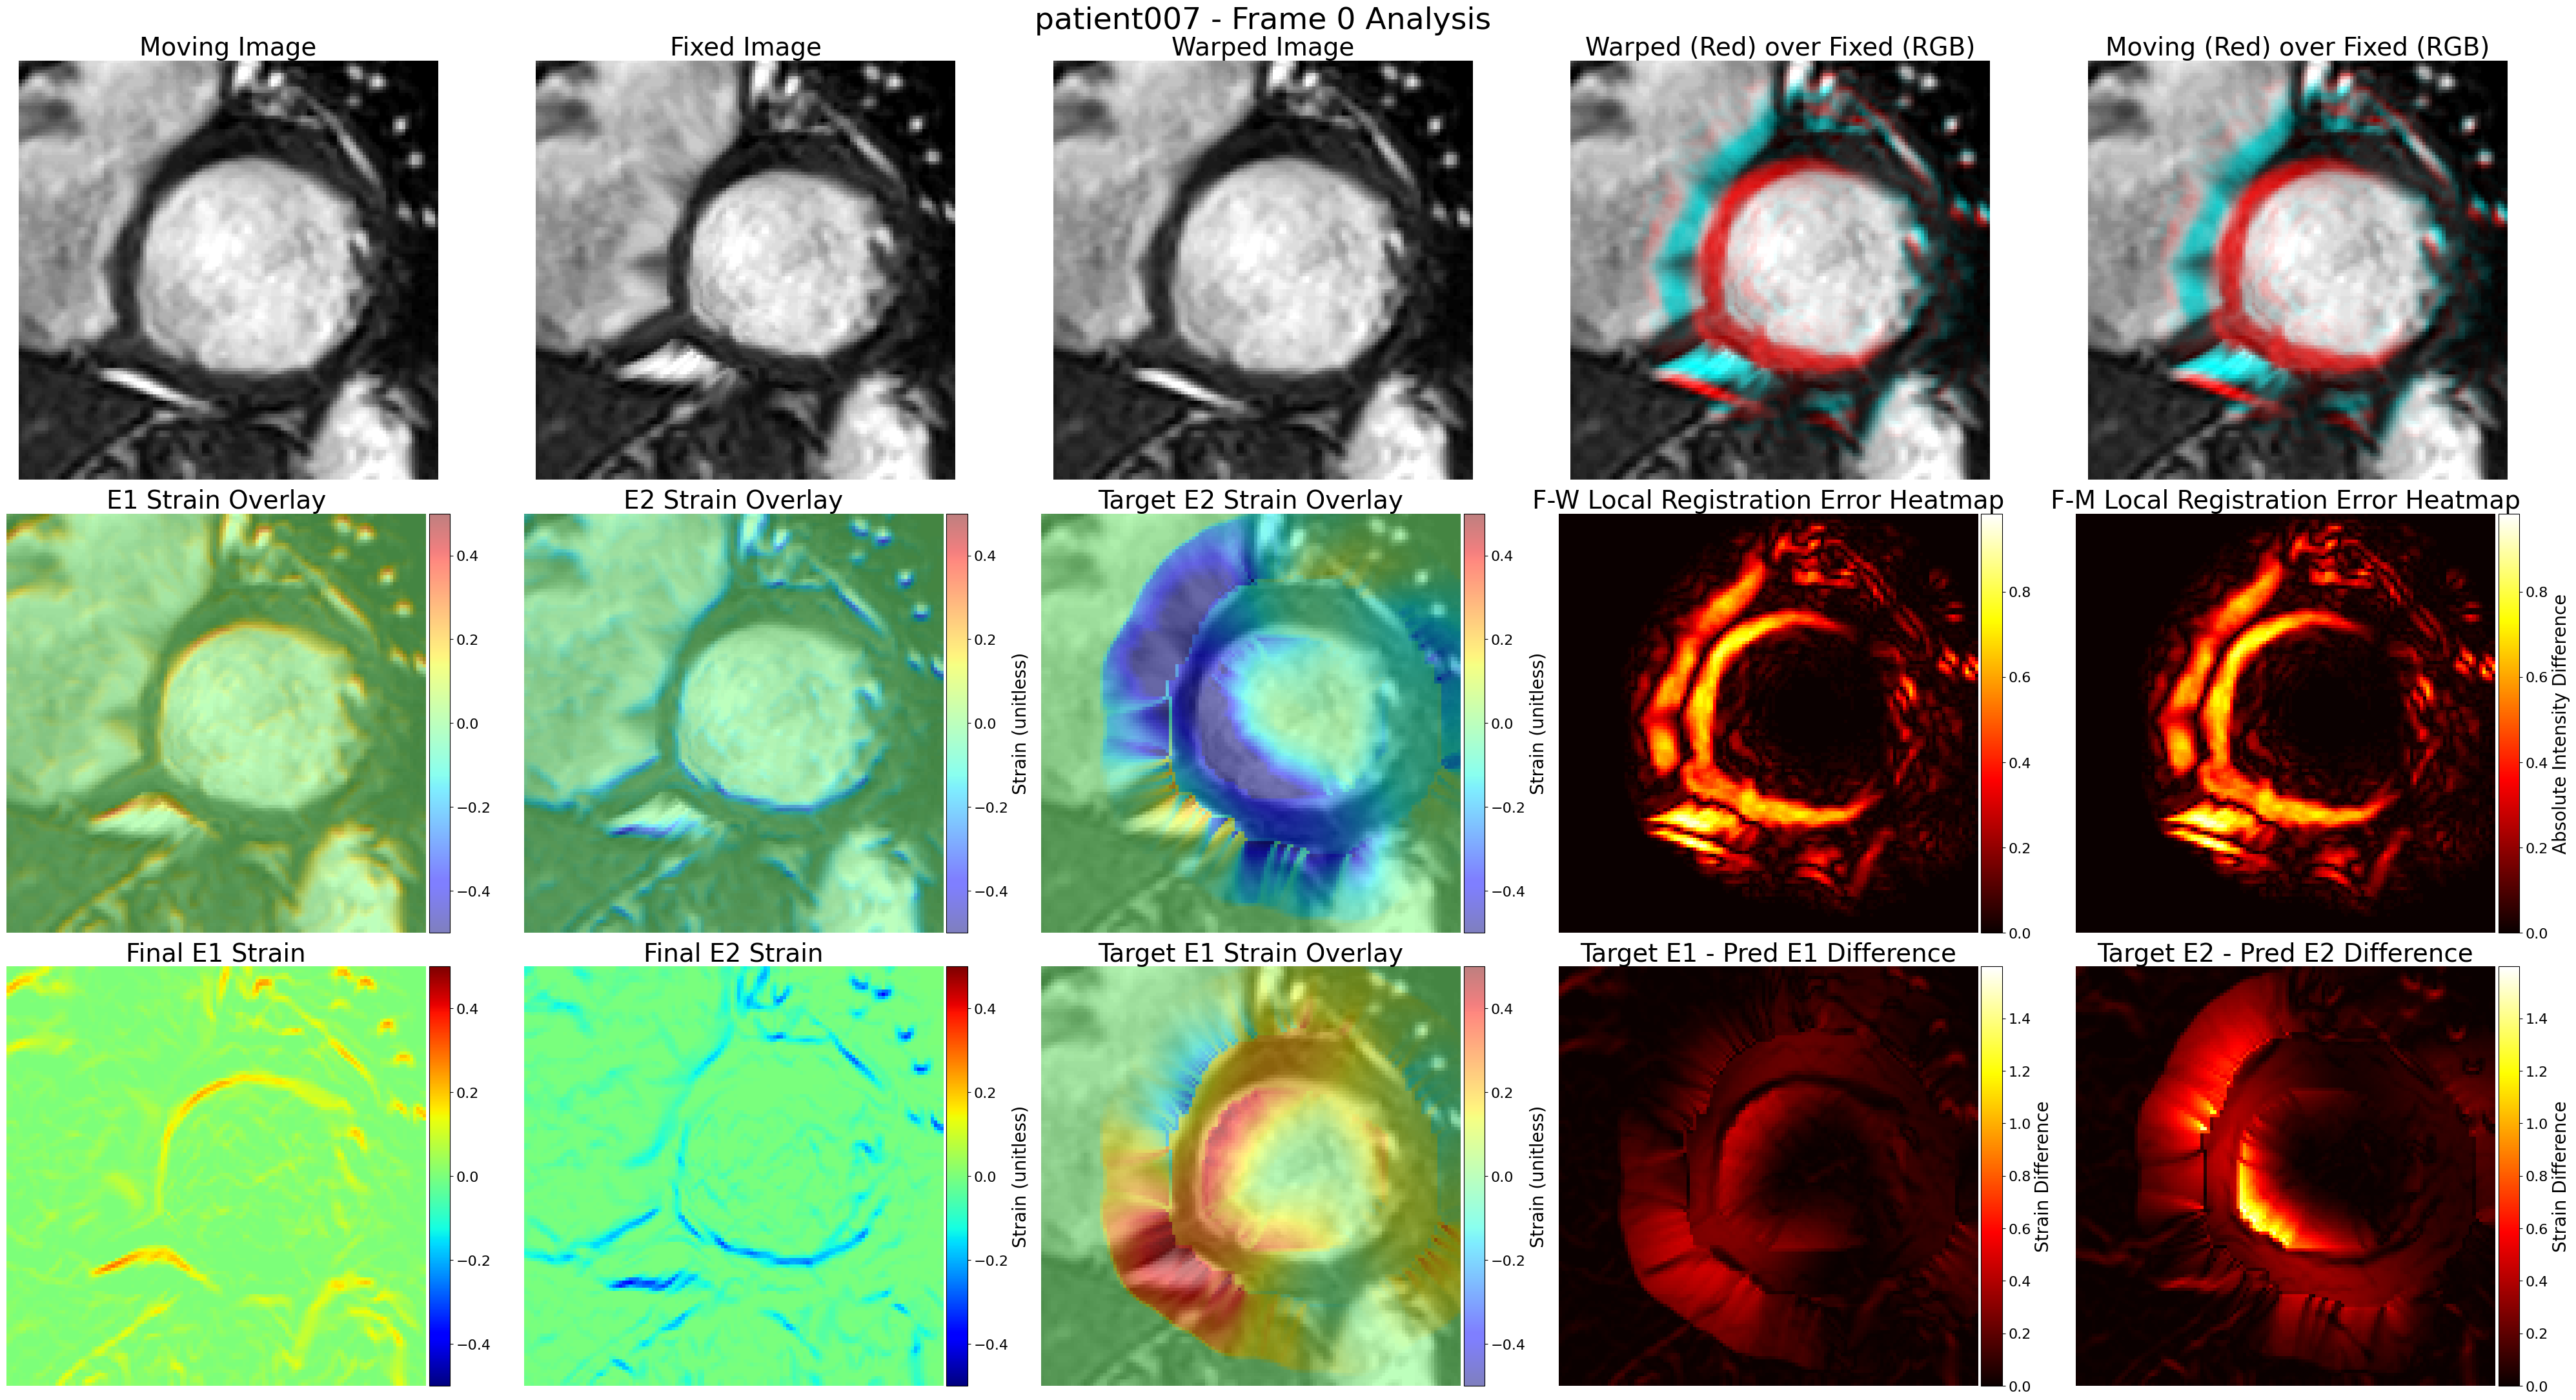

In [ ]:
# # Run visualizations with video creation
# visualize_all_simulated_models_with_video(
#     models_config=MODEL_CONFIG,
#     lambdas=LAMBDAS,
#     kernel_keys=KERNEL_KEYS,
#     test_simulated_data=test_simulated_data,
#     mask_simulated_data=mask_simulated_data,
#     displacement_simulated_data=displacement_simulated_data,
#     patient_numbers=["007"],
#     create_video=True,
#     fps=5,
#     video_format='mp4'  # or 'gif'
# )